# <font color=orange> <center>CSCI 5901 - Process of Data Science - Assignment 3 </center>

### <font color=purple> <center> Team Members </center></font>
### <font color=purple> <center> Lan Chen (B00809814, lan.chen@dal.ca), Jamuna Loganath (B00811590, jamuna.loganath@dal.ca)</center>

In [1]:
from rtree import index
from rtree.index import Rtree
p = index.Property()
idx = index.Index(properties=p)
idx

In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import shapely
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

### <font color=blue> 1. Find all the vessels that visited ports in the provided shapefile (Nima_Ports.Zip). For this part, you are going to create a buffer with an appropriate radius around the shape of each all polygons in the shapefile. Second, you are going to find all the AIS messages (from AIS data) that intersect with these ports. (​20 points​) 

In [3]:
#In this cell we are reading the AISData file and Converting them into GeoDataFrames and create Geometry series with lat / longitude
df=pd.read_csv('AISData.csv')
gdf = gpd.GeoDataFrame(df.drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(df['location.coordinates.0'], df['location.coordinates.1'])])   

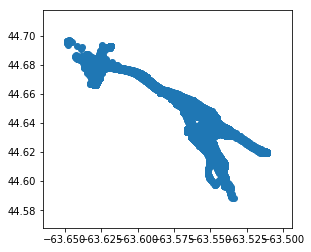

In [4]:
# Here we are plotting from csv data with location coordinates

gdf.plot() 

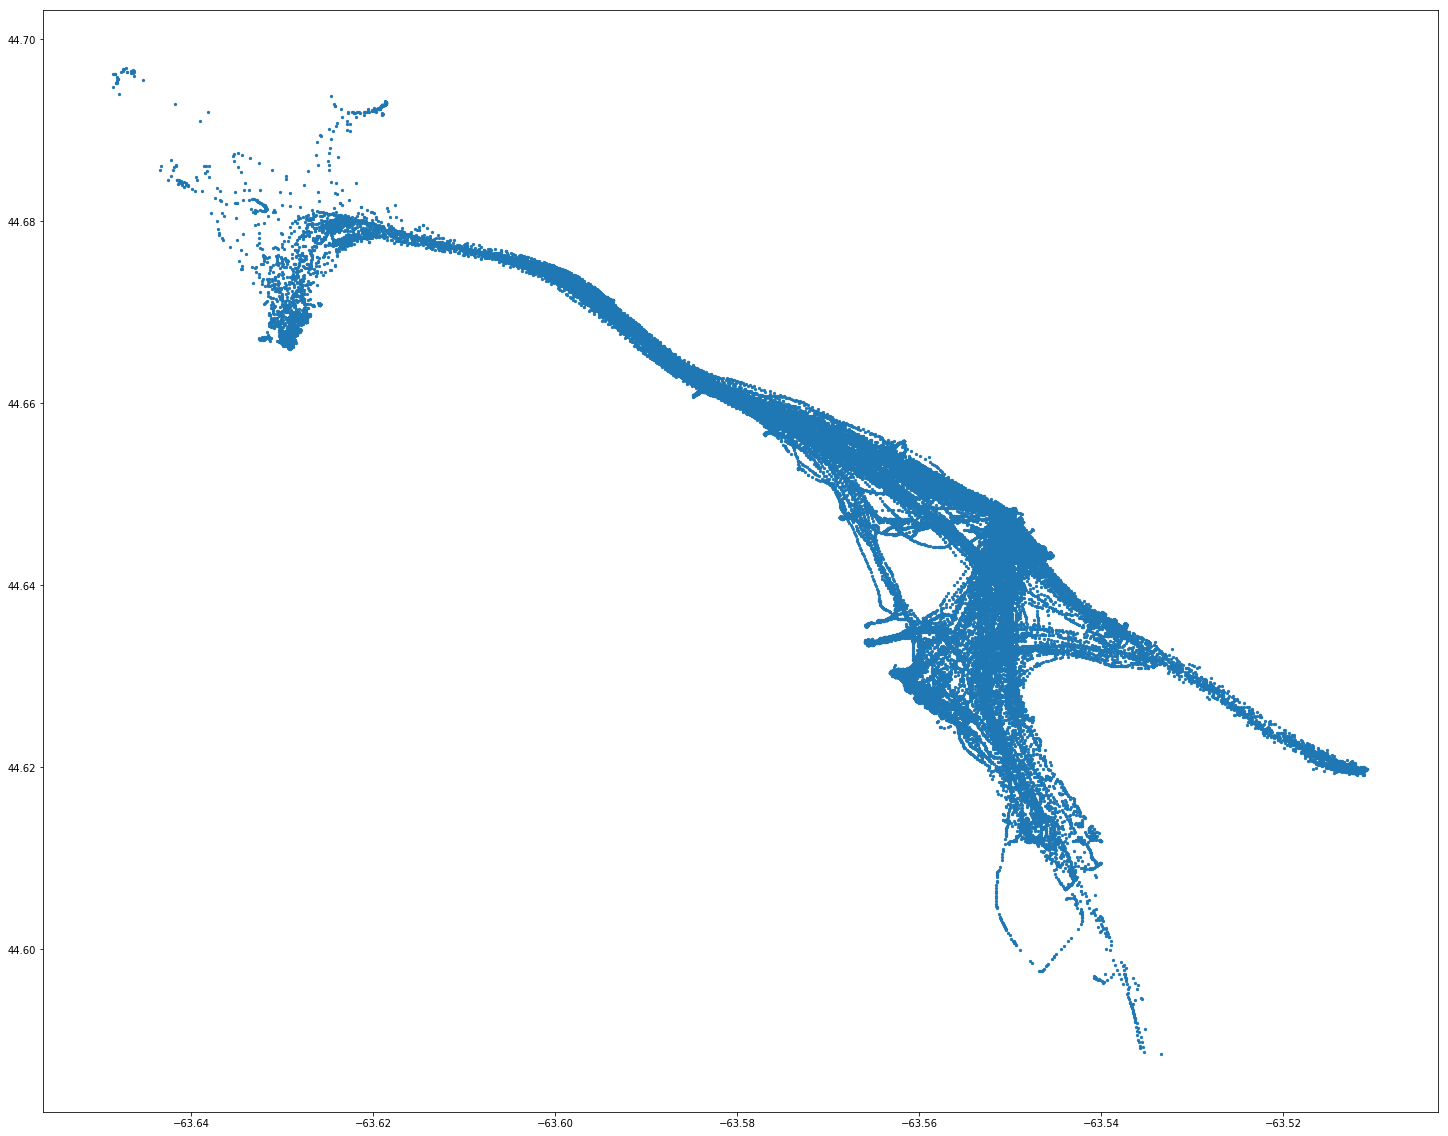

In [5]:
ax=gdf.plot(figsize=(25,25),markersize=5)

In [6]:
# Here we are reading the shape file to get the ports

halifax=gpd.read_file('assignment3shapefile.shp') 
halifax.head()

field_1     port_name    size  \
0        0  pointpolygon  0.0000   
1        1         port1  0.0018   
2        2         port2  0.0018   
3        3           ind  0.0000   
4        4         port5  0.0018   

                                            geometry  
0  POLYGON ((-63.59160304069519 44.6649292254607,...  
1  POLYGON ((-63.569431 44.649993, -63.5694396674...  
2  POLYGON ((-63.60949000000001 44.675853, -63.60...  
3  POLYGON ((-63.54742169380188 44.64697911403847...  
4  POLYGON ((-63.568048 44.663875, -63.5680566674...

In [8]:
bylaw=halifax.set_index(['port_name']) # Here we are assigning the port names to plot

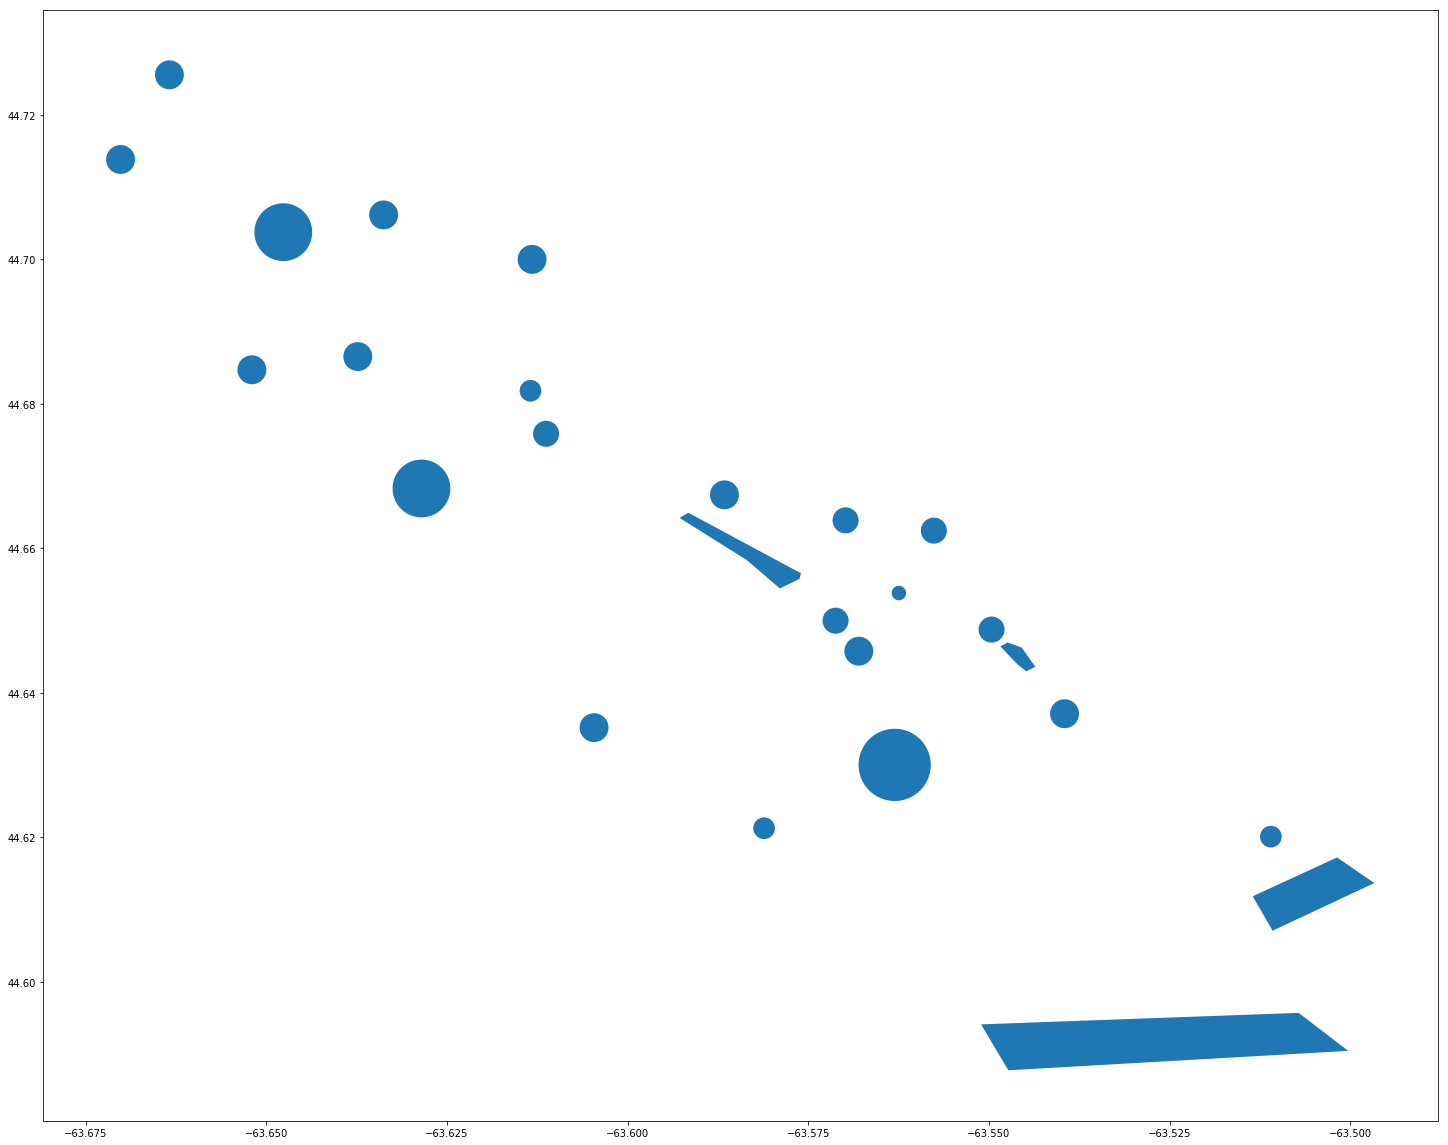

In [9]:
bylaw.plot(figsize=(25,25))

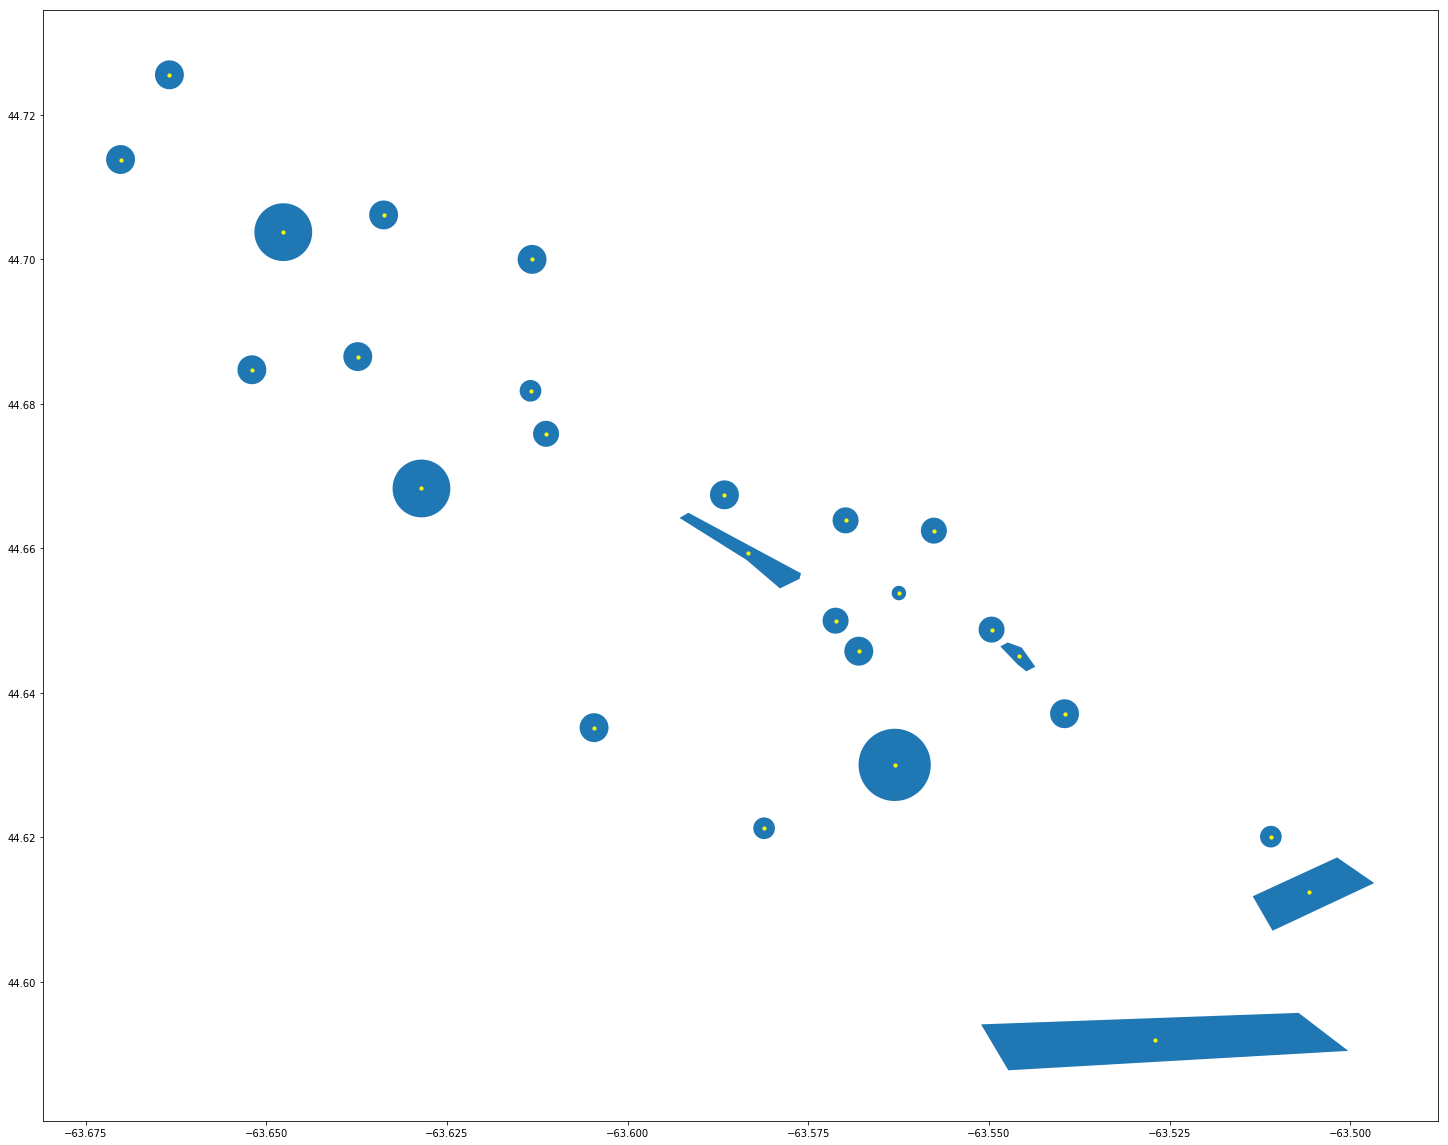

In [10]:
# Getting the centroid for all ports 

d1=bylaw.loc[['pointpolygon'],:].centroid #centroid for the first port
d2=bylaw.loc[['port1'],:].centroid
d3=bylaw.loc[['port2'],:].centroid
d4=bylaw.loc[['ind'],:].centroid
d5=bylaw.loc[['port5'],:].centroid
d6=bylaw.loc[['port6'],:].centroid
d7=bylaw.loc[['port7'],:].centroid
d8=bylaw.loc[['south_enterance'],:].centroid
d9=bylaw.loc[['auto_port'],:].centroid
d10=bylaw.loc[['southend container terminal'],:].centroid
d11=bylaw.loc[['NN Jetty'],:].centroid
d12=bylaw.loc[['Bills island'],:].centroid
d13=bylaw.loc[['mid bedford'],:].centroid
d14=bylaw.loc[['Fairview cove'],:].centroid
d15=bylaw.loc[['armament'],:].centroid
d16=bylaw.loc[['waterfront h'],:].centroid
d17=bylaw.loc[['northarm'],:].centroid
d18=bylaw.loc[['plll'],:].centroid
d19=bylaw.loc[['pp'],:].centroid
d20=bylaw.loc[['po001'],:].centroid
d21=bylaw.loc[['po002'],:].centroid
d22=bylaw.loc[['oulier_maybecday'],:].centroid
d23=bylaw.loc[['p003'],:].centroid
d24=bylaw.loc[['enter2'],:].centroid
d25=bylaw.loc[['p009'],:].centroid
d26=bylaw.loc[['p010'],:].centroid

# plotting the ports
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 'southend container terminal',
       'NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament', 'waterfront h', 'northarm', 'plll', 'pp', 'po001',
       'po002', 'oulier_maybecday', 'p003', 'enter2', 'p009', 'p010'],:].plot(figsize=(25,25))

#plptting the yellow center points
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],d16[0],d17[0],d18[0]
              ,d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],d26[0]]).plot(ax=ax,color='yellow',markersize=10)

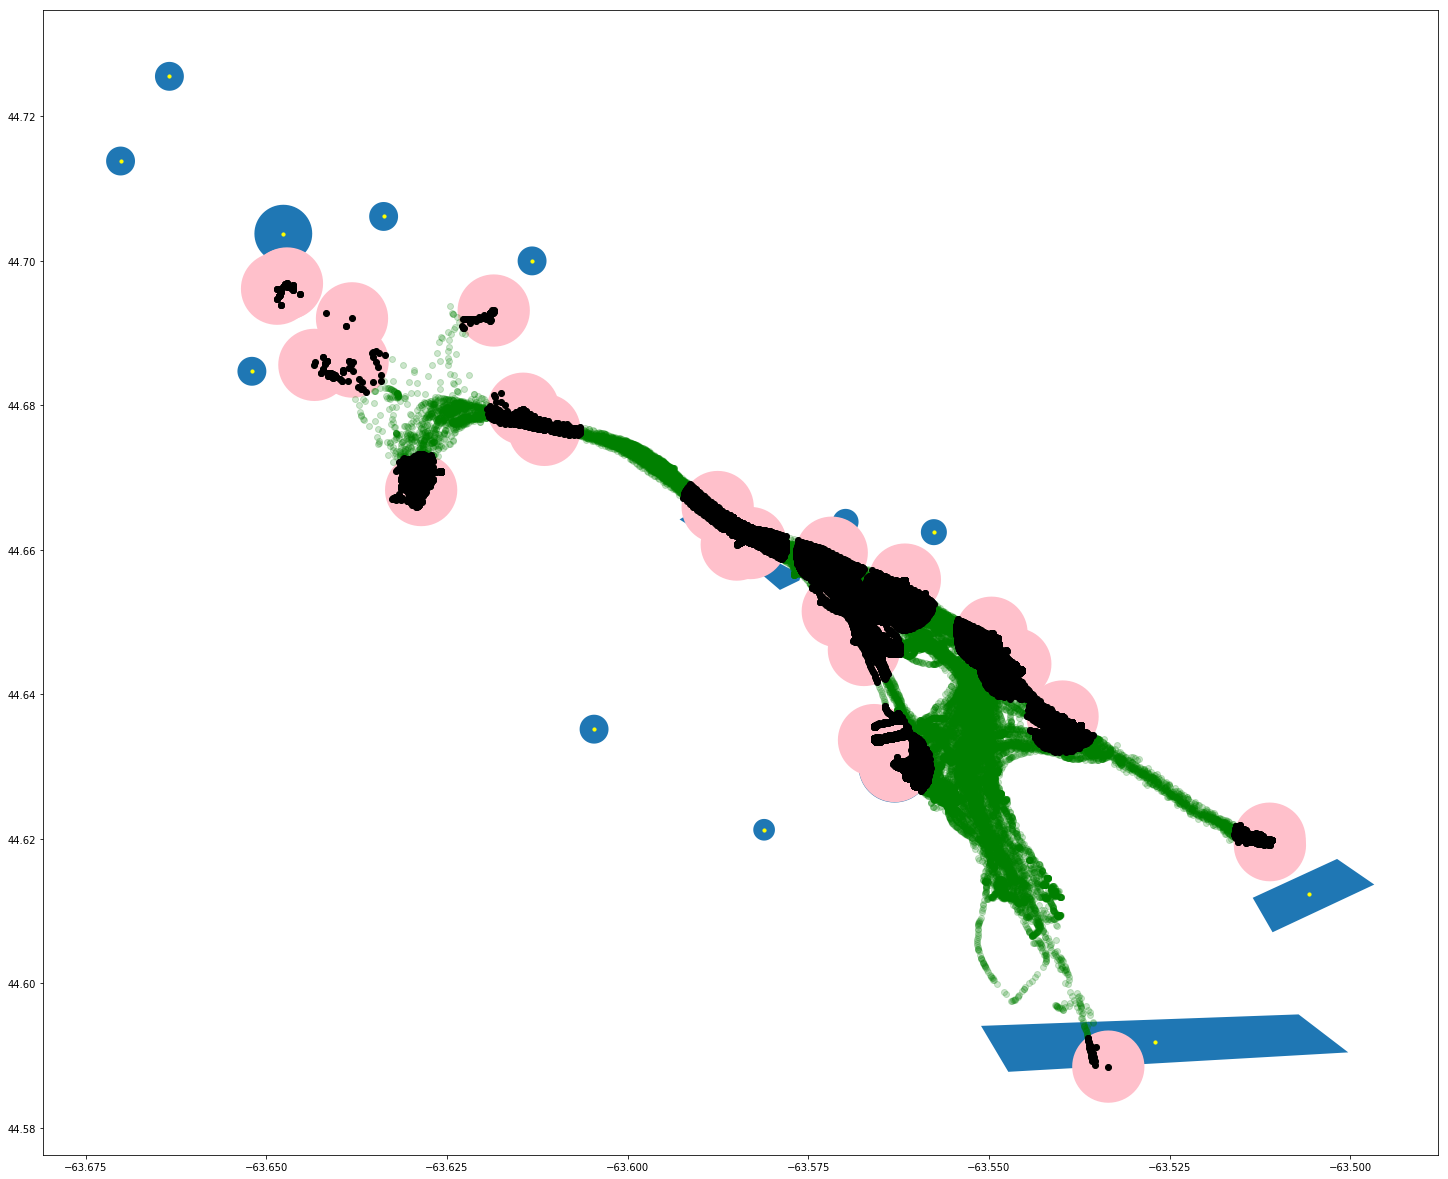

In [11]:
p1=gdf.loc[gdf.distance(d1[0])==gdf.distance(d1[0]).min(),:]
p2=gdf.loc[gdf.distance(d2[0])==gdf.distance(d2[0]).min(),:]
p3=gdf.loc[gdf.distance(d3[0])==gdf.distance(d3[0]).min(),:]
p4=gdf.loc[gdf.distance(d4[0])==gdf.distance(d4[0]).min(),:]
p5=gdf.loc[gdf.distance(d5[0])==gdf.distance(d5[0]).min(),:]
p6=gdf.loc[gdf.distance(d6[0])==gdf.distance(d6[0]).min(),:]
p7=gdf.loc[gdf.distance(d7[0])==gdf.distance(d7[0]).min(),:]
p8=gdf.loc[gdf.distance(d8[0])==gdf.distance(d8[0]).min(),:]
p9=gdf.loc[gdf.distance(d9[0])==gdf.distance(d9[0]).min(),:]
p10=gdf.loc[gdf.distance(d10[0])==gdf.distance(d10[0]).min(),:]
p11=gdf.loc[gdf.distance(d11[0])==gdf.distance(d11[0]).min(),:]
p12=gdf.loc[gdf.distance(d12[0])==gdf.distance(d12[0]).min(),:]
p13=gdf.loc[gdf.distance(d13[0])==gdf.distance(d13[0]).min(),:]
p14=gdf.loc[gdf.distance(d14[0])==gdf.distance(d14[0]).min(),:]
p15=gdf.loc[gdf.distance(d15[0])==gdf.distance(d15[0]).min(),:]
p16=gdf.loc[gdf.distance(d16[0])==gdf.distance(d16[0]).min(),:]
p17=gdf.loc[gdf.distance(d17[0])==gdf.distance(d17[0]).min(),:]
p18=gdf.loc[gdf.distance(d18[0])==gdf.distance(d18[0]).min(),:]
p19=gdf.loc[gdf.distance(d19[0])==gdf.distance(d19[0]).min(),:]
p20=gdf.loc[gdf.distance(d20[0])==gdf.distance(d20[0]).min(),:]
p21=gdf.loc[gdf.distance(d21[0])==gdf.distance(d21[0]).min(),:]
p22=gdf.loc[gdf.distance(d22[0])==gdf.distance(d22[0]).min(),:]
p23=gdf.loc[gdf.distance(d23[0])==gdf.distance(d23[0]).min(),:]
p24=gdf.loc[gdf.distance(d24[0])==gdf.distance(d24[0]).min(),:]
p25=gdf.loc[gdf.distance(d25[0])==gdf.distance(d25[0]).min(),:]
p26=gdf.loc[gdf.distance(d26[0])==gdf.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf.plot(ax=ax,color='g',alpha=0.2)
gdf.loc[gdf.within(p1),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p2),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p3),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p4),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p5),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p6),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p7),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p8),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p9),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p10),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p11),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p12),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p13),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p14),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p15),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p16),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p17),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p18),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p19),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p20),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p21),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p22),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p23),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p24),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p25),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p26),:].plot(ax=ax,color='k')

### <font color=blue> 2. Show the density (i.e., density is the number of AIS messages in a port), of each port on a map by using a colour-coded map. (​20 points​) 

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


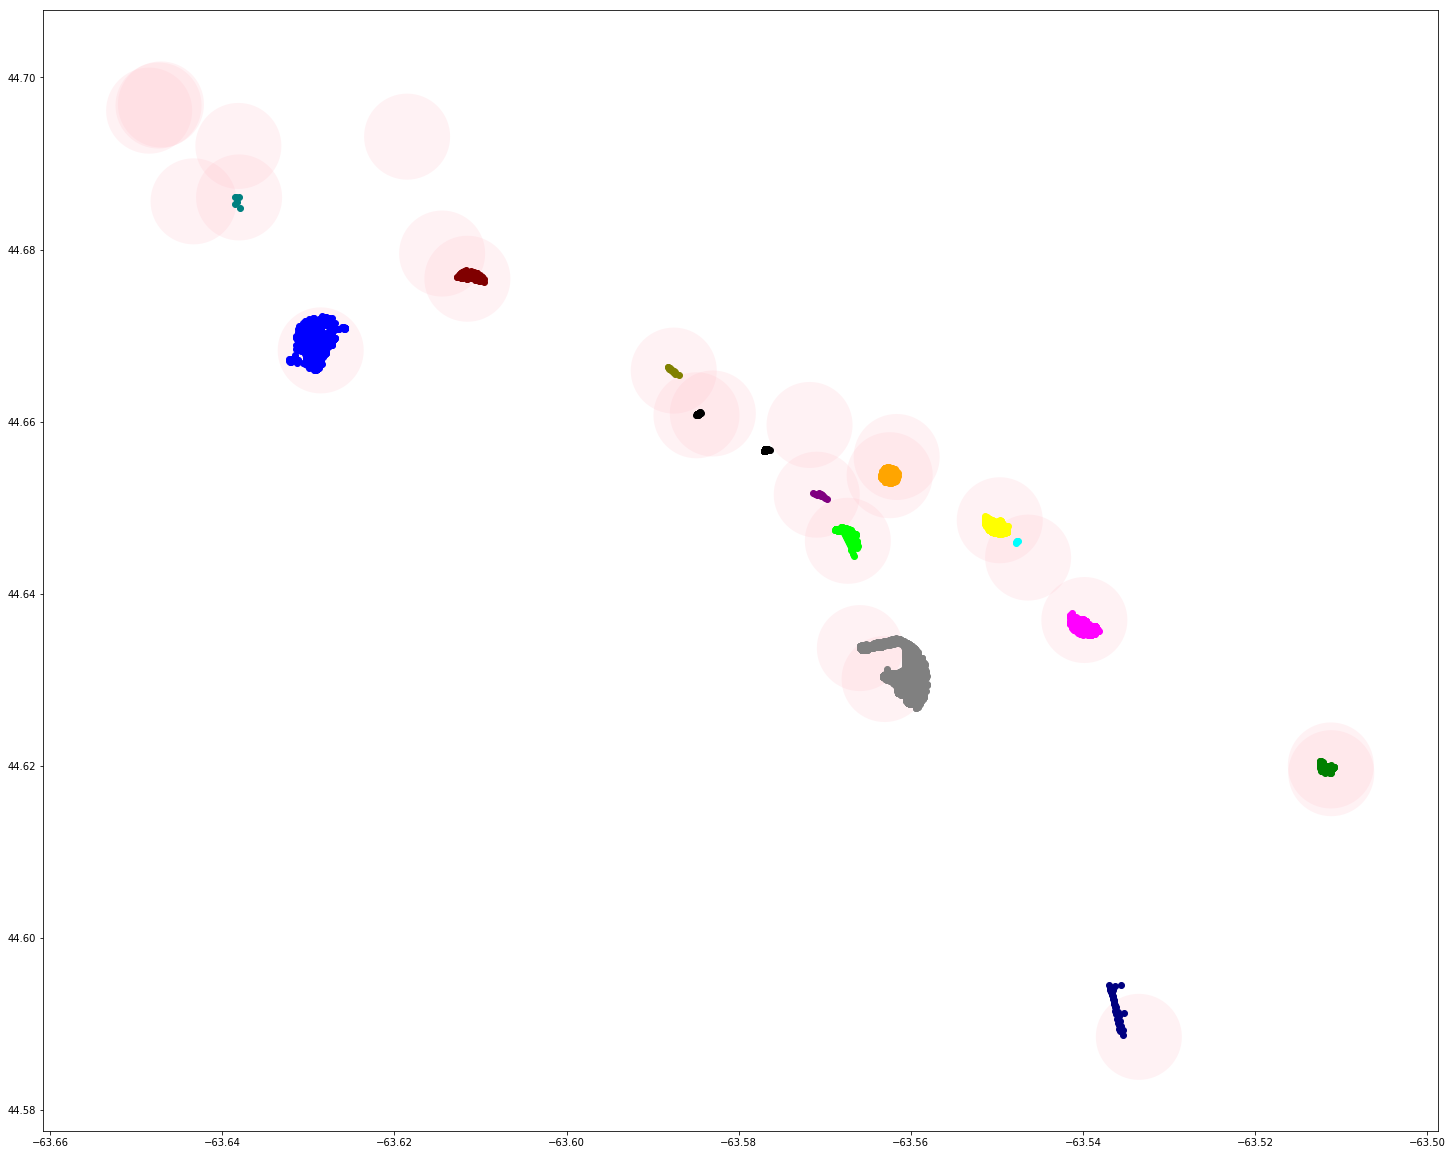

In [12]:
# In this cell we are finding the intersection of vessels with the ports 
#in the 5km radius

joinres=gpd.sjoin(gdf,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','Teal','Purple','Olive']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1

### <font color=blue> 3. Now divide the AIS data into data frames with a one-hour interval. Repeat steps 1 and 2 for all of the sub-dataframes. Here each data frame has only information of one hour. Note that if step 1 and 2 you are using the whole AIS data as a one-time interval. In step 3, you are repeating steps 1 and 2 for all of the one-hour intervals. This can generate many plots that you are going to visualize them. You can save all the plots with proper name and title in a folder or generate a matplotlib animation to visualize it. (​20 points​) 
 

In [14]:
# loading the csv file

df=pd.read_csv('AISData.csv')
gdf0 = gpd.GeoDataFrame(df.drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(df['location.coordinates.0'], df['location.coordinates.1'])])  # create Geometry series with lat / longitude

In [15]:
df['event_time']=pd.to_datetime(df['event_time'])  # converting the event_time string type to datetime type
df.drop(['Unnamed: 0'],axis=1,inplace=True)  # droping the Unnamed column
df['hour'] = df['event_time'].dt.hour   # creating a new column with values of hour
df.head()

event_time  location.coordinates.0  \
0 2019-04-11 09:47:30.153000+00:00              -63.556082   
1 2019-04-11 09:47:27.273000+00:00              -63.556053   
2 2019-04-11 09:47:34.340000+00:00              -63.556138   
3 2019-04-11 09:47:37.087000+00:00              -63.556187   
4 2019-04-19 09:52:19.358000+00:00              -63.555998   

   location.coordinates.1  position_accuracy       mmsi  sog         cog  hour  
0               44.624835                0.0  316013808  3.0  319.500000     9  
1               44.624817                0.0  316013808  3.0  320.700012     9  
2               44.624868                0.0  316013808  2.9  319.500000     9  
3               44.624898                0.0  316013808  3.0  319.799988     9  
4               44.624883                0.0  316013808  3.2  337.200012     9

In [16]:
ho = []  
for i in range(24):
  ho.append('df_h'+str(i))  # creating a dataframe names
d = {}
for i,name in enumerate(ho):
  d[name] = pd.DataFrame()  # creating a dataframe for each hour
  d[name] = df[df['hour']==i]  # assingning the dataframe for each time interval

In [17]:
# displaying the number of rows for each hour in each dataframe.

for i,name in enumerate(ho):
  print(i,'hour dataframe', name, 'has',len(d[name]),'rows')  

0 hour dataframe df_h0 has 31899 rows
1 hour dataframe df_h1 has 32367 rows
2 hour dataframe df_h2 has 33209 rows
3 hour dataframe df_h3 has 32699 rows
4 hour dataframe df_h4 has 32541 rows
5 hour dataframe df_h5 has 32312 rows
6 hour dataframe df_h6 has 31873 rows
7 hour dataframe df_h7 has 31246 rows
8 hour dataframe df_h8 has 31729 rows
9 hour dataframe df_h9 has 27980 rows
10 hour dataframe df_h10 has 29939 rows
11 hour dataframe df_h11 has 32681 rows
12 hour dataframe df_h12 has 32808 rows
13 hour dataframe df_h13 has 33073 rows
14 hour dataframe df_h14 has 33250 rows
15 hour dataframe df_h15 has 32120 rows
16 hour dataframe df_h16 has 32281 rows
17 hour dataframe df_h17 has 31733 rows
18 hour dataframe df_h18 has 32393 rows
19 hour dataframe df_h19 has 30319 rows
20 hour dataframe df_h20 has 29485 rows
21 hour dataframe df_h21 has 31261 rows
22 hour dataframe df_h22 has 34368 rows
23 hour dataframe df_h23 has 33105 rows


In [18]:
d['df_h1'].tail() # displaying dataframe with time interval at 1 O'clock

event_time  location.coordinates.0  \
766641 2019-06-11 01:19:45.339000+00:00              -63.549448   
766642 2019-06-11 01:19:54.725000+00:00              -63.549452   
766655 2019-05-29 01:52:33.904000+00:00              -63.549472   
766657 2019-05-29 01:52:21.984000+00:00              -63.549428   
766662 2019-05-29 01:59:33.302000+00:00              -63.549478   

        location.coordinates.1  position_accuracy       mmsi  sog         cog  \
766641               44.648083                0.0  316013808  0.0  148.800003   
766642               44.648085                0.0  316013808  0.0  148.800003   
766655               44.648048                0.0  316013808  0.0  238.000000   
766657               44.648043                0.0  316013808  0.0  238.000000   
766662               44.648003                0.0  316013808  0.0  238.000000   

        hour  
766641     1  
766642     1  
766655     1  
766657     1  
766662     1

0th interval

In [19]:
gdf0 = gpd.GeoDataFrame(d['df_h0'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h0']['location.coordinates.0'], d['df_h0']['location.coordinates.1'])])

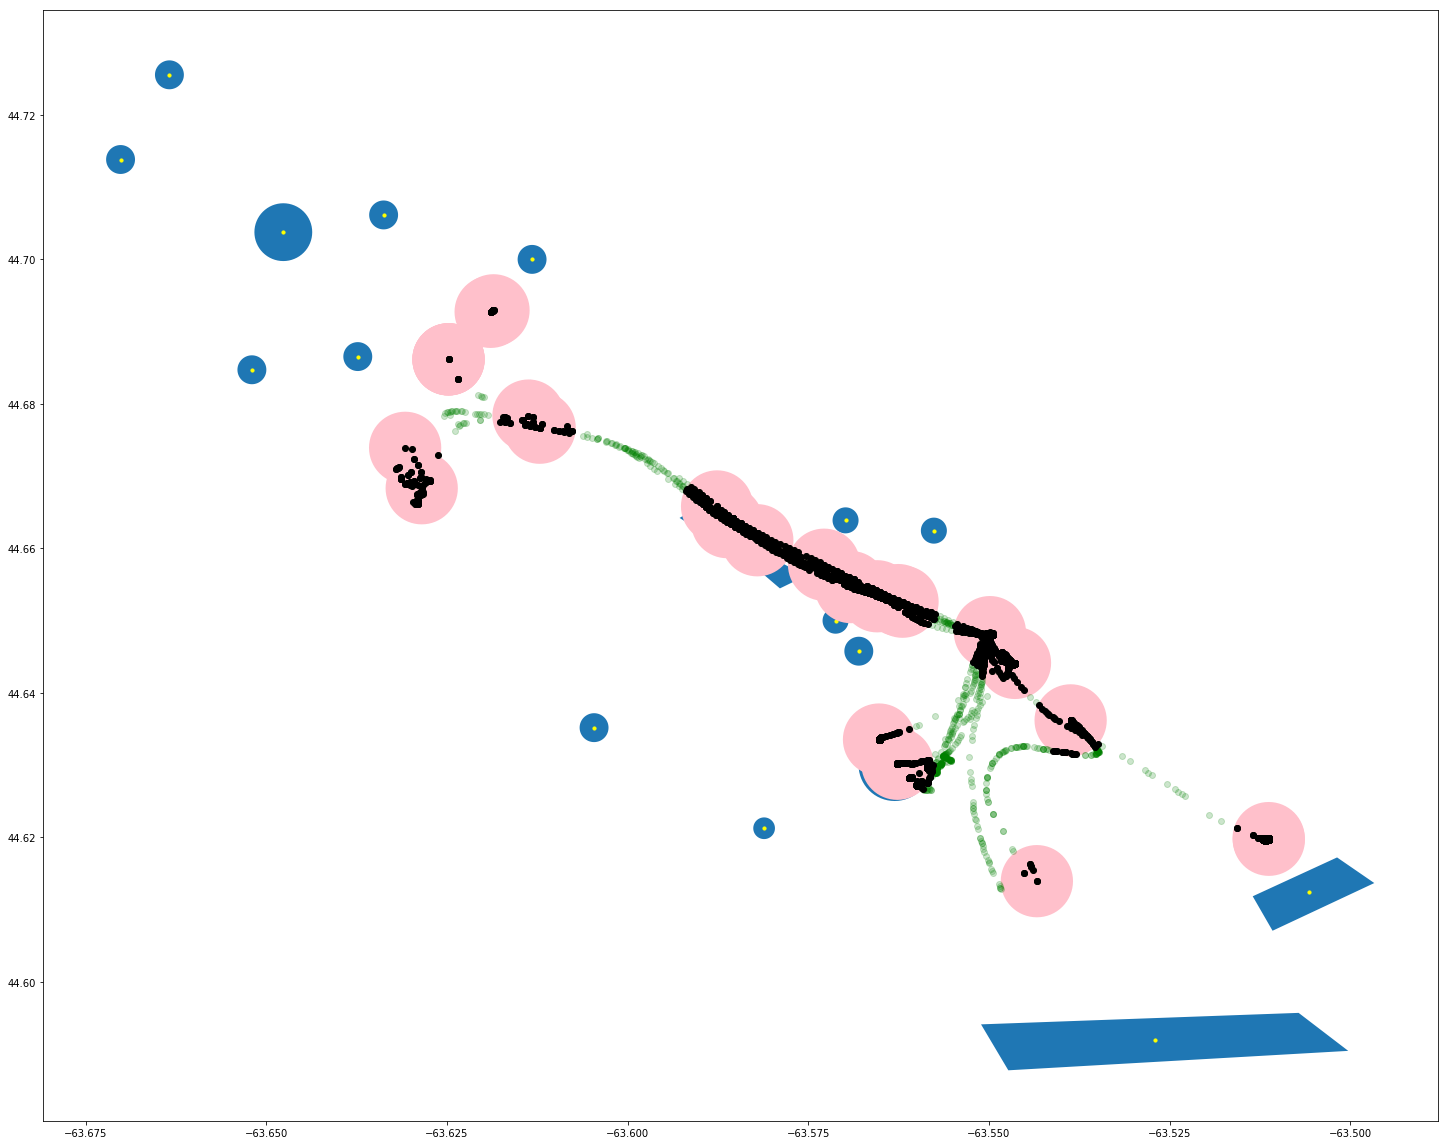

In [26]:
p1=gdf0.loc[gdf0.distance(d1[0])==gdf0.distance(d1[0]).min(),:]
p2=gdf0.loc[gdf0.distance(d2[0])==gdf0.distance(d2[0]).min(),:]
p3=gdf0.loc[gdf0.distance(d3[0])==gdf0.distance(d3[0]).min(),:]
p4=gdf0.loc[gdf0.distance(d4[0])==gdf0.distance(d4[0]).min(),:]
p5=gdf0.loc[gdf0.distance(d5[0])==gdf0.distance(d5[0]).min(),:]
p6=gdf0.loc[gdf0.distance(d6[0])==gdf0.distance(d6[0]).min(),:]
p7=gdf0.loc[gdf0.distance(d7[0])==gdf0.distance(d7[0]).min(),:]
p8=gdf0.loc[gdf0.distance(d8[0])==gdf0.distance(d8[0]).min(),:]
p9=gdf0.loc[gdf0.distance(d9[0])==gdf0.distance(d9[0]).min(),:]
p10=gdf0.loc[gdf0.distance(d10[0])==gdf0.distance(d10[0]).min(),:]
p11=gdf0.loc[gdf0.distance(d11[0])==gdf0.distance(d11[0]).min(),:]
p12=gdf0.loc[gdf0.distance(d12[0])==gdf0.distance(d12[0]).min(),:]
p13=gdf0.loc[gdf0.distance(d13[0])==gdf0.distance(d13[0]).min(),:]
p14=gdf0.loc[gdf0.distance(d14[0])==gdf0.distance(d14[0]).min(),:]
p15=gdf0.loc[gdf0.distance(d15[0])==gdf0.distance(d15[0]).min(),:]
p16=gdf0.loc[gdf0.distance(d16[0])==gdf0.distance(d16[0]).min(),:]
p17=gdf0.loc[gdf0.distance(d17[0])==gdf0.distance(d17[0]).min(),:]
p18=gdf0.loc[gdf0.distance(d18[0])==gdf0.distance(d18[0]).min(),:]
p19=gdf0.loc[gdf0.distance(d19[0])==gdf0.distance(d19[0]).min(),:]
p20=gdf0.loc[gdf0.distance(d20[0])==gdf0.distance(d20[0]).min(),:]
p21=gdf0.loc[gdf0.distance(d21[0])==gdf0.distance(d21[0]).min(),:]
p22=gdf0.loc[gdf0.distance(d22[0])==gdf0.distance(d22[0]).min(),:]
p23=gdf0.loc[gdf0.distance(d23[0])==gdf0.distance(d23[0]).min(),:]
p24=gdf0.loc[gdf0.distance(d24[0])==gdf0.distance(d24[0]).min(),:]
p25=gdf0.loc[gdf0.distance(d25[0])==gdf0.distance(d25[0]).min(),:]
p26=gdf0.loc[gdf0.distance(d26[0])==gdf0.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf0.plot(ax=ax,color='g',alpha=0.2)
gdf0.loc[gdf0.within(p1),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p2),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p3),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p4),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p5),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p6),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p7),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p8),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p9),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p10),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p11),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p12),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p13),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p14),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p15),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p16),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p17),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p18),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p19),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p20),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p21),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p22),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p23),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p24),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p25),:].plot(ax=ax,color='k')
gdf0.loc[gdf0.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_00_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


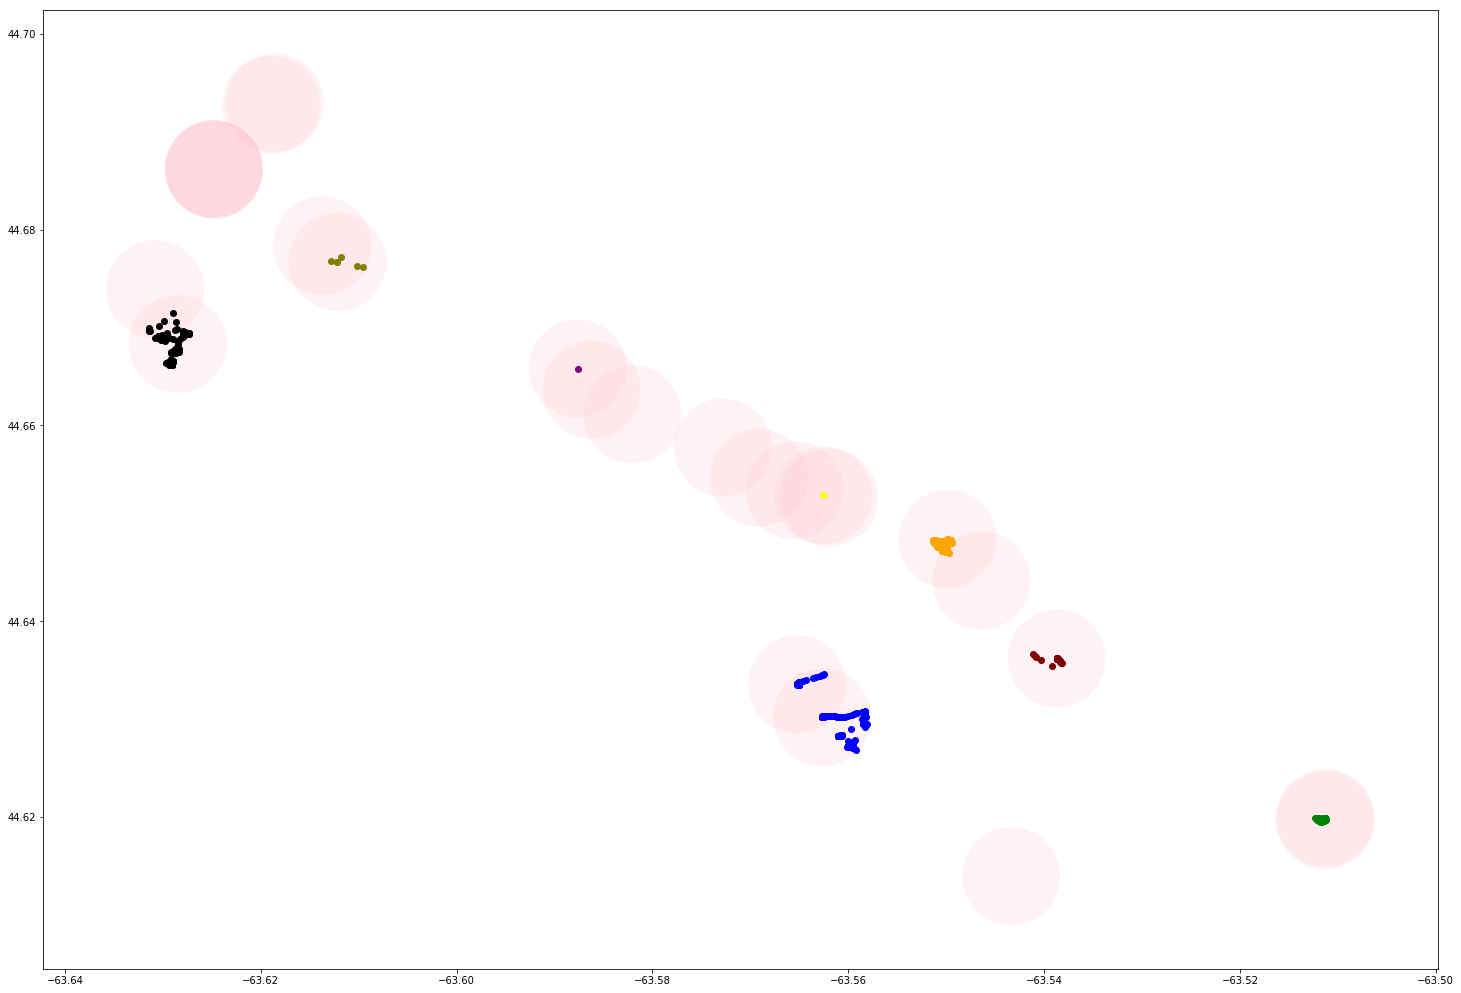

In [25]:
joinres=gpd.sjoin(gdf0,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_00_q2.png')

1st interval

In [27]:
gdf1 = gpd.GeoDataFrame(d['df_h1'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h1']['location.coordinates.0'], d['df_h1']['location.coordinates.1'])])


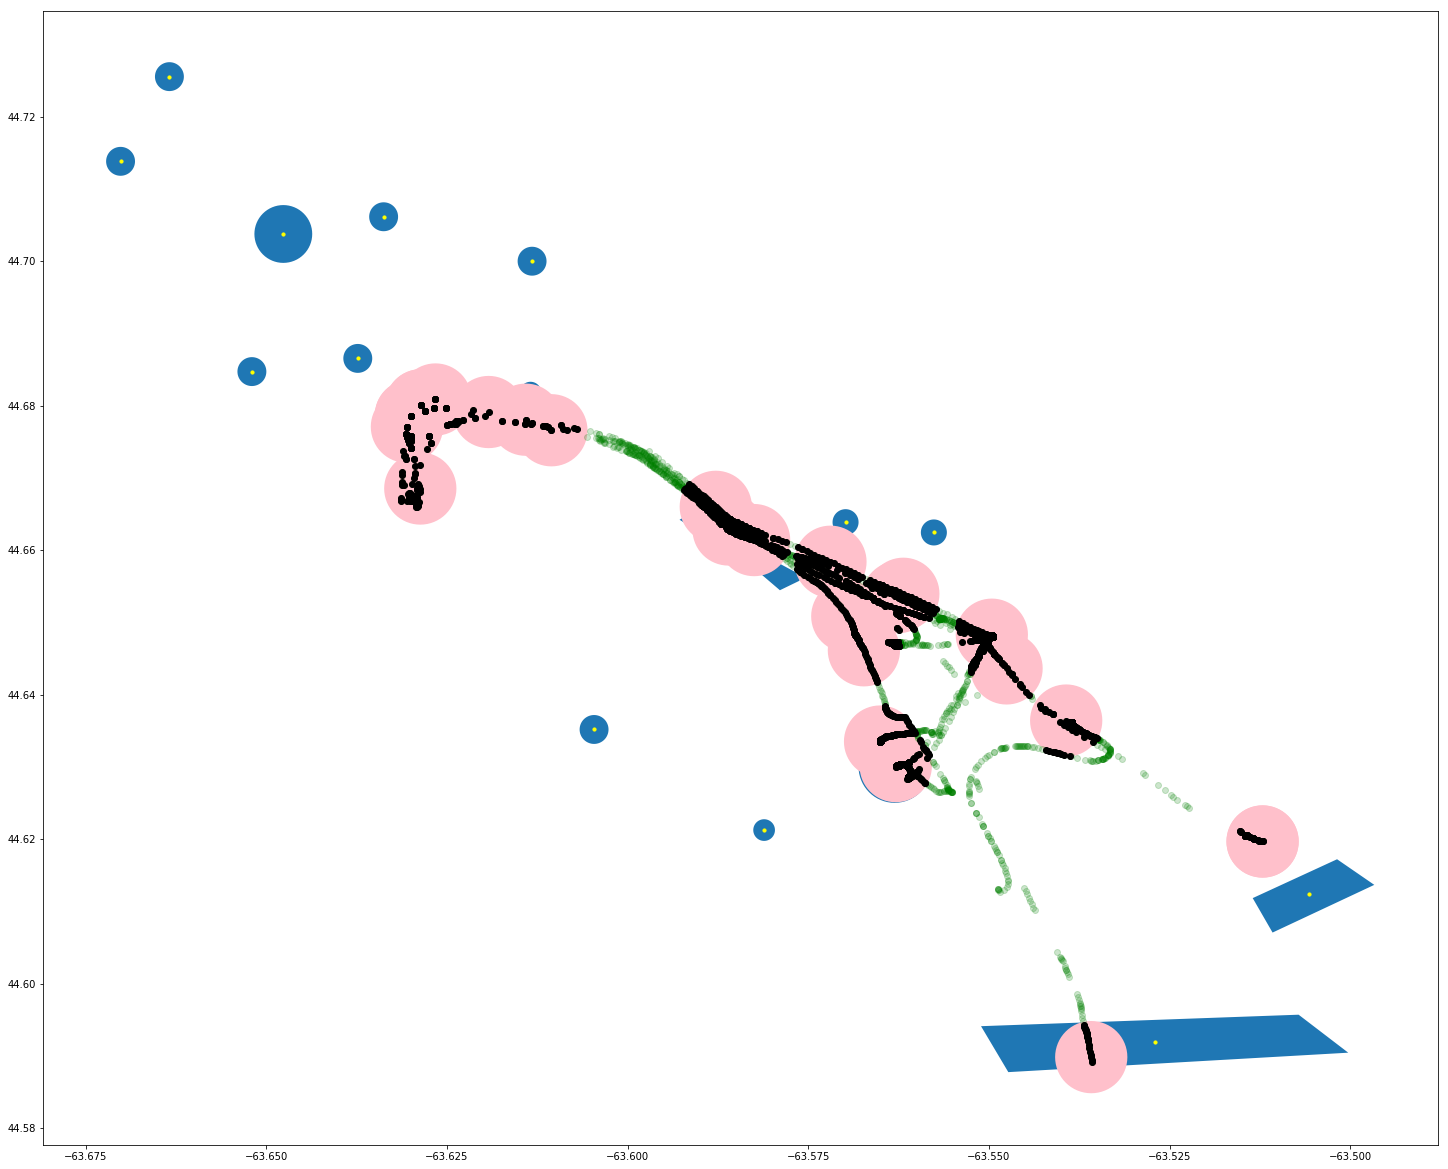

In [29]:
p1=gdf1.loc[gdf1.distance(d1[0])==gdf1.distance(d1[0]).min(),:]
p2=gdf1.loc[gdf1.distance(d2[0])==gdf1.distance(d2[0]).min(),:]
p3=gdf1.loc[gdf1.distance(d3[0])==gdf1.distance(d3[0]).min(),:]
p4=gdf1.loc[gdf1.distance(d4[0])==gdf1.distance(d4[0]).min(),:]
p5=gdf1.loc[gdf1.distance(d5[0])==gdf1.distance(d5[0]).min(),:]
p6=gdf1.loc[gdf1.distance(d6[0])==gdf1.distance(d6[0]).min(),:]
p7=gdf1.loc[gdf1.distance(d7[0])==gdf1.distance(d7[0]).min(),:]
p8=gdf1.loc[gdf1.distance(d8[0])==gdf1.distance(d8[0]).min(),:]
p9=gdf1.loc[gdf1.distance(d9[0])==gdf1.distance(d9[0]).min(),:]
p10=gdf1.loc[gdf1.distance(d10[0])==gdf1.distance(d10[0]).min(),:]
p11=gdf1.loc[gdf1.distance(d11[0])==gdf1.distance(d11[0]).min(),:]
p12=gdf1.loc[gdf1.distance(d12[0])==gdf1.distance(d12[0]).min(),:]
p13=gdf1.loc[gdf1.distance(d13[0])==gdf1.distance(d13[0]).min(),:]
p14=gdf1.loc[gdf1.distance(d14[0])==gdf1.distance(d14[0]).min(),:]
p15=gdf1.loc[gdf1.distance(d15[0])==gdf1.distance(d15[0]).min(),:]
p16=gdf1.loc[gdf1.distance(d16[0])==gdf1.distance(d16[0]).min(),:]
p17=gdf1.loc[gdf1.distance(d17[0])==gdf1.distance(d17[0]).min(),:]
p18=gdf1.loc[gdf1.distance(d18[0])==gdf1.distance(d18[0]).min(),:]
p19=gdf1.loc[gdf1.distance(d19[0])==gdf1.distance(d19[0]).min(),:]
p20=gdf1.loc[gdf1.distance(d20[0])==gdf1.distance(d20[0]).min(),:]
p21=gdf1.loc[gdf1.distance(d21[0])==gdf1.distance(d21[0]).min(),:]
p22=gdf1.loc[gdf1.distance(d22[0])==gdf1.distance(d22[0]).min(),:]
p23=gdf1.loc[gdf1.distance(d23[0])==gdf1.distance(d23[0]).min(),:]
p24=gdf1.loc[gdf1.distance(d24[0])==gdf1.distance(d24[0]).min(),:]
p25=gdf1.loc[gdf1.distance(d25[0])==gdf1.distance(d25[0]).min(),:]
p26=gdf1.loc[gdf1.distance(d26[0])==gdf1.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf1.plot(ax=ax,color='g',alpha=0.2)
gdf1.loc[gdf1.within(p1),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p2),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p3),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p4),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p5),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p6),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p7),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p8),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p9),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p10),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p11),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p12),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p13),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p14),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p15),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p16),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p17),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p18),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p19),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p20),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p21),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p22),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p23),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p24),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p25),:].plot(ax=ax,color='k')
gdf1.loc[gdf1.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_01_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


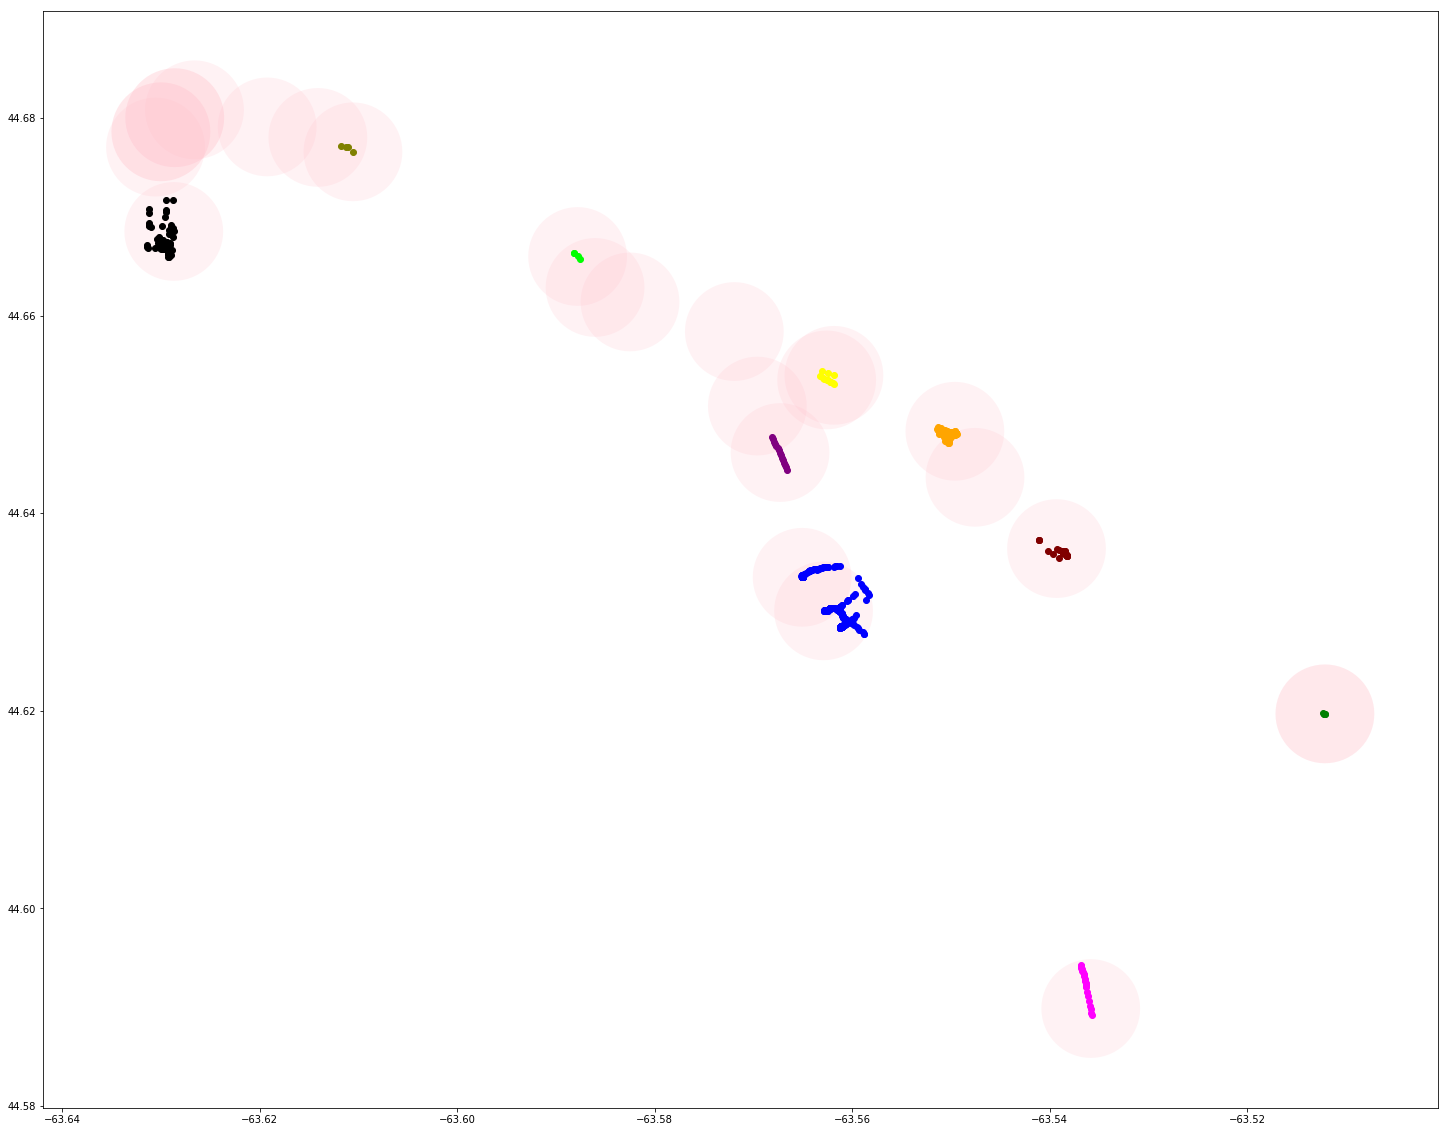

In [30]:
joinres=gpd.sjoin(gdf1,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_01_q2.png')

2nd interval

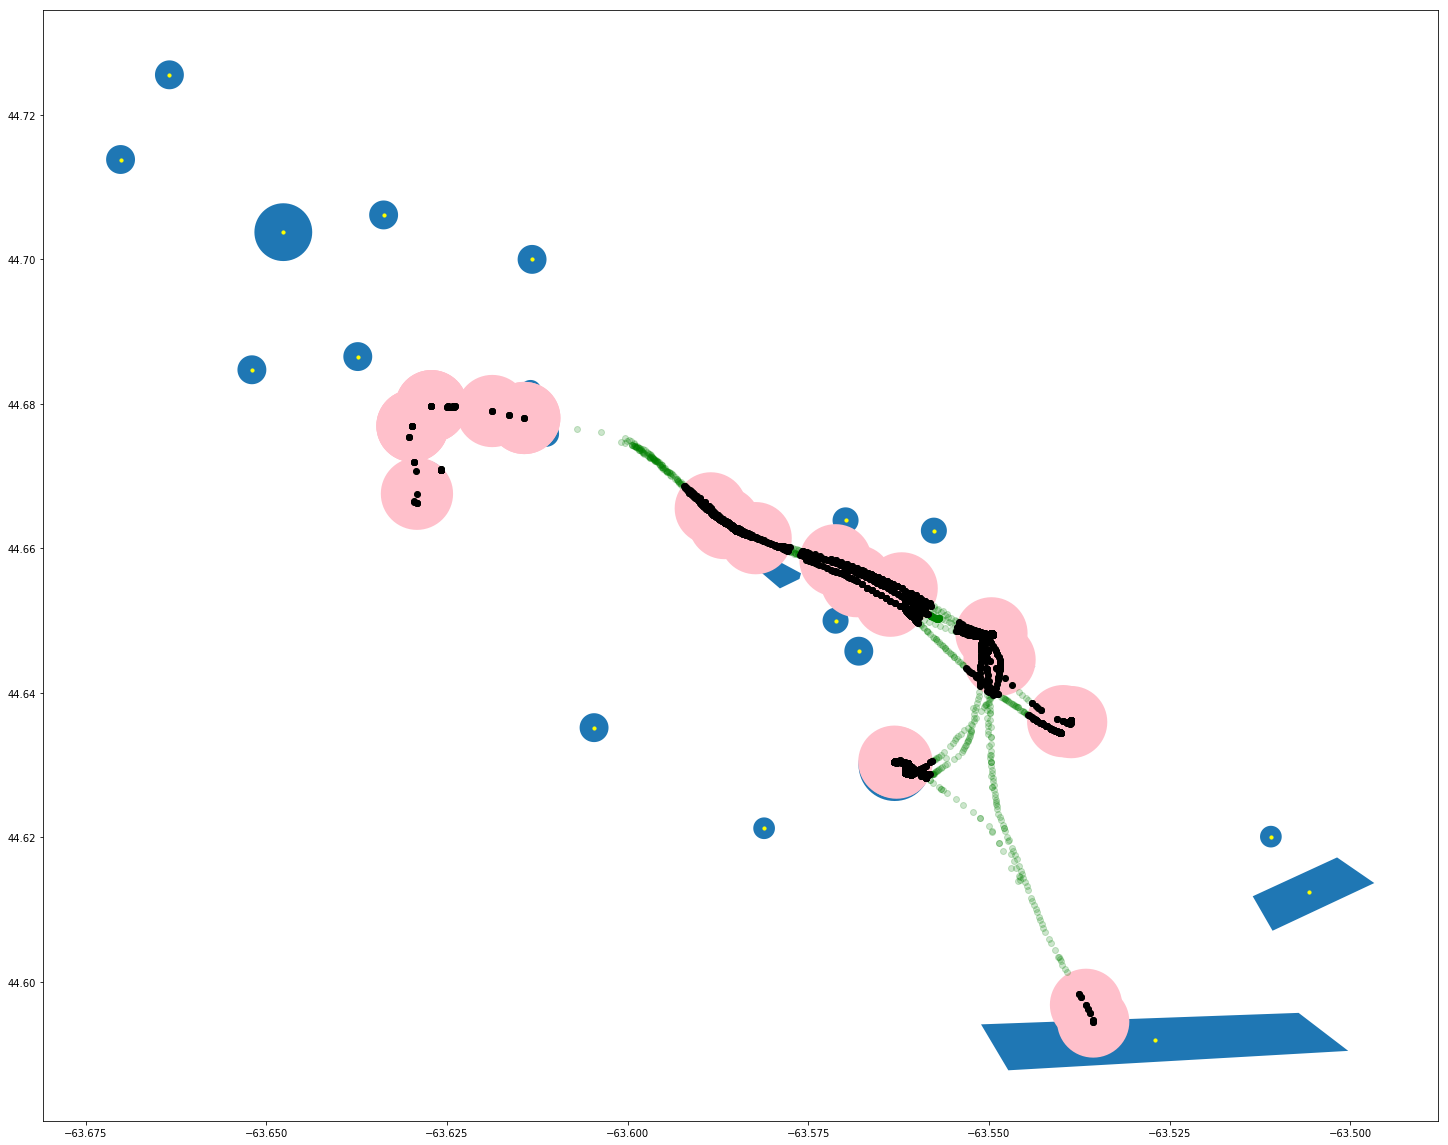

In [32]:
gdf2 = gpd.GeoDataFrame(d['df_h2'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h2']['location.coordinates.0'], d['df_h2']['location.coordinates.1'])])

p1=gdf2.loc[gdf2.distance(d1[0])==gdf2.distance(d1[0]).min(),:]
p2=gdf2.loc[gdf2.distance(d2[0])==gdf2.distance(d2[0]).min(),:]
p3=gdf2.loc[gdf2.distance(d3[0])==gdf2.distance(d3[0]).min(),:]
p4=gdf2.loc[gdf2.distance(d4[0])==gdf2.distance(d4[0]).min(),:]
p5=gdf2.loc[gdf2.distance(d5[0])==gdf2.distance(d5[0]).min(),:]
p6=gdf2.loc[gdf2.distance(d6[0])==gdf2.distance(d6[0]).min(),:]
p7=gdf2.loc[gdf2.distance(d7[0])==gdf2.distance(d7[0]).min(),:]
p8=gdf2.loc[gdf2.distance(d8[0])==gdf2.distance(d8[0]).min(),:]
p9=gdf2.loc[gdf2.distance(d9[0])==gdf2.distance(d9[0]).min(),:]
p10=gdf2.loc[gdf2.distance(d10[0])==gdf2.distance(d10[0]).min(),:]
p11=gdf2.loc[gdf2.distance(d11[0])==gdf2.distance(d11[0]).min(),:]
p12=gdf2.loc[gdf2.distance(d12[0])==gdf2.distance(d12[0]).min(),:]
p13=gdf2.loc[gdf2.distance(d13[0])==gdf2.distance(d13[0]).min(),:]
p14=gdf2.loc[gdf2.distance(d14[0])==gdf2.distance(d14[0]).min(),:]
p15=gdf2.loc[gdf2.distance(d15[0])==gdf2.distance(d15[0]).min(),:]
p16=gdf2.loc[gdf2.distance(d16[0])==gdf2.distance(d16[0]).min(),:]
p17=gdf2.loc[gdf2.distance(d17[0])==gdf2.distance(d17[0]).min(),:]
p18=gdf2.loc[gdf2.distance(d18[0])==gdf2.distance(d18[0]).min(),:]
p19=gdf2.loc[gdf2.distance(d19[0])==gdf2.distance(d19[0]).min(),:]
p20=gdf2.loc[gdf2.distance(d20[0])==gdf2.distance(d20[0]).min(),:]
p21=gdf2.loc[gdf2.distance(d21[0])==gdf2.distance(d21[0]).min(),:]
p22=gdf2.loc[gdf2.distance(d22[0])==gdf2.distance(d22[0]).min(),:]
p23=gdf2.loc[gdf2.distance(d23[0])==gdf2.distance(d23[0]).min(),:]
p24=gdf2.loc[gdf2.distance(d24[0])==gdf2.distance(d24[0]).min(),:]
p25=gdf2.loc[gdf2.distance(d25[0])==gdf2.distance(d25[0]).min(),:]
p26=gdf2.loc[gdf2.distance(d26[0])==gdf2.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf2.plot(ax=ax,color='g',alpha=0.2)
gdf2.loc[gdf2.within(p1),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p2),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p3),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p4),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p5),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p6),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p7),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p8),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p9),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p10),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p11),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p12),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p13),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p14),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p15),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p16),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p17),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p18),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p19),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p20),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p21),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p22),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p23),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p24),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p25),:].plot(ax=ax,color='k')
gdf2.loc[gdf2.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_02_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


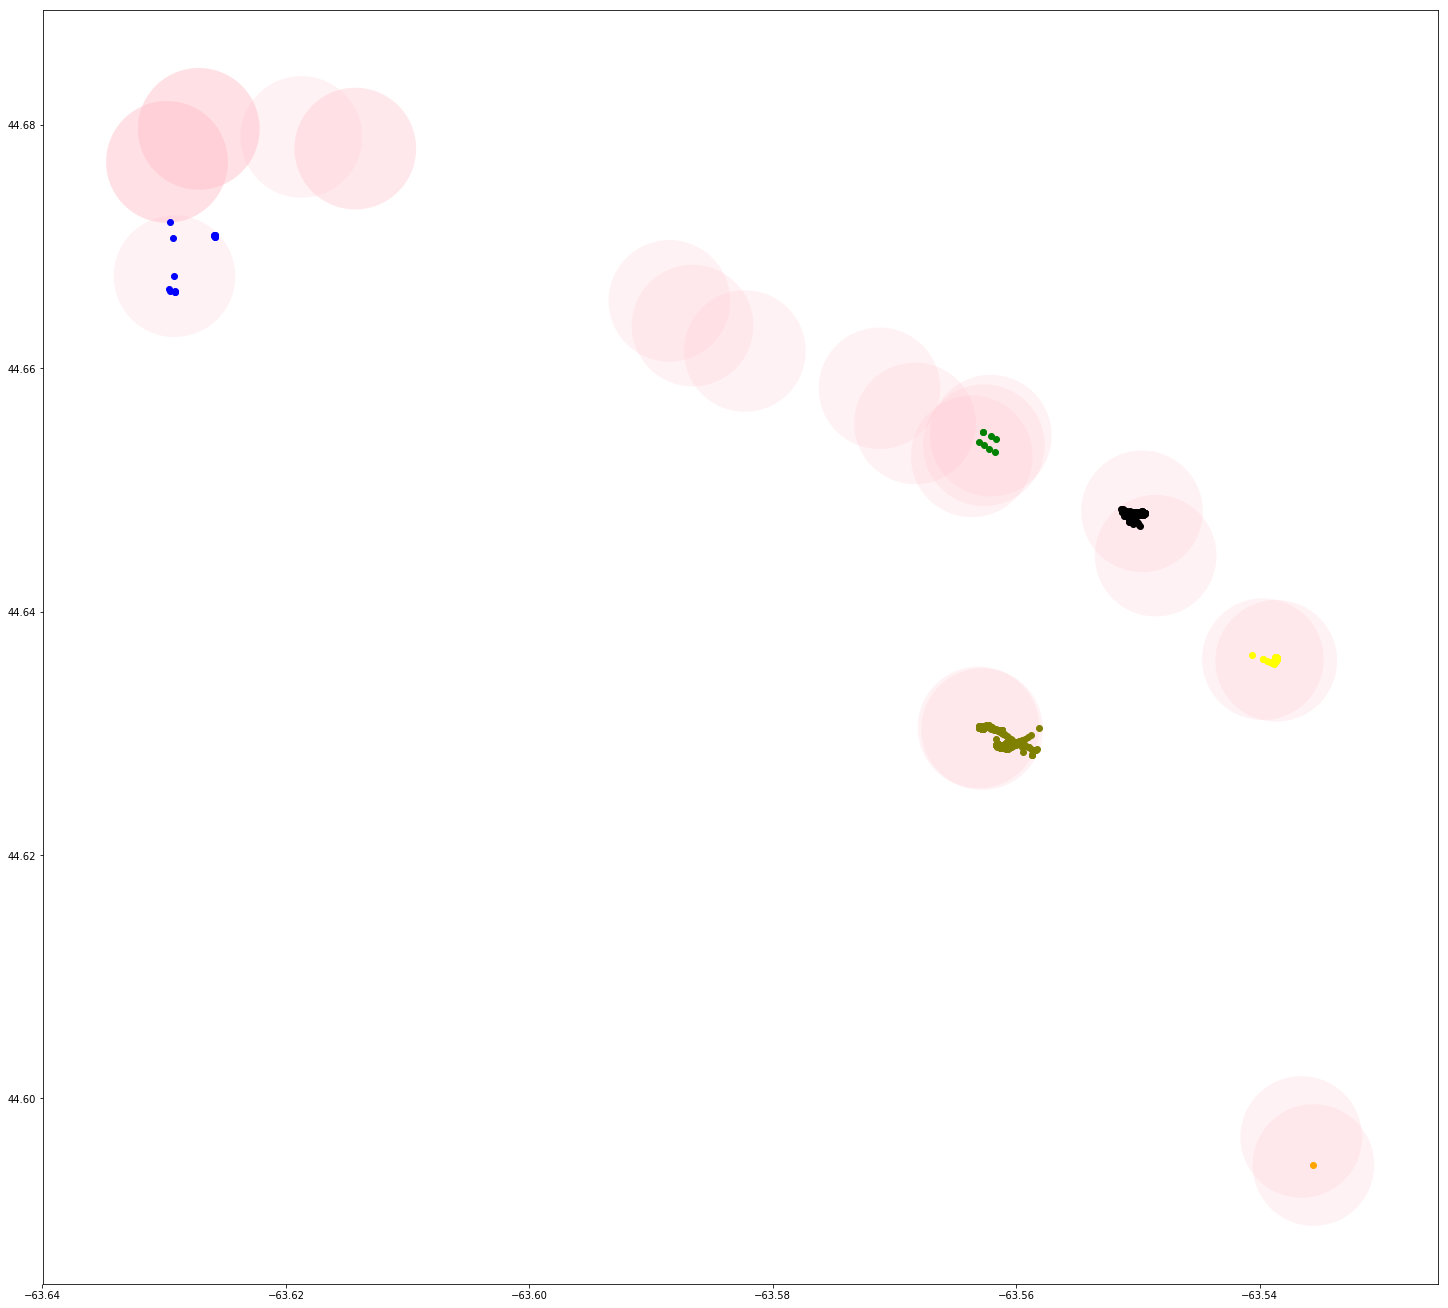

In [33]:
joinres=gpd.sjoin(gdf2,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_02_q2.png')

3rd interval

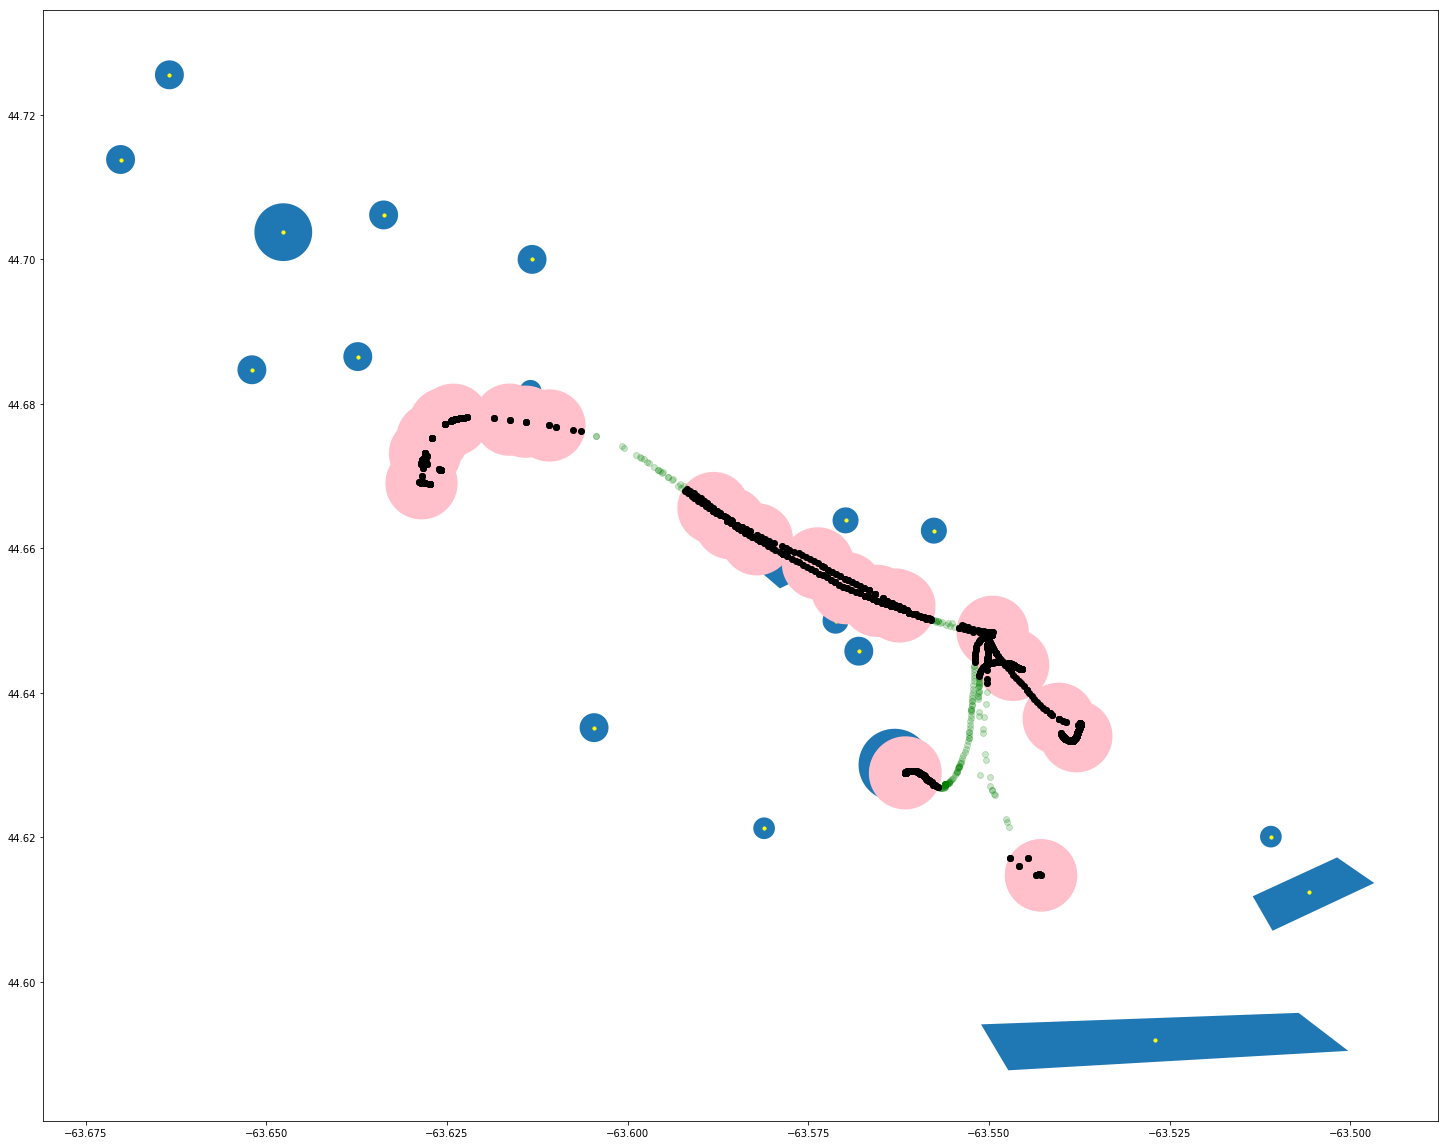

In [34]:
gdf3 = gpd.GeoDataFrame(d['df_h3'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h3']['location.coordinates.0'], d['df_h3']['location.coordinates.1'])])

p1=gdf3.loc[gdf3.distance(d1[0])==gdf3.distance(d1[0]).min(),:]
p2=gdf3.loc[gdf3.distance(d2[0])==gdf3.distance(d2[0]).min(),:]
p3=gdf3.loc[gdf3.distance(d3[0])==gdf3.distance(d3[0]).min(),:]
p4=gdf3.loc[gdf3.distance(d4[0])==gdf3.distance(d4[0]).min(),:]
p5=gdf3.loc[gdf3.distance(d5[0])==gdf3.distance(d5[0]).min(),:]
p6=gdf3.loc[gdf3.distance(d6[0])==gdf3.distance(d6[0]).min(),:]
p7=gdf3.loc[gdf3.distance(d7[0])==gdf3.distance(d7[0]).min(),:]
p8=gdf3.loc[gdf3.distance(d8[0])==gdf3.distance(d8[0]).min(),:]
p9=gdf3.loc[gdf3.distance(d9[0])==gdf3.distance(d9[0]).min(),:]
p10=gdf3.loc[gdf3.distance(d10[0])==gdf3.distance(d10[0]).min(),:]
p11=gdf3.loc[gdf3.distance(d11[0])==gdf3.distance(d11[0]).min(),:]
p12=gdf3.loc[gdf3.distance(d12[0])==gdf3.distance(d12[0]).min(),:]
p13=gdf3.loc[gdf3.distance(d13[0])==gdf3.distance(d13[0]).min(),:]
p14=gdf3.loc[gdf3.distance(d14[0])==gdf3.distance(d14[0]).min(),:]
p15=gdf3.loc[gdf3.distance(d15[0])==gdf3.distance(d15[0]).min(),:]
p16=gdf3.loc[gdf3.distance(d16[0])==gdf3.distance(d16[0]).min(),:]
p17=gdf3.loc[gdf3.distance(d17[0])==gdf3.distance(d17[0]).min(),:]
p18=gdf3.loc[gdf3.distance(d18[0])==gdf3.distance(d18[0]).min(),:]
p19=gdf3.loc[gdf3.distance(d19[0])==gdf3.distance(d19[0]).min(),:]
p20=gdf3.loc[gdf3.distance(d20[0])==gdf3.distance(d20[0]).min(),:]
p21=gdf3.loc[gdf3.distance(d21[0])==gdf3.distance(d21[0]).min(),:]
p22=gdf3.loc[gdf3.distance(d22[0])==gdf3.distance(d22[0]).min(),:]
p23=gdf3.loc[gdf3.distance(d23[0])==gdf3.distance(d23[0]).min(),:]
p24=gdf3.loc[gdf3.distance(d24[0])==gdf3.distance(d24[0]).min(),:]
p25=gdf3.loc[gdf3.distance(d25[0])==gdf3.distance(d25[0]).min(),:]
p26=gdf3.loc[gdf3.distance(d26[0])==gdf3.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf3.plot(ax=ax,color='g',alpha=0.2)
gdf3.loc[gdf3.within(p1),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p2),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p3),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p4),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p5),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p6),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p7),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p8),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p9),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p10),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p11),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p12),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p13),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p14),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p15),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p16),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p17),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p18),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p19),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p20),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p21),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p22),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p23),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p24),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p25),:].plot(ax=ax,color='k')
gdf3.loc[gdf3.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_03_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


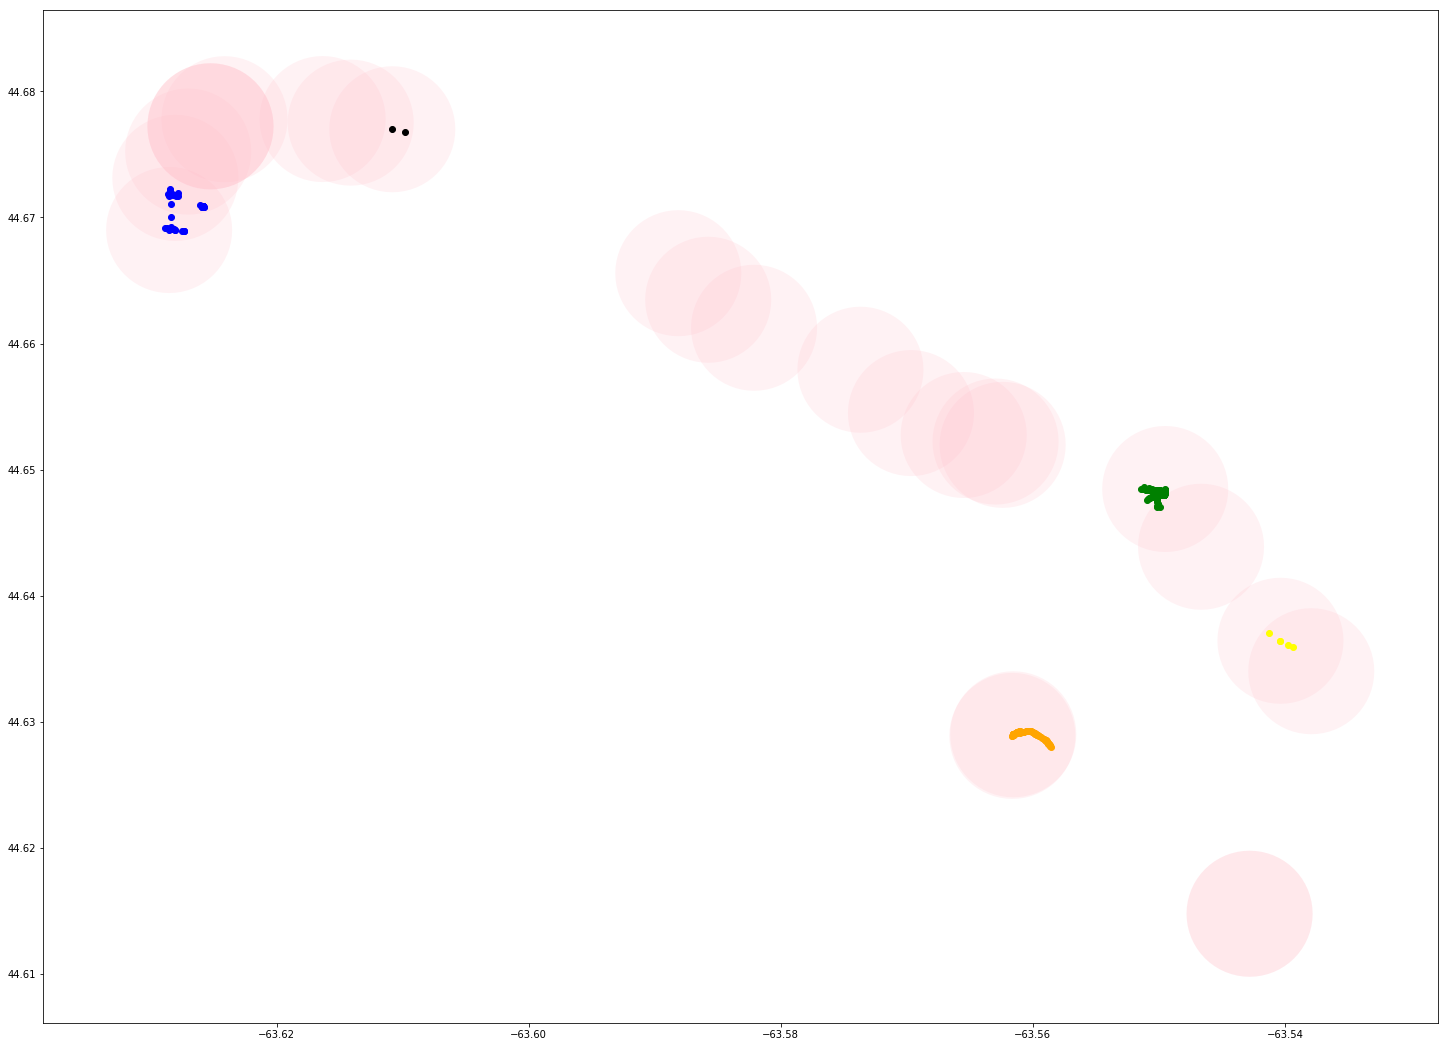

In [35]:
joinres=gpd.sjoin(gdf3,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_03_q2.png')

4th interval

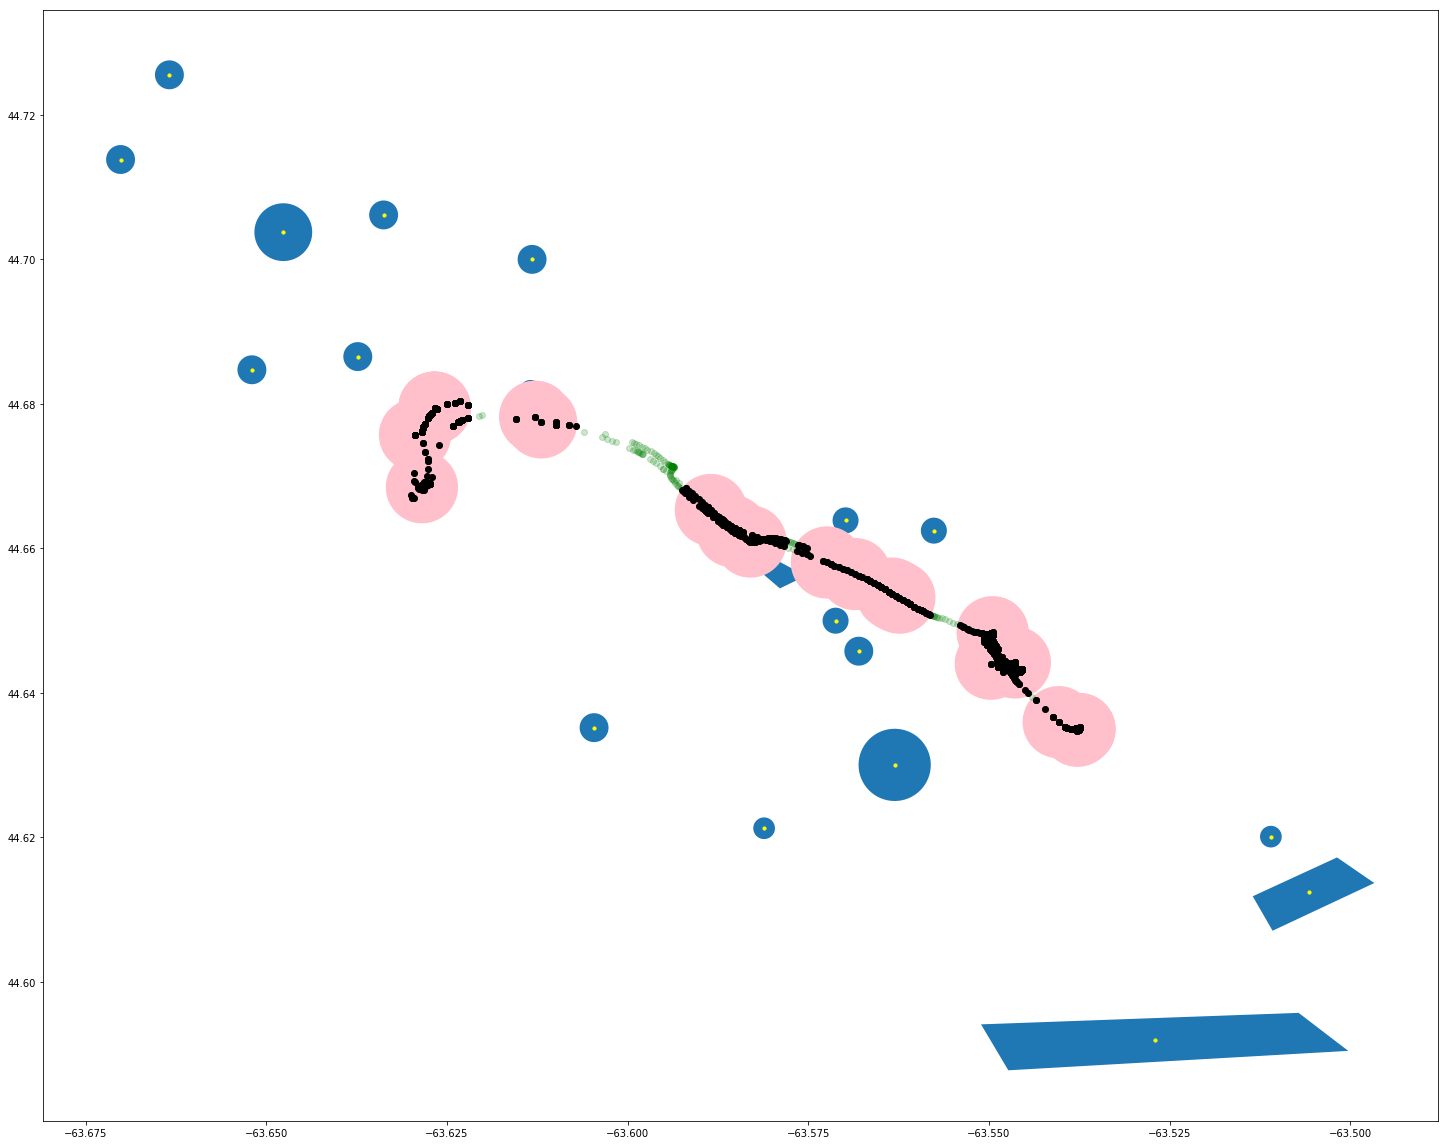

In [36]:
gdf4 = gpd.GeoDataFrame(d['df_h4'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h4']['location.coordinates.0'], d['df_h4']['location.coordinates.1'])])

p1=gdf4.loc[gdf4.distance(d1[0])==gdf4.distance(d1[0]).min(),:]
p2=gdf4.loc[gdf4.distance(d2[0])==gdf4.distance(d2[0]).min(),:]
p3=gdf4.loc[gdf4.distance(d3[0])==gdf4.distance(d3[0]).min(),:]
p4=gdf4.loc[gdf4.distance(d4[0])==gdf4.distance(d4[0]).min(),:]
p5=gdf4.loc[gdf4.distance(d5[0])==gdf4.distance(d5[0]).min(),:]
p6=gdf4.loc[gdf4.distance(d6[0])==gdf4.distance(d6[0]).min(),:]
p7=gdf4.loc[gdf4.distance(d7[0])==gdf4.distance(d7[0]).min(),:]
p8=gdf4.loc[gdf4.distance(d8[0])==gdf4.distance(d8[0]).min(),:]
p9=gdf4.loc[gdf4.distance(d9[0])==gdf4.distance(d9[0]).min(),:]
p10=gdf4.loc[gdf4.distance(d10[0])==gdf4.distance(d10[0]).min(),:]
p11=gdf4.loc[gdf4.distance(d11[0])==gdf4.distance(d11[0]).min(),:]
p12=gdf4.loc[gdf4.distance(d12[0])==gdf4.distance(d12[0]).min(),:]
p13=gdf4.loc[gdf4.distance(d13[0])==gdf4.distance(d13[0]).min(),:]
p14=gdf4.loc[gdf4.distance(d14[0])==gdf4.distance(d14[0]).min(),:]
p15=gdf4.loc[gdf4.distance(d15[0])==gdf4.distance(d15[0]).min(),:]
p16=gdf4.loc[gdf4.distance(d16[0])==gdf4.distance(d16[0]).min(),:]
p17=gdf4.loc[gdf4.distance(d17[0])==gdf4.distance(d17[0]).min(),:]
p18=gdf4.loc[gdf4.distance(d18[0])==gdf4.distance(d18[0]).min(),:]
p19=gdf4.loc[gdf4.distance(d19[0])==gdf4.distance(d19[0]).min(),:]
p20=gdf4.loc[gdf4.distance(d20[0])==gdf4.distance(d20[0]).min(),:]
p21=gdf4.loc[gdf4.distance(d21[0])==gdf4.distance(d21[0]).min(),:]
p22=gdf4.loc[gdf4.distance(d22[0])==gdf4.distance(d22[0]).min(),:]
p23=gdf4.loc[gdf4.distance(d23[0])==gdf4.distance(d23[0]).min(),:]
p24=gdf4.loc[gdf4.distance(d24[0])==gdf4.distance(d24[0]).min(),:]
p25=gdf4.loc[gdf4.distance(d25[0])==gdf4.distance(d25[0]).min(),:]
p26=gdf4.loc[gdf4.distance(d26[0])==gdf4.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf4.plot(ax=ax,color='g',alpha=0.2)
gdf4.loc[gdf4.within(p1),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p2),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p3),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p4),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p5),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p6),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p7),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p8),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p9),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p10),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p11),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p12),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p13),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p14),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p15),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p16),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p17),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p18),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p19),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p20),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p21),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p22),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p23),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p24),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p25),:].plot(ax=ax,color='k')
gdf4.loc[gdf4.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_04_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


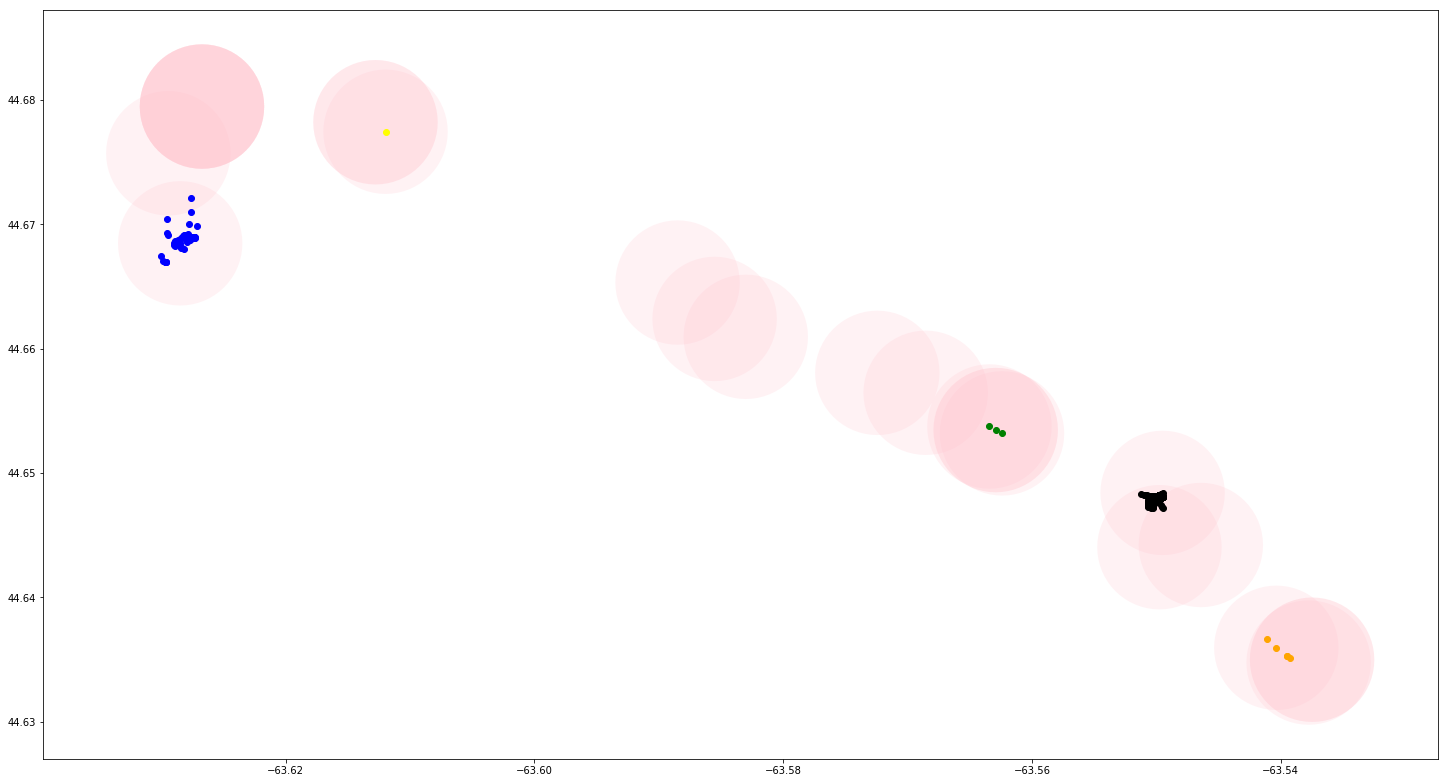

In [37]:
joinres=gpd.sjoin(gdf4,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_04_q2.png')

5th interval

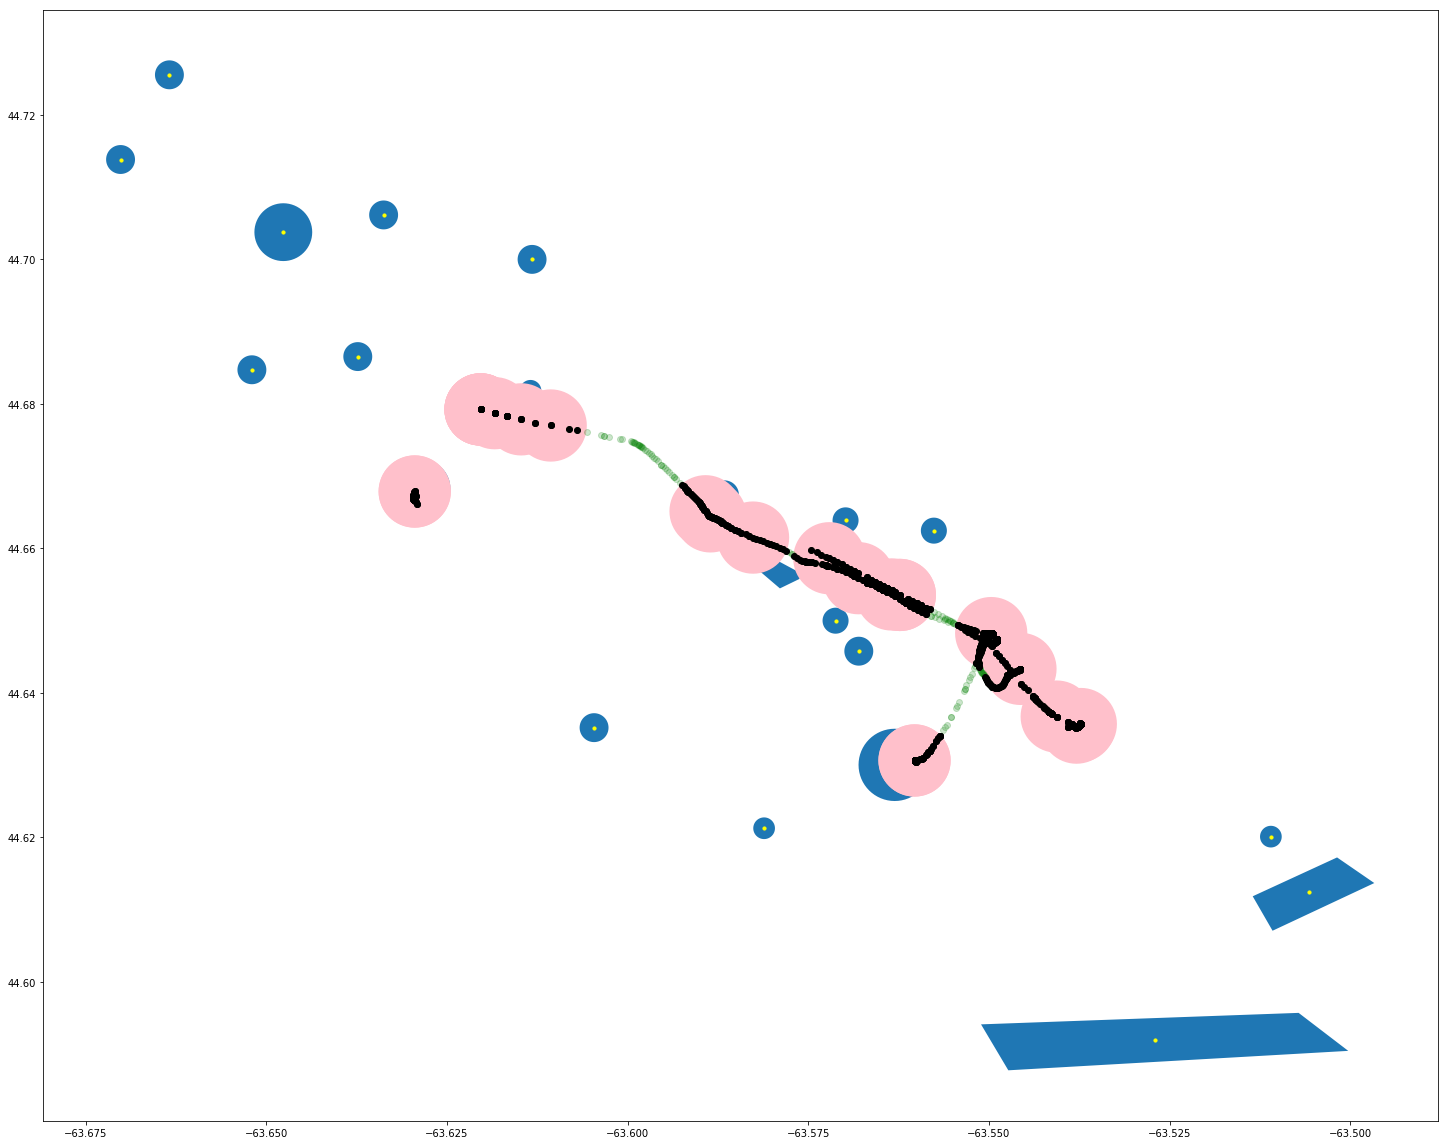

In [38]:
gdf5 = gpd.GeoDataFrame(d['df_h5'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h5']['location.coordinates.0'], d['df_h5']['location.coordinates.1'])])

p1=gdf5.loc[gdf5.distance(d1[0])==gdf5.distance(d1[0]).min(),:]
p2=gdf5.loc[gdf5.distance(d2[0])==gdf5.distance(d2[0]).min(),:]
p3=gdf5.loc[gdf5.distance(d3[0])==gdf5.distance(d3[0]).min(),:]
p4=gdf5.loc[gdf5.distance(d4[0])==gdf5.distance(d4[0]).min(),:]
p5=gdf5.loc[gdf5.distance(d5[0])==gdf5.distance(d5[0]).min(),:]
p6=gdf5.loc[gdf5.distance(d6[0])==gdf5.distance(d6[0]).min(),:]
p7=gdf5.loc[gdf5.distance(d7[0])==gdf5.distance(d7[0]).min(),:]
p8=gdf5.loc[gdf5.distance(d8[0])==gdf5.distance(d8[0]).min(),:]
p9=gdf5.loc[gdf5.distance(d9[0])==gdf5.distance(d9[0]).min(),:]
p10=gdf5.loc[gdf5.distance(d10[0])==gdf5.distance(d10[0]).min(),:]
p11=gdf5.loc[gdf5.distance(d11[0])==gdf5.distance(d11[0]).min(),:]
p12=gdf5.loc[gdf5.distance(d12[0])==gdf5.distance(d12[0]).min(),:]
p13=gdf5.loc[gdf5.distance(d13[0])==gdf5.distance(d13[0]).min(),:]
p14=gdf5.loc[gdf5.distance(d14[0])==gdf5.distance(d14[0]).min(),:]
p15=gdf5.loc[gdf5.distance(d15[0])==gdf5.distance(d15[0]).min(),:]
p16=gdf5.loc[gdf5.distance(d16[0])==gdf5.distance(d16[0]).min(),:]
p17=gdf5.loc[gdf5.distance(d17[0])==gdf5.distance(d17[0]).min(),:]
p18=gdf5.loc[gdf5.distance(d18[0])==gdf5.distance(d18[0]).min(),:]
p19=gdf5.loc[gdf5.distance(d19[0])==gdf5.distance(d19[0]).min(),:]
p20=gdf5.loc[gdf5.distance(d20[0])==gdf5.distance(d20[0]).min(),:]
p21=gdf5.loc[gdf5.distance(d21[0])==gdf5.distance(d21[0]).min(),:]
p22=gdf5.loc[gdf5.distance(d22[0])==gdf5.distance(d22[0]).min(),:]
p23=gdf5.loc[gdf5.distance(d23[0])==gdf5.distance(d23[0]).min(),:]
p24=gdf5.loc[gdf5.distance(d24[0])==gdf5.distance(d24[0]).min(),:]
p25=gdf5.loc[gdf5.distance(d25[0])==gdf5.distance(d25[0]).min(),:]
p26=gdf5.loc[gdf5.distance(d26[0])==gdf5.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf5.plot(ax=ax,color='g',alpha=0.2)
gdf5.loc[gdf5.within(p1),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p2),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p3),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p4),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p5),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p6),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p7),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p8),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p9),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p10),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p11),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p12),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p13),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p14),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p15),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p16),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p17),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p18),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p19),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p20),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p21),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p22),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p23),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p24),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p25),:].plot(ax=ax,color='k')
gdf5.loc[gdf5.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_05_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


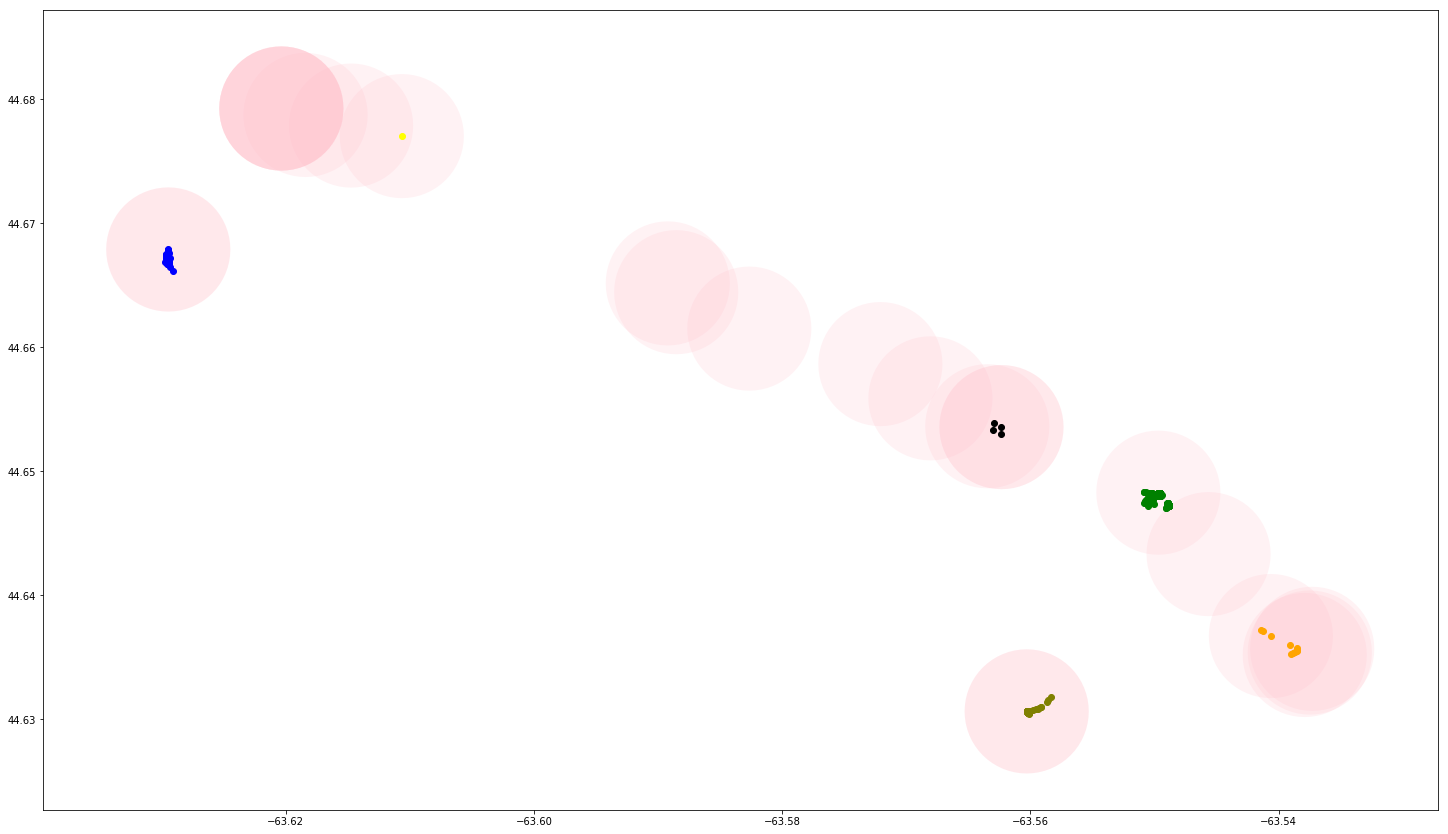

In [39]:
joinres=gpd.sjoin(gdf5,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_05_q2.png')

6th interval

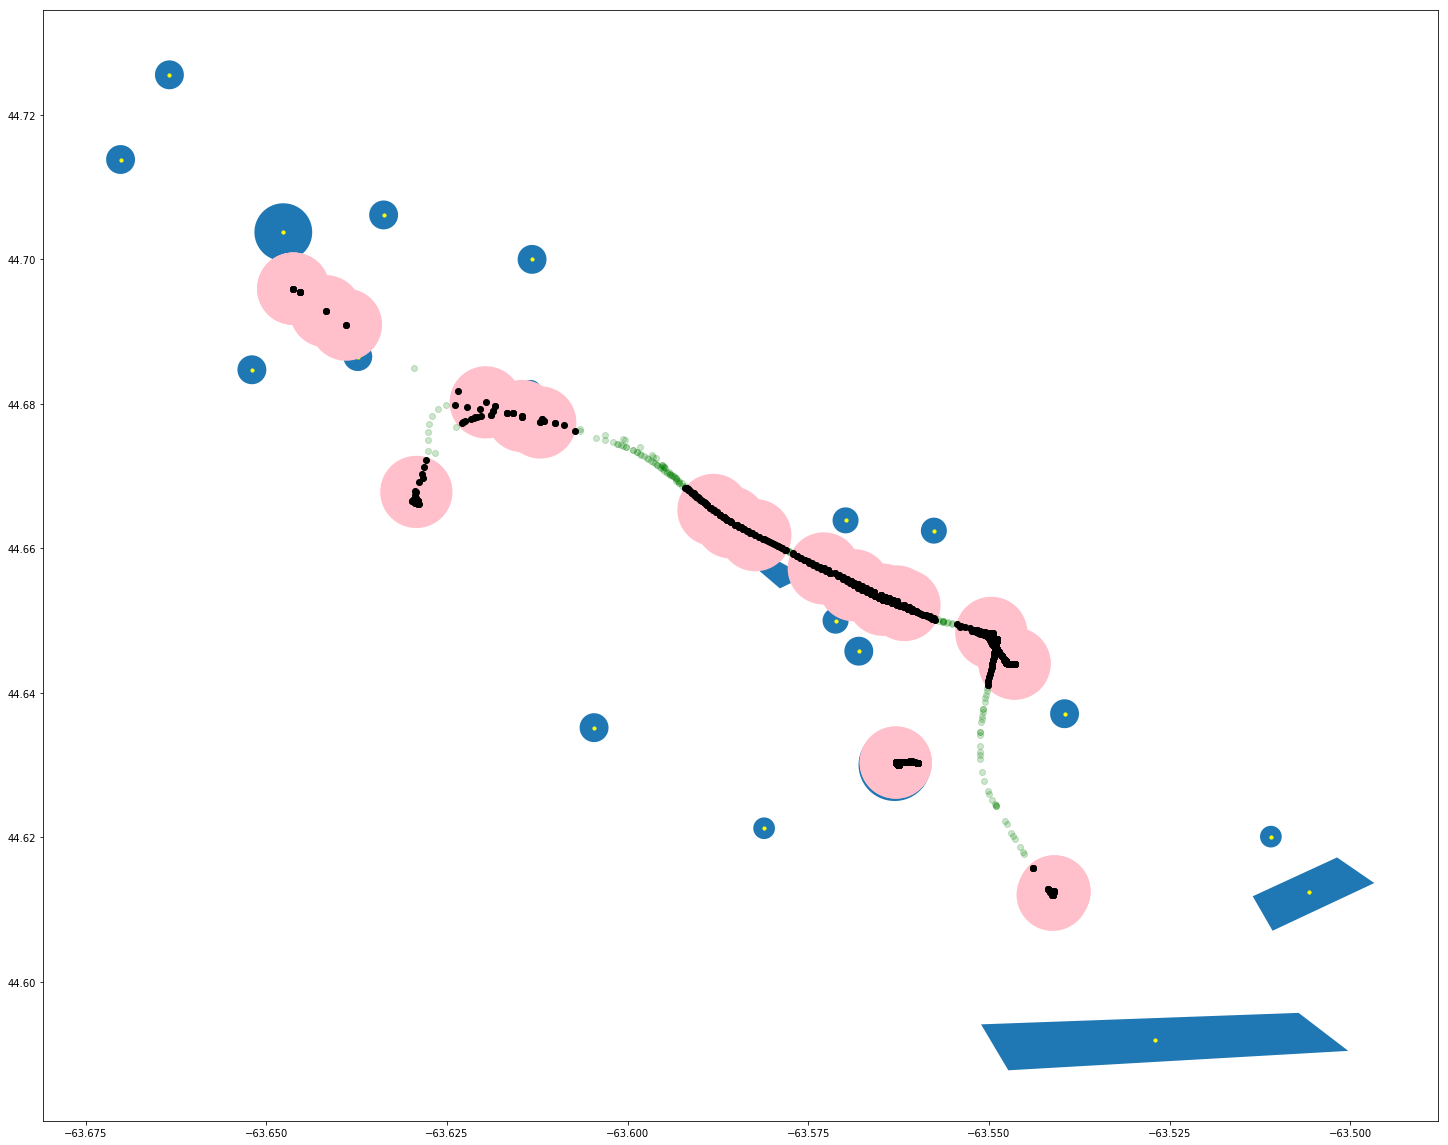

In [40]:
gdf6 = gpd.GeoDataFrame(d['df_h6'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h6']['location.coordinates.0'], d['df_h6']['location.coordinates.1'])])

p1=gdf6.loc[gdf6.distance(d1[0])==gdf6.distance(d1[0]).min(),:]
p2=gdf6.loc[gdf6.distance(d2[0])==gdf6.distance(d2[0]).min(),:]
p3=gdf6.loc[gdf6.distance(d3[0])==gdf6.distance(d3[0]).min(),:]
p4=gdf6.loc[gdf6.distance(d4[0])==gdf6.distance(d4[0]).min(),:]
p5=gdf6.loc[gdf6.distance(d5[0])==gdf6.distance(d5[0]).min(),:]
p6=gdf6.loc[gdf6.distance(d6[0])==gdf6.distance(d6[0]).min(),:]
p7=gdf6.loc[gdf6.distance(d7[0])==gdf6.distance(d7[0]).min(),:]
p8=gdf6.loc[gdf6.distance(d8[0])==gdf6.distance(d8[0]).min(),:]
p9=gdf6.loc[gdf6.distance(d9[0])==gdf6.distance(d9[0]).min(),:]
p10=gdf6.loc[gdf6.distance(d10[0])==gdf6.distance(d10[0]).min(),:]
p11=gdf6.loc[gdf6.distance(d11[0])==gdf6.distance(d11[0]).min(),:]
p12=gdf6.loc[gdf6.distance(d12[0])==gdf6.distance(d12[0]).min(),:]
p13=gdf6.loc[gdf6.distance(d13[0])==gdf6.distance(d13[0]).min(),:]
p14=gdf6.loc[gdf6.distance(d14[0])==gdf6.distance(d14[0]).min(),:]
p15=gdf6.loc[gdf6.distance(d15[0])==gdf6.distance(d15[0]).min(),:]
p16=gdf6.loc[gdf6.distance(d16[0])==gdf6.distance(d16[0]).min(),:]
p17=gdf6.loc[gdf6.distance(d17[0])==gdf6.distance(d17[0]).min(),:]
p18=gdf6.loc[gdf6.distance(d18[0])==gdf6.distance(d18[0]).min(),:]
p19=gdf6.loc[gdf6.distance(d19[0])==gdf6.distance(d19[0]).min(),:]
p20=gdf6.loc[gdf6.distance(d20[0])==gdf6.distance(d20[0]).min(),:]
p21=gdf6.loc[gdf6.distance(d21[0])==gdf6.distance(d21[0]).min(),:]
p22=gdf6.loc[gdf6.distance(d22[0])==gdf6.distance(d22[0]).min(),:]
p23=gdf6.loc[gdf6.distance(d23[0])==gdf6.distance(d23[0]).min(),:]
p24=gdf6.loc[gdf6.distance(d24[0])==gdf6.distance(d24[0]).min(),:]
p25=gdf6.loc[gdf6.distance(d25[0])==gdf6.distance(d25[0]).min(),:]
p26=gdf6.loc[gdf6.distance(d26[0])==gdf6.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf6.plot(ax=ax,color='g',alpha=0.2)
gdf6.loc[gdf6.within(p1),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p2),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p3),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p4),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p5),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p6),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p7),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p8),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p9),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p10),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p11),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p12),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p13),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p14),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p15),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p16),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p17),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p18),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p19),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p20),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p21),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p22),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p23),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p24),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p25),:].plot(ax=ax,color='k')
gdf6.loc[gdf6.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_06_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


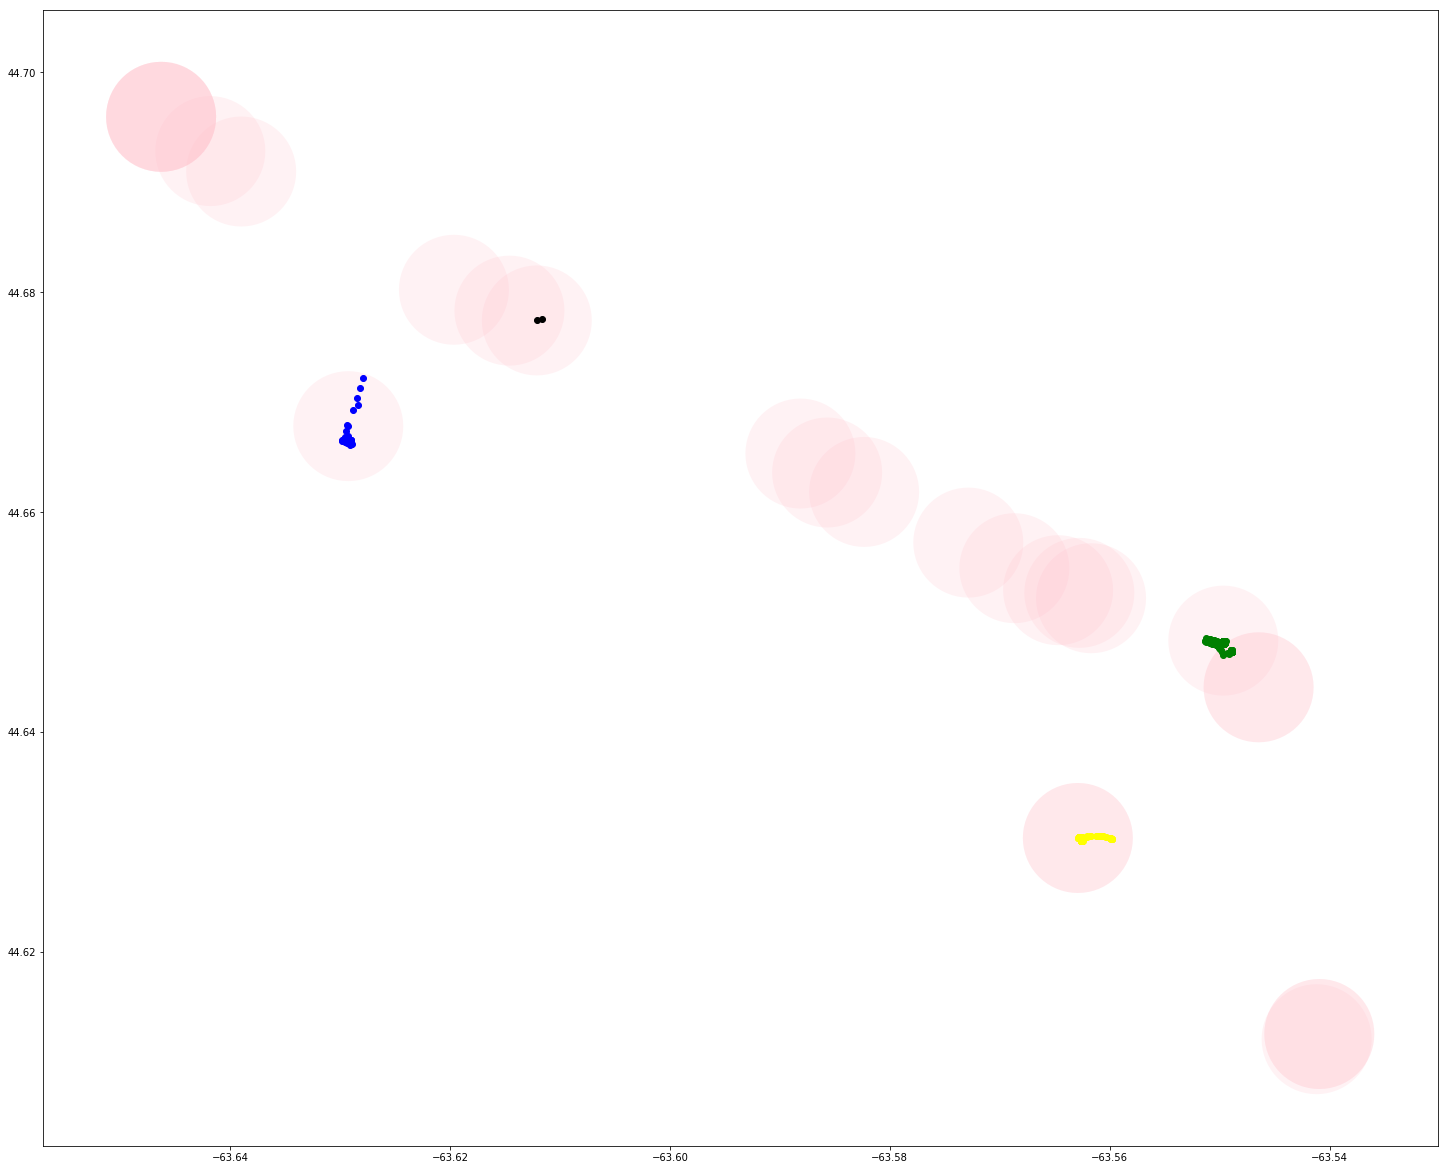

In [41]:
joinres=gpd.sjoin(gdf6,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_06_q2.png')

7th interval

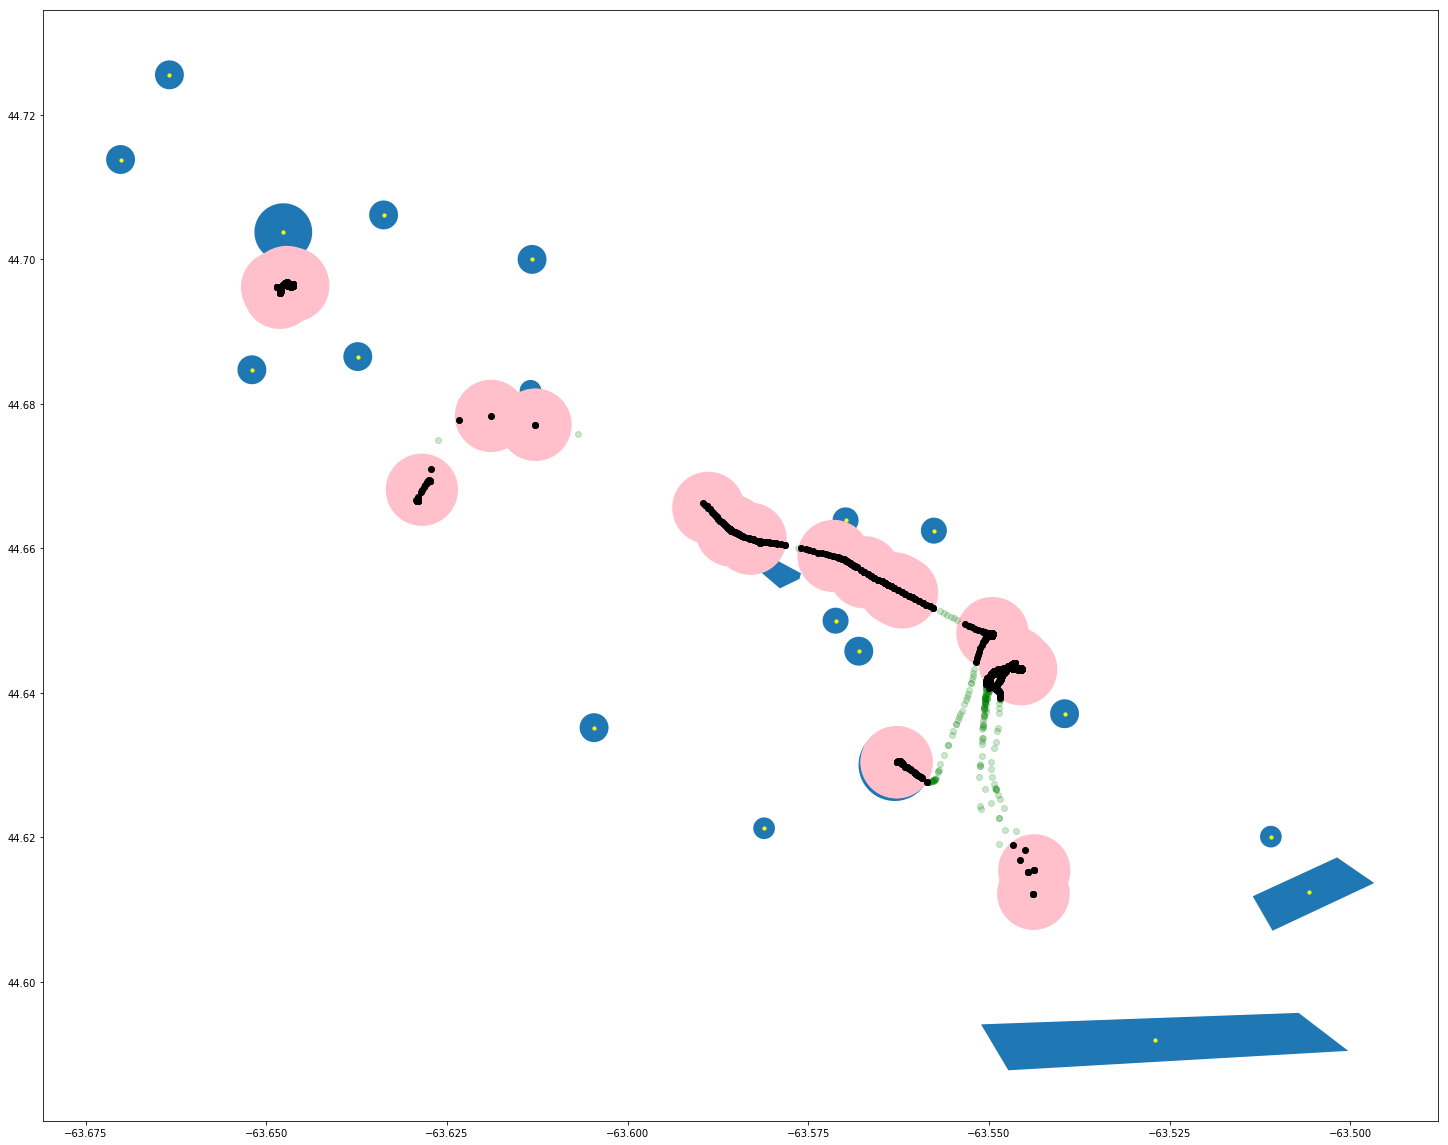

In [42]:
gdf7 = gpd.GeoDataFrame(d['df_h7'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h7']['location.coordinates.0'], d['df_h7']['location.coordinates.1'])])

p1=gdf7.loc[gdf7.distance(d1[0])==gdf7.distance(d1[0]).min(),:]
p2=gdf7.loc[gdf7.distance(d2[0])==gdf7.distance(d2[0]).min(),:]
p3=gdf7.loc[gdf7.distance(d3[0])==gdf7.distance(d3[0]).min(),:]
p4=gdf7.loc[gdf7.distance(d4[0])==gdf7.distance(d4[0]).min(),:]
p5=gdf7.loc[gdf7.distance(d5[0])==gdf7.distance(d5[0]).min(),:]
p6=gdf7.loc[gdf7.distance(d6[0])==gdf7.distance(d6[0]).min(),:]
p7=gdf7.loc[gdf7.distance(d7[0])==gdf7.distance(d7[0]).min(),:]
p8=gdf7.loc[gdf7.distance(d8[0])==gdf7.distance(d8[0]).min(),:]
p9=gdf7.loc[gdf7.distance(d9[0])==gdf7.distance(d9[0]).min(),:]
p10=gdf7.loc[gdf7.distance(d10[0])==gdf7.distance(d10[0]).min(),:]
p11=gdf7.loc[gdf7.distance(d11[0])==gdf7.distance(d11[0]).min(),:]
p12=gdf7.loc[gdf7.distance(d12[0])==gdf7.distance(d12[0]).min(),:]
p13=gdf7.loc[gdf7.distance(d13[0])==gdf7.distance(d13[0]).min(),:]
p14=gdf7.loc[gdf7.distance(d14[0])==gdf7.distance(d14[0]).min(),:]
p15=gdf7.loc[gdf7.distance(d15[0])==gdf7.distance(d15[0]).min(),:]
p16=gdf7.loc[gdf7.distance(d16[0])==gdf7.distance(d16[0]).min(),:]
p17=gdf7.loc[gdf7.distance(d17[0])==gdf7.distance(d17[0]).min(),:]
p18=gdf7.loc[gdf7.distance(d18[0])==gdf7.distance(d18[0]).min(),:]
p19=gdf7.loc[gdf7.distance(d19[0])==gdf7.distance(d19[0]).min(),:]
p20=gdf7.loc[gdf7.distance(d20[0])==gdf7.distance(d20[0]).min(),:]
p21=gdf7.loc[gdf7.distance(d21[0])==gdf7.distance(d21[0]).min(),:]
p22=gdf7.loc[gdf7.distance(d22[0])==gdf7.distance(d22[0]).min(),:]
p23=gdf7.loc[gdf7.distance(d23[0])==gdf7.distance(d23[0]).min(),:]
p24=gdf7.loc[gdf7.distance(d24[0])==gdf7.distance(d24[0]).min(),:]
p25=gdf7.loc[gdf7.distance(d25[0])==gdf7.distance(d25[0]).min(),:]
p26=gdf7.loc[gdf7.distance(d26[0])==gdf7.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf7.plot(ax=ax,color='g',alpha=0.2)
gdf7.loc[gdf7.within(p1),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p2),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p3),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p4),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p5),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p6),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p7),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p8),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p9),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p10),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p11),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p12),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p13),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p14),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p15),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p16),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p17),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p18),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p19),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p20),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p21),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p22),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p23),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p24),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p25),:].plot(ax=ax,color='k')
gdf7.loc[gdf7.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_07_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


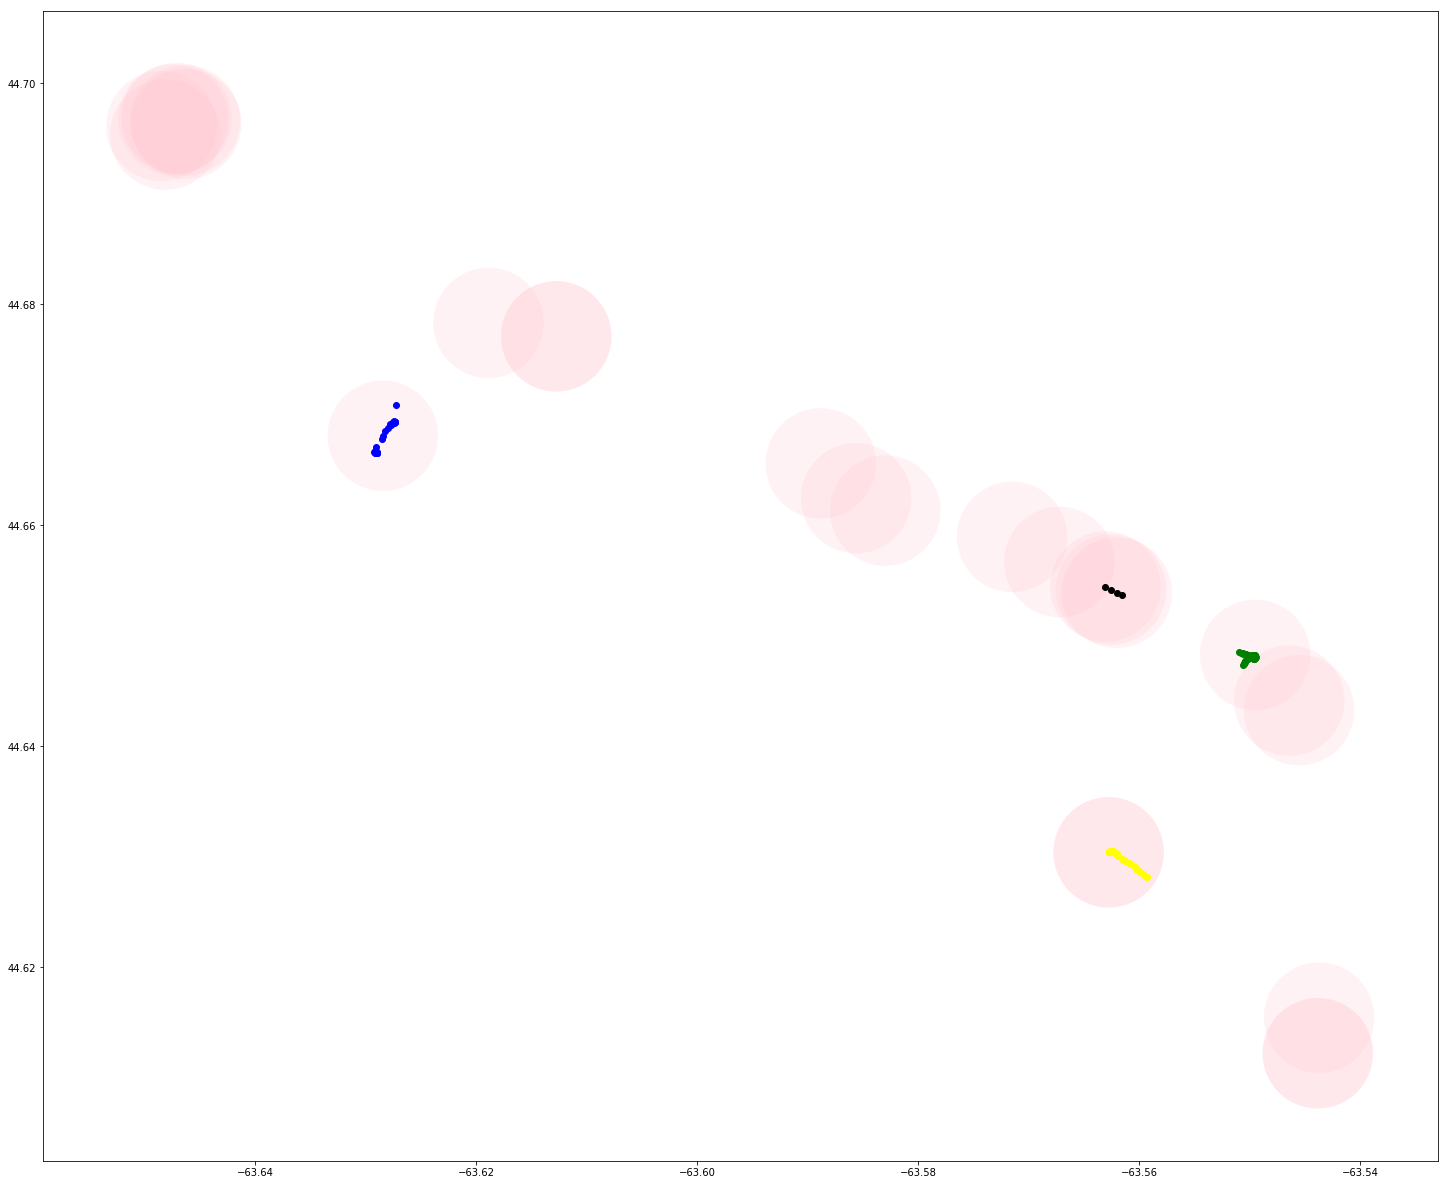

In [43]:
joinres=gpd.sjoin(gdf7,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_07_q2.png')

8th interval

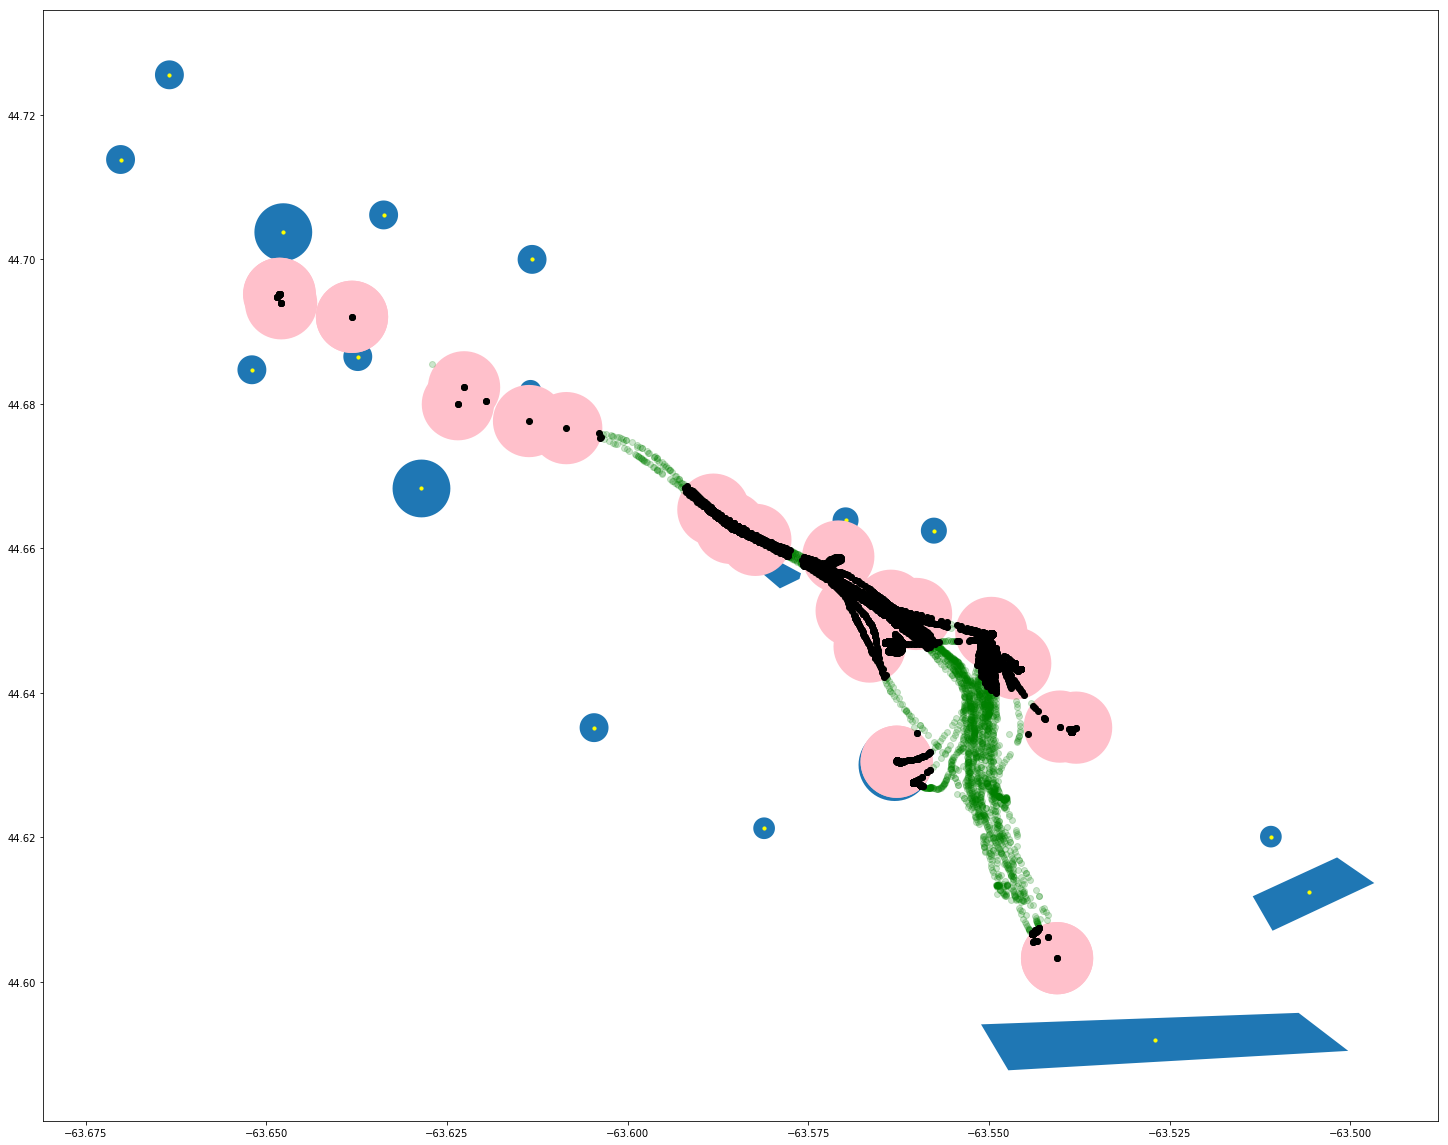

In [44]:
gdf8 = gpd.GeoDataFrame(d['df_h8'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h8']['location.coordinates.0'], d['df_h8']['location.coordinates.1'])])

p1=gdf8.loc[gdf8.distance(d1[0])==gdf8.distance(d1[0]).min(),:]
p2=gdf8.loc[gdf8.distance(d2[0])==gdf8.distance(d2[0]).min(),:]
p3=gdf8.loc[gdf8.distance(d3[0])==gdf8.distance(d3[0]).min(),:]
p4=gdf8.loc[gdf8.distance(d4[0])==gdf8.distance(d4[0]).min(),:]
p5=gdf8.loc[gdf8.distance(d5[0])==gdf8.distance(d5[0]).min(),:]
p6=gdf8.loc[gdf8.distance(d6[0])==gdf8.distance(d6[0]).min(),:]
p7=gdf8.loc[gdf8.distance(d7[0])==gdf8.distance(d7[0]).min(),:]
p8=gdf8.loc[gdf8.distance(d8[0])==gdf8.distance(d8[0]).min(),:]
p9=gdf8.loc[gdf8.distance(d9[0])==gdf8.distance(d9[0]).min(),:]
p10=gdf8.loc[gdf8.distance(d10[0])==gdf8.distance(d10[0]).min(),:]
p11=gdf8.loc[gdf8.distance(d11[0])==gdf8.distance(d11[0]).min(),:]
p12=gdf8.loc[gdf8.distance(d12[0])==gdf8.distance(d12[0]).min(),:]
p13=gdf8.loc[gdf8.distance(d13[0])==gdf8.distance(d13[0]).min(),:]
p14=gdf8.loc[gdf8.distance(d14[0])==gdf8.distance(d14[0]).min(),:]
p15=gdf8.loc[gdf8.distance(d15[0])==gdf8.distance(d15[0]).min(),:]
p16=gdf8.loc[gdf8.distance(d16[0])==gdf8.distance(d16[0]).min(),:]
p17=gdf8.loc[gdf8.distance(d17[0])==gdf8.distance(d17[0]).min(),:]
p18=gdf8.loc[gdf8.distance(d18[0])==gdf8.distance(d18[0]).min(),:]
p19=gdf8.loc[gdf8.distance(d19[0])==gdf8.distance(d19[0]).min(),:]
p20=gdf8.loc[gdf8.distance(d20[0])==gdf8.distance(d20[0]).min(),:]
p21=gdf8.loc[gdf8.distance(d21[0])==gdf8.distance(d21[0]).min(),:]
p22=gdf8.loc[gdf8.distance(d22[0])==gdf8.distance(d22[0]).min(),:]
p23=gdf8.loc[gdf8.distance(d23[0])==gdf8.distance(d23[0]).min(),:]
p24=gdf8.loc[gdf8.distance(d24[0])==gdf8.distance(d24[0]).min(),:]
p25=gdf8.loc[gdf8.distance(d25[0])==gdf8.distance(d25[0]).min(),:]
p26=gdf8.loc[gdf8.distance(d26[0])==gdf8.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf8.plot(ax=ax,color='g',alpha=0.2)
gdf8.loc[gdf8.within(p1),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p2),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p3),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p4),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p5),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p6),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p7),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p8),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p9),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p10),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p11),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p12),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p13),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p14),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p15),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p16),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p17),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p18),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p19),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p20),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p21),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p22),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p23),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p24),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p25),:].plot(ax=ax,color='k')
gdf8.loc[gdf8.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_08_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


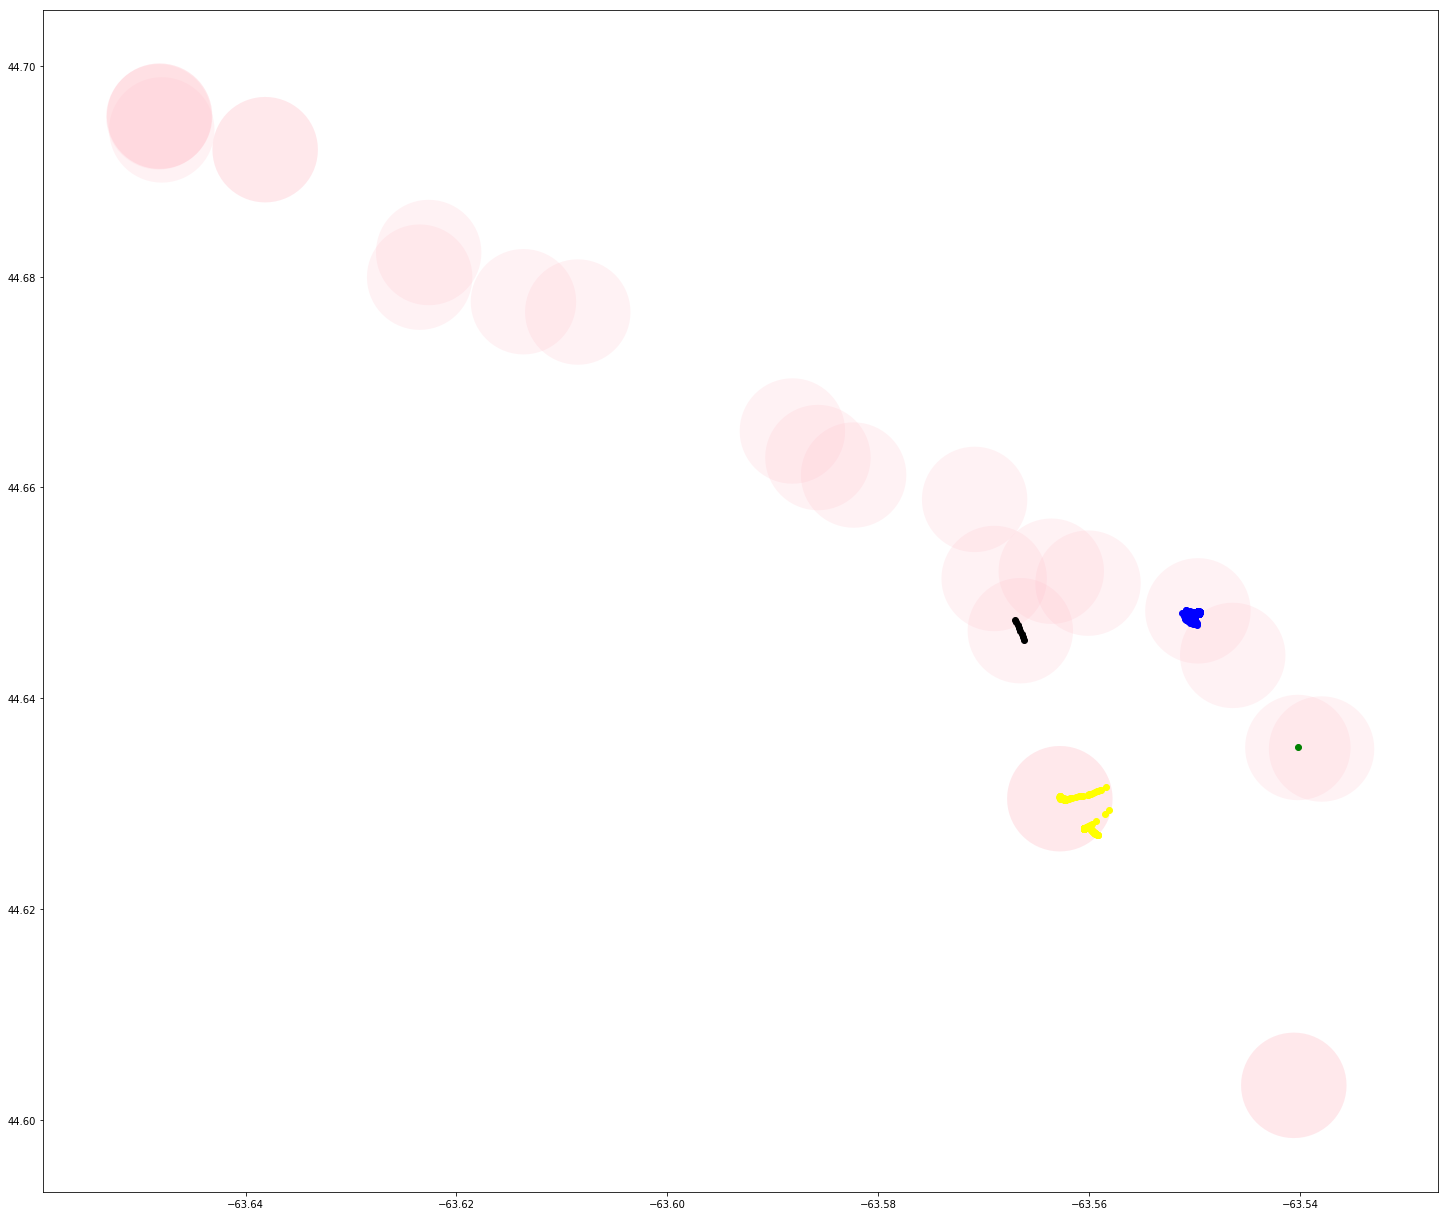

In [45]:
joinres=gpd.sjoin(gdf8,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_08_q2.png')

9th interval

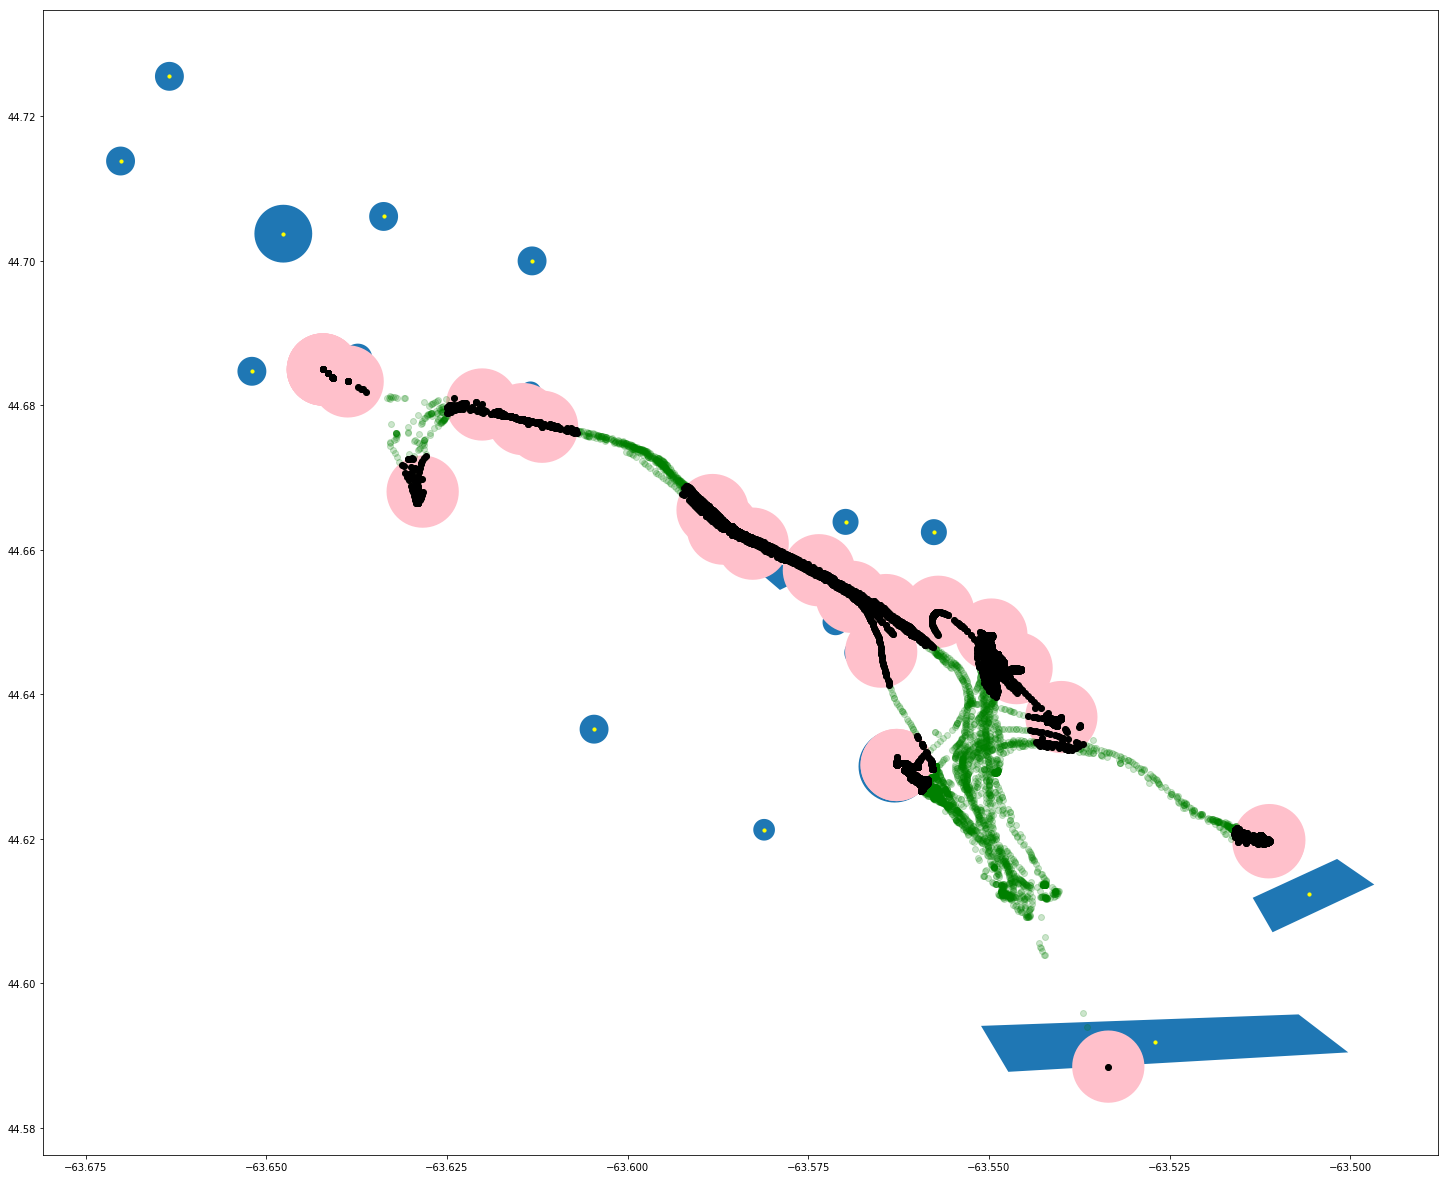

In [46]:
gdf9 = gpd.GeoDataFrame(d['df_h9'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h9']['location.coordinates.0'], d['df_h9']['location.coordinates.1'])])

p1=gdf9.loc[gdf9.distance(d1[0])==gdf9.distance(d1[0]).min(),:]
p2=gdf9.loc[gdf9.distance(d2[0])==gdf9.distance(d2[0]).min(),:]
p3=gdf9.loc[gdf9.distance(d3[0])==gdf9.distance(d3[0]).min(),:]
p4=gdf9.loc[gdf9.distance(d4[0])==gdf9.distance(d4[0]).min(),:]
p5=gdf9.loc[gdf9.distance(d5[0])==gdf9.distance(d5[0]).min(),:]
p6=gdf9.loc[gdf9.distance(d6[0])==gdf9.distance(d6[0]).min(),:]
p7=gdf9.loc[gdf9.distance(d7[0])==gdf9.distance(d7[0]).min(),:]
p8=gdf9.loc[gdf9.distance(d8[0])==gdf9.distance(d8[0]).min(),:]
p9=gdf9.loc[gdf9.distance(d9[0])==gdf9.distance(d9[0]).min(),:]
p10=gdf9.loc[gdf9.distance(d10[0])==gdf9.distance(d10[0]).min(),:]
p11=gdf9.loc[gdf9.distance(d11[0])==gdf9.distance(d11[0]).min(),:]
p12=gdf9.loc[gdf9.distance(d12[0])==gdf9.distance(d12[0]).min(),:]
p13=gdf9.loc[gdf9.distance(d13[0])==gdf9.distance(d13[0]).min(),:]
p14=gdf9.loc[gdf9.distance(d14[0])==gdf9.distance(d14[0]).min(),:]
p15=gdf9.loc[gdf9.distance(d15[0])==gdf9.distance(d15[0]).min(),:]
p16=gdf9.loc[gdf9.distance(d16[0])==gdf9.distance(d16[0]).min(),:]
p17=gdf9.loc[gdf9.distance(d17[0])==gdf9.distance(d17[0]).min(),:]
p18=gdf9.loc[gdf9.distance(d18[0])==gdf9.distance(d18[0]).min(),:]
p19=gdf9.loc[gdf9.distance(d19[0])==gdf9.distance(d19[0]).min(),:]
p20=gdf9.loc[gdf9.distance(d20[0])==gdf9.distance(d20[0]).min(),:]
p21=gdf9.loc[gdf9.distance(d21[0])==gdf9.distance(d21[0]).min(),:]
p22=gdf9.loc[gdf9.distance(d22[0])==gdf9.distance(d22[0]).min(),:]
p23=gdf9.loc[gdf9.distance(d23[0])==gdf9.distance(d23[0]).min(),:]
p24=gdf9.loc[gdf9.distance(d24[0])==gdf9.distance(d24[0]).min(),:]
p25=gdf9.loc[gdf9.distance(d25[0])==gdf9.distance(d25[0]).min(),:]
p26=gdf9.loc[gdf9.distance(d26[0])==gdf9.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf9.plot(ax=ax,color='g',alpha=0.2)
gdf9.loc[gdf9.within(p1),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p2),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p3),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p4),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p5),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p6),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p7),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p8),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p9),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p10),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p11),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p12),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p13),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p14),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p15),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p16),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p17),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p18),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p19),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p20),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p21),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p22),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p23),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p24),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p25),:].plot(ax=ax,color='k')
gdf9.loc[gdf9.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_09_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


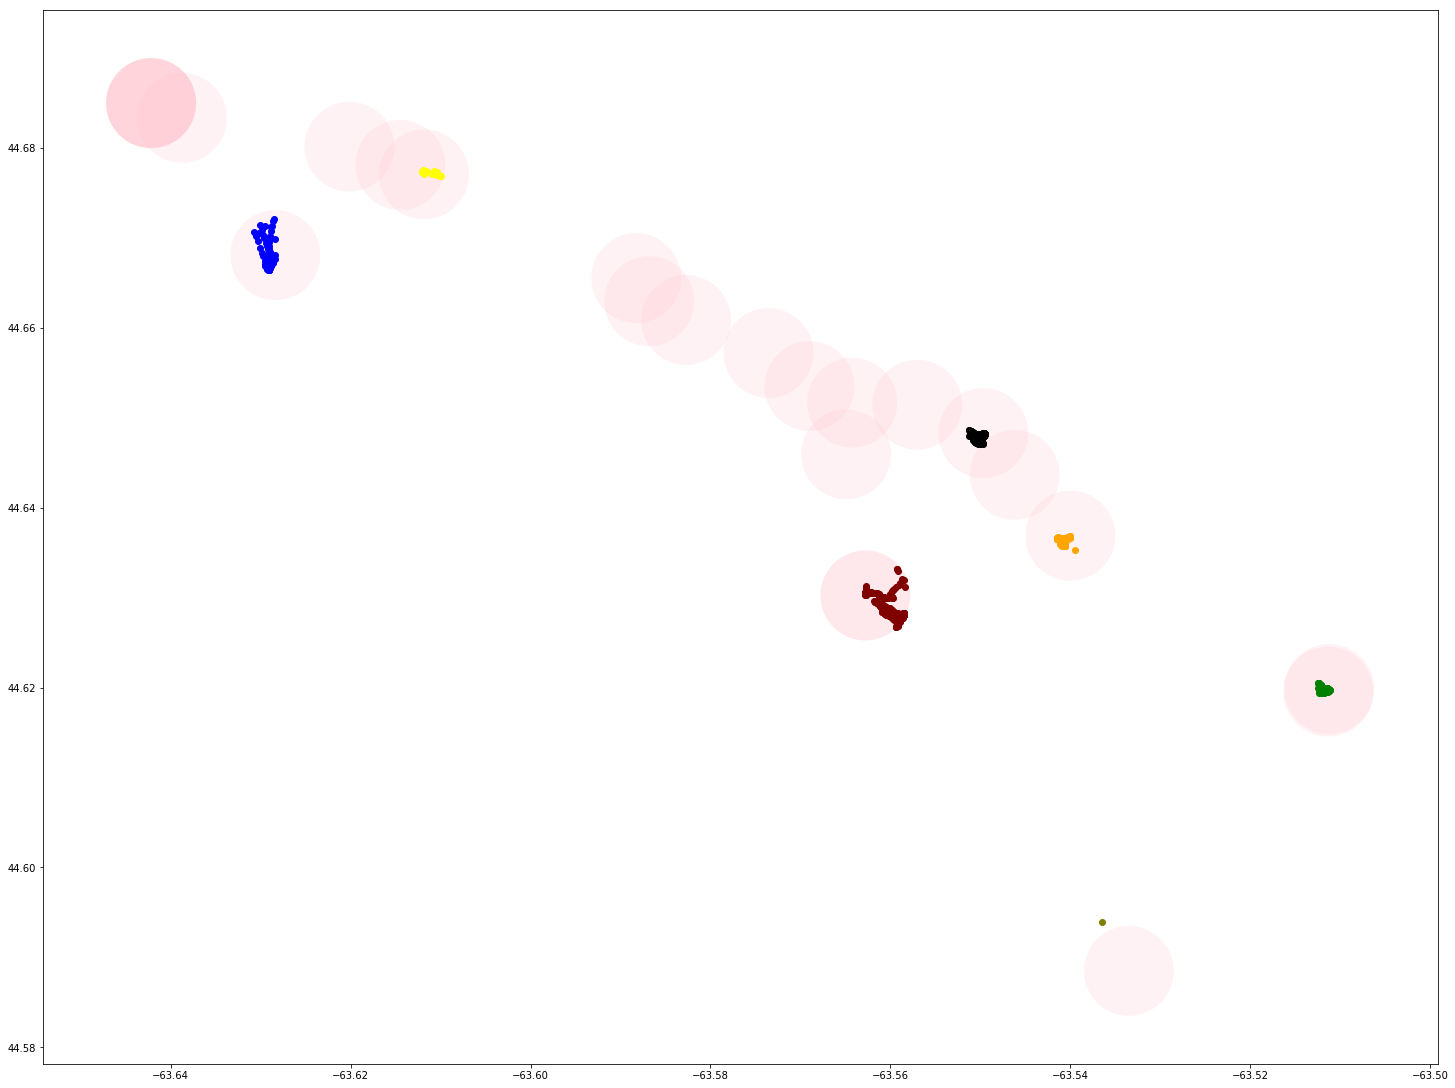

In [47]:
joinres=gpd.sjoin(gdf9,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_09_q2.png')

10th interval

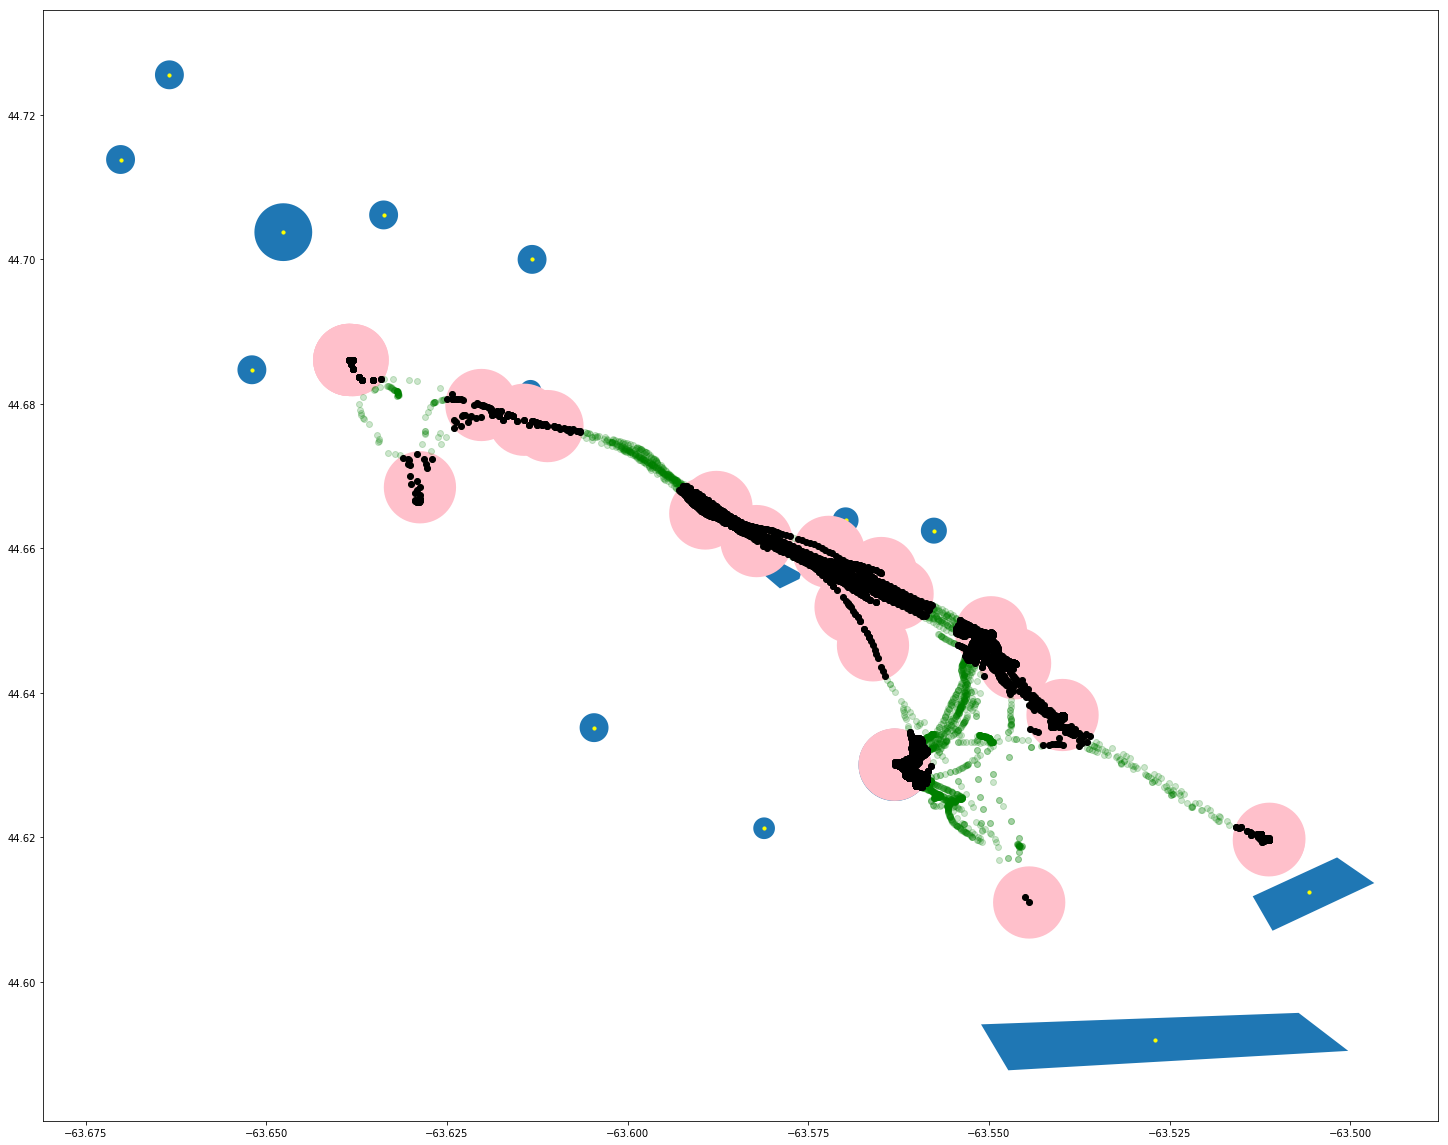

In [48]:
gdf10 = gpd.GeoDataFrame(d['df_h10'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h10']['location.coordinates.0'], d['df_h10']['location.coordinates.1'])])

p1=gdf10.loc[gdf10.distance(d1[0])==gdf10.distance(d1[0]).min(),:]
p2=gdf10.loc[gdf10.distance(d2[0])==gdf10.distance(d2[0]).min(),:]
p3=gdf10.loc[gdf10.distance(d3[0])==gdf10.distance(d3[0]).min(),:]
p4=gdf10.loc[gdf10.distance(d4[0])==gdf10.distance(d4[0]).min(),:]
p5=gdf10.loc[gdf10.distance(d5[0])==gdf10.distance(d5[0]).min(),:]
p6=gdf10.loc[gdf10.distance(d6[0])==gdf10.distance(d6[0]).min(),:]
p7=gdf10.loc[gdf10.distance(d7[0])==gdf10.distance(d7[0]).min(),:]
p8=gdf10.loc[gdf10.distance(d8[0])==gdf10.distance(d8[0]).min(),:]
p9=gdf10.loc[gdf10.distance(d9[0])==gdf10.distance(d9[0]).min(),:]
p10=gdf10.loc[gdf10.distance(d10[0])==gdf10.distance(d10[0]).min(),:]
p11=gdf10.loc[gdf10.distance(d11[0])==gdf10.distance(d11[0]).min(),:]
p12=gdf10.loc[gdf10.distance(d12[0])==gdf10.distance(d12[0]).min(),:]
p13=gdf10.loc[gdf10.distance(d13[0])==gdf10.distance(d13[0]).min(),:]
p14=gdf10.loc[gdf10.distance(d14[0])==gdf10.distance(d14[0]).min(),:]
p15=gdf10.loc[gdf10.distance(d15[0])==gdf10.distance(d15[0]).min(),:]
p16=gdf10.loc[gdf10.distance(d16[0])==gdf10.distance(d16[0]).min(),:]
p17=gdf10.loc[gdf10.distance(d17[0])==gdf10.distance(d17[0]).min(),:]
p18=gdf10.loc[gdf10.distance(d18[0])==gdf10.distance(d18[0]).min(),:]
p19=gdf10.loc[gdf10.distance(d19[0])==gdf10.distance(d19[0]).min(),:]
p20=gdf10.loc[gdf10.distance(d20[0])==gdf10.distance(d20[0]).min(),:]
p21=gdf10.loc[gdf10.distance(d21[0])==gdf10.distance(d21[0]).min(),:]
p22=gdf10.loc[gdf10.distance(d22[0])==gdf10.distance(d22[0]).min(),:]
p23=gdf10.loc[gdf10.distance(d23[0])==gdf10.distance(d23[0]).min(),:]
p24=gdf10.loc[gdf10.distance(d24[0])==gdf10.distance(d24[0]).min(),:]
p25=gdf10.loc[gdf10.distance(d25[0])==gdf10.distance(d25[0]).min(),:]
p26=gdf10.loc[gdf10.distance(d26[0])==gdf10.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf10.plot(ax=ax,color='g',alpha=0.2)
gdf10.loc[gdf10.within(p1),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p2),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p3),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p4),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p5),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p6),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p7),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p8),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p9),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p10),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p11),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p12),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p13),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p14),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p15),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p16),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p17),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p18),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p19),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p20),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p21),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p22),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p23),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p24),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p25),:].plot(ax=ax,color='k')
gdf10.loc[gdf10.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_10_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


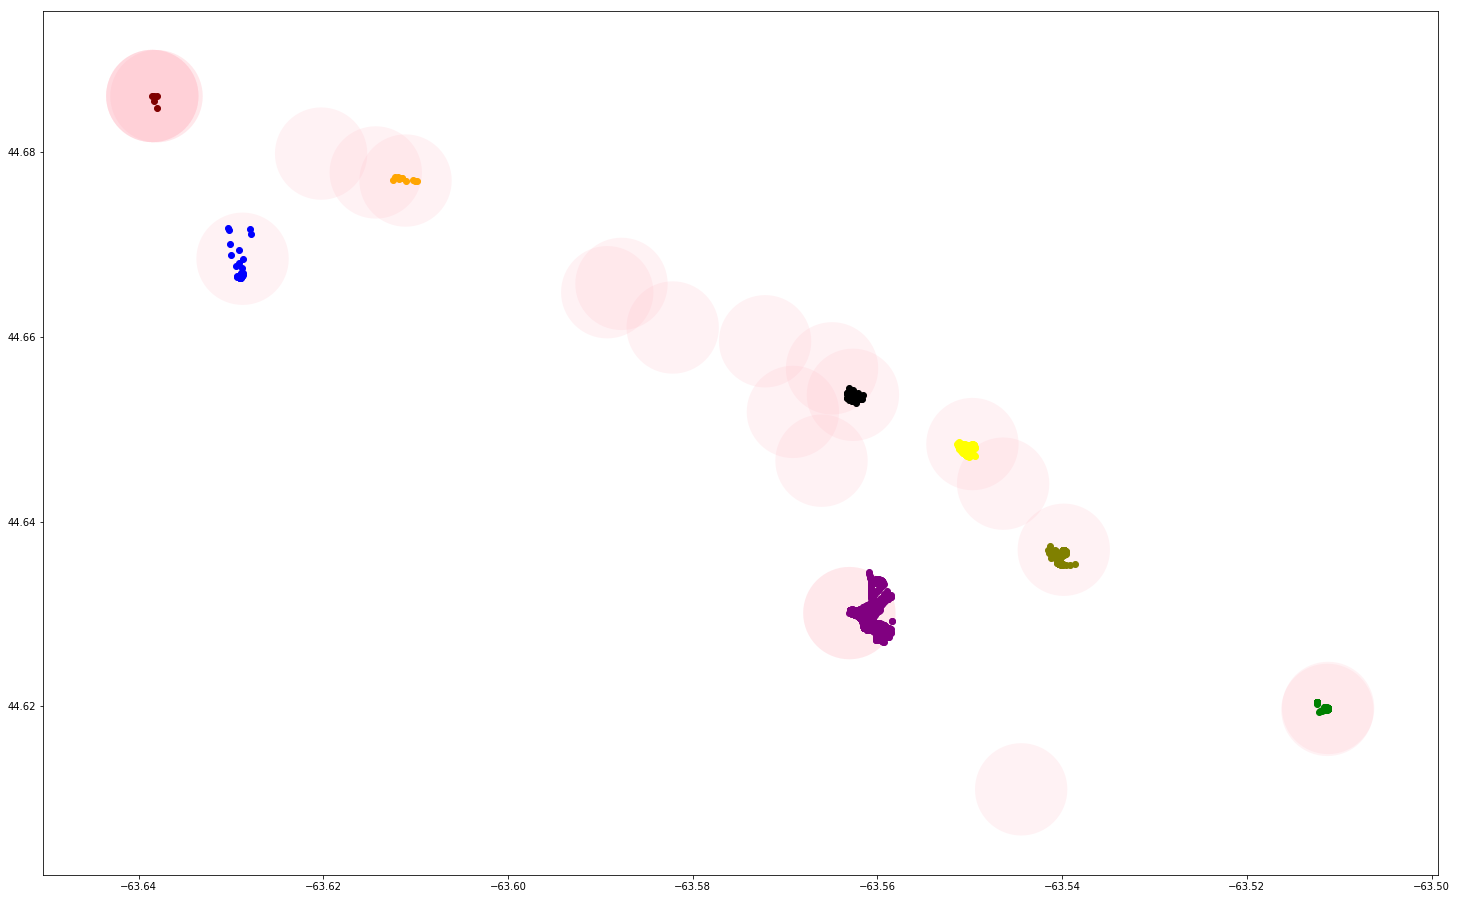

In [49]:
joinres=gpd.sjoin(gdf10,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_10_q2.png')

11th interval

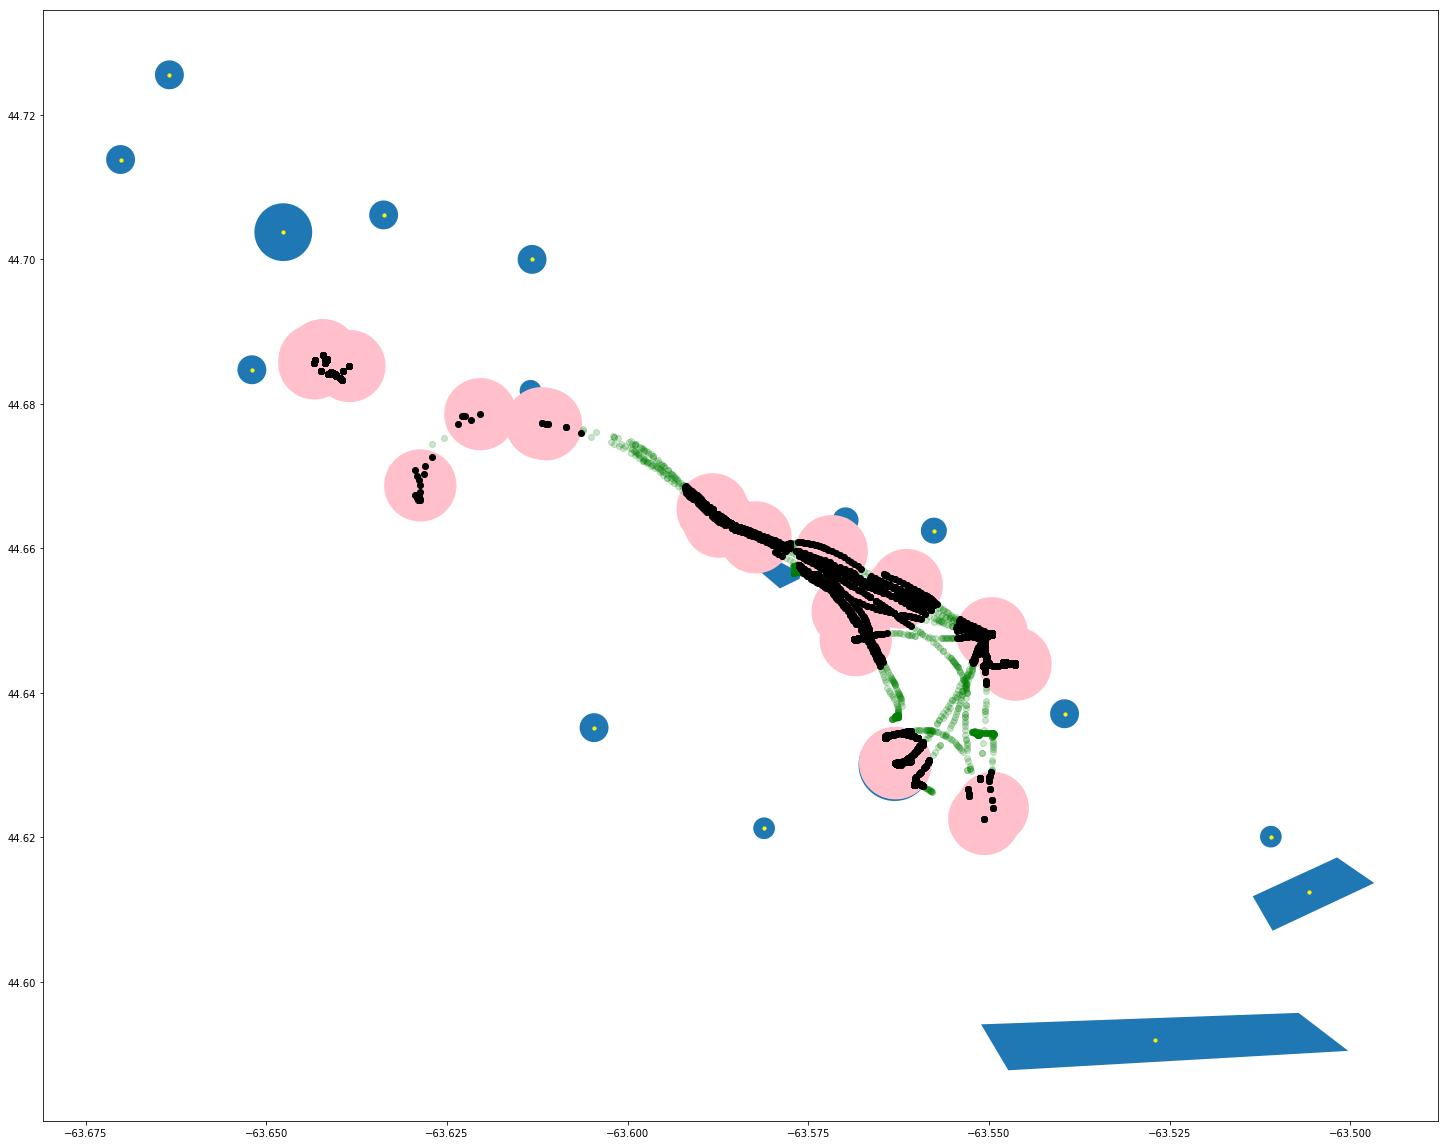

In [50]:
gdf11 = gpd.GeoDataFrame(d['df_h11'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h11']['location.coordinates.0'], d['df_h11']['location.coordinates.1'])])

p1=gdf11.loc[gdf11.distance(d1[0])==gdf11.distance(d1[0]).min(),:]
p2=gdf11.loc[gdf11.distance(d2[0])==gdf11.distance(d2[0]).min(),:]
p3=gdf11.loc[gdf11.distance(d3[0])==gdf11.distance(d3[0]).min(),:]
p4=gdf11.loc[gdf11.distance(d4[0])==gdf11.distance(d4[0]).min(),:]
p5=gdf11.loc[gdf11.distance(d5[0])==gdf11.distance(d5[0]).min(),:]
p6=gdf11.loc[gdf11.distance(d6[0])==gdf11.distance(d6[0]).min(),:]
p7=gdf11.loc[gdf11.distance(d7[0])==gdf11.distance(d7[0]).min(),:]
p8=gdf11.loc[gdf11.distance(d8[0])==gdf11.distance(d8[0]).min(),:]
p9=gdf11.loc[gdf11.distance(d9[0])==gdf11.distance(d9[0]).min(),:]
p10=gdf11.loc[gdf11.distance(d10[0])==gdf11.distance(d10[0]).min(),:]
p11=gdf11.loc[gdf11.distance(d11[0])==gdf11.distance(d11[0]).min(),:]
p12=gdf11.loc[gdf11.distance(d12[0])==gdf11.distance(d12[0]).min(),:]
p13=gdf11.loc[gdf11.distance(d13[0])==gdf11.distance(d13[0]).min(),:]
p14=gdf11.loc[gdf11.distance(d14[0])==gdf11.distance(d14[0]).min(),:]
p15=gdf11.loc[gdf11.distance(d15[0])==gdf11.distance(d15[0]).min(),:]
p16=gdf11.loc[gdf11.distance(d16[0])==gdf11.distance(d16[0]).min(),:]
p17=gdf11.loc[gdf11.distance(d17[0])==gdf11.distance(d17[0]).min(),:]
p18=gdf11.loc[gdf11.distance(d18[0])==gdf11.distance(d18[0]).min(),:]
p19=gdf11.loc[gdf11.distance(d19[0])==gdf11.distance(d19[0]).min(),:]
p20=gdf11.loc[gdf11.distance(d20[0])==gdf11.distance(d20[0]).min(),:]
p21=gdf11.loc[gdf11.distance(d21[0])==gdf11.distance(d21[0]).min(),:]
p22=gdf11.loc[gdf11.distance(d22[0])==gdf11.distance(d22[0]).min(),:]
p23=gdf11.loc[gdf11.distance(d23[0])==gdf11.distance(d23[0]).min(),:]
p24=gdf11.loc[gdf11.distance(d24[0])==gdf11.distance(d24[0]).min(),:]
p25=gdf11.loc[gdf11.distance(d25[0])==gdf11.distance(d25[0]).min(),:]
p26=gdf11.loc[gdf11.distance(d26[0])==gdf11.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf11.plot(ax=ax,color='g',alpha=0.2)
gdf11.loc[gdf11.within(p1),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p2),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p3),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p4),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p5),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p6),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p7),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p8),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p9),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p10),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p11),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p12),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p13),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p14),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p15),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p16),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p17),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p18),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p19),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p20),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p21),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p22),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p23),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p24),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p25),:].plot(ax=ax,color='k')
gdf11.loc[gdf11.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_11_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


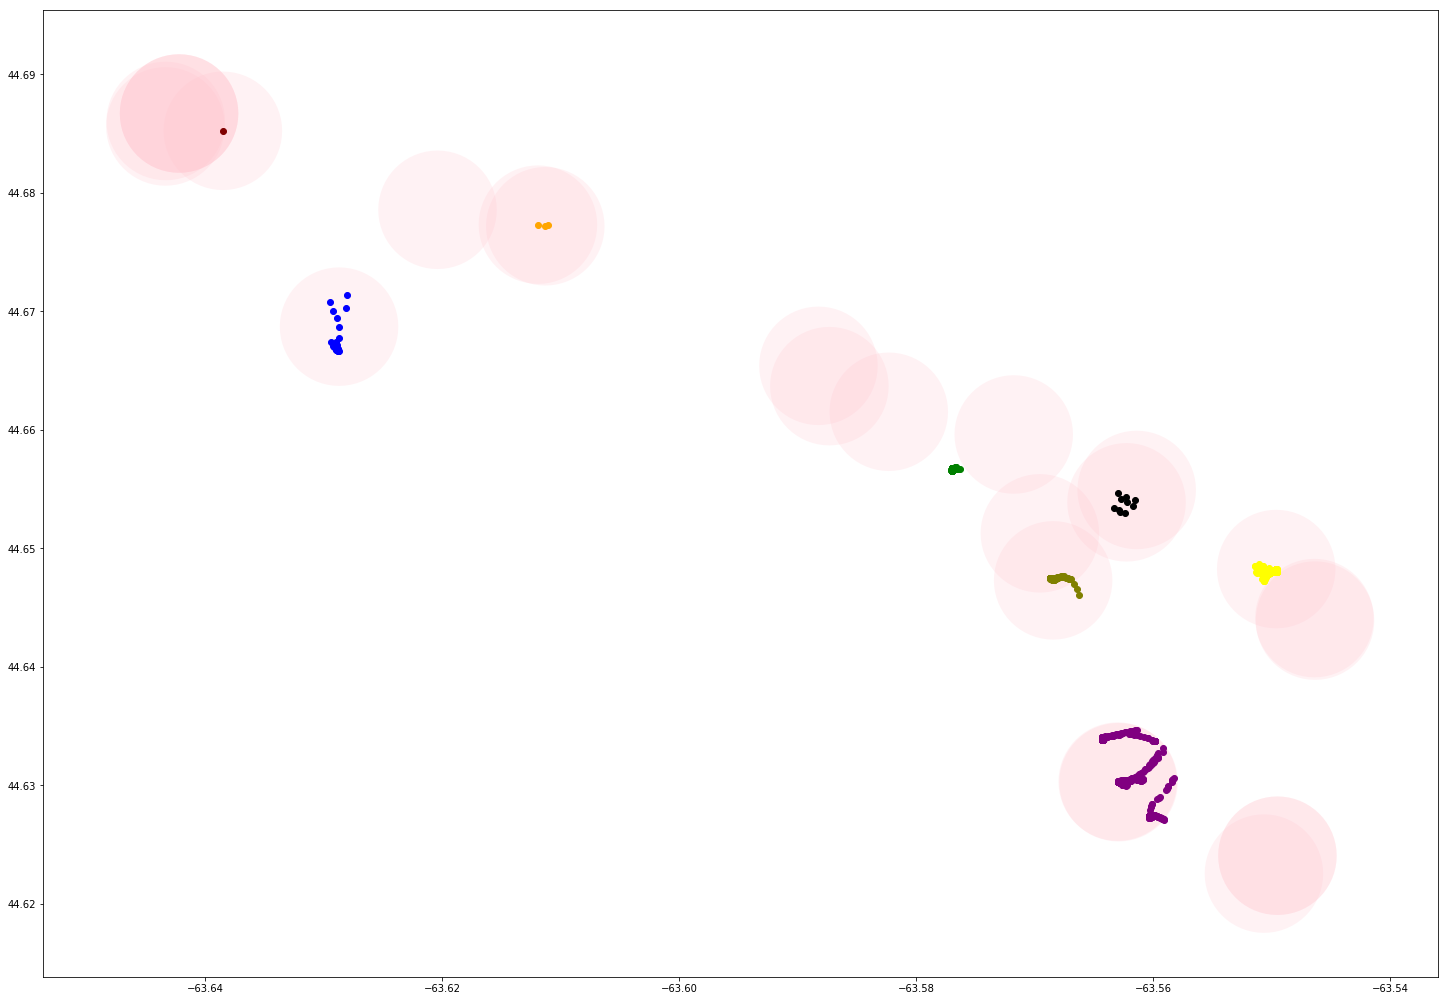

In [51]:
joinres=gpd.sjoin(gdf11,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_11_q2.png')

12th interval

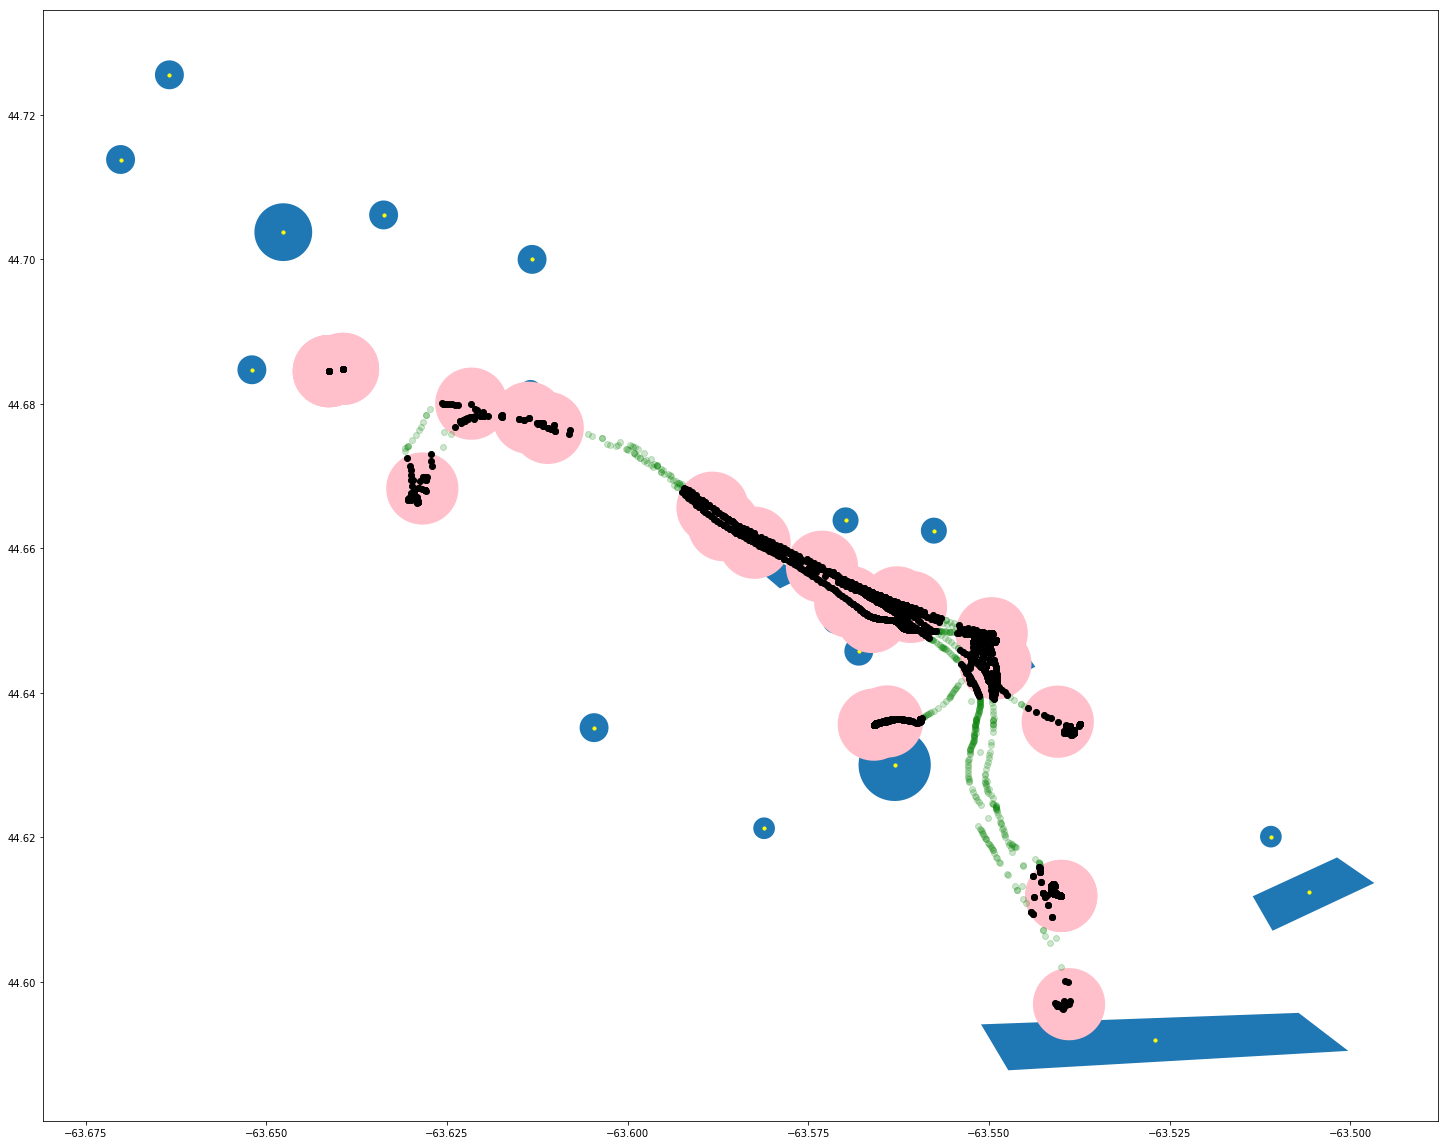

In [52]:
gdf12 = gpd.GeoDataFrame(d['df_h12'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h12']['location.coordinates.0'], d['df_h12']['location.coordinates.1'])])

p1=gdf12.loc[gdf12.distance(d1[0])==gdf12.distance(d1[0]).min(),:]
p2=gdf12.loc[gdf12.distance(d2[0])==gdf12.distance(d2[0]).min(),:]
p3=gdf12.loc[gdf12.distance(d3[0])==gdf12.distance(d3[0]).min(),:]
p4=gdf12.loc[gdf12.distance(d4[0])==gdf12.distance(d4[0]).min(),:]
p5=gdf12.loc[gdf12.distance(d5[0])==gdf12.distance(d5[0]).min(),:]
p6=gdf12.loc[gdf12.distance(d6[0])==gdf12.distance(d6[0]).min(),:]
p7=gdf12.loc[gdf12.distance(d7[0])==gdf12.distance(d7[0]).min(),:]
p8=gdf12.loc[gdf12.distance(d8[0])==gdf12.distance(d8[0]).min(),:]
p9=gdf12.loc[gdf12.distance(d9[0])==gdf12.distance(d9[0]).min(),:]
p10=gdf12.loc[gdf12.distance(d10[0])==gdf12.distance(d10[0]).min(),:]
p11=gdf12.loc[gdf12.distance(d11[0])==gdf12.distance(d11[0]).min(),:]
p12=gdf12.loc[gdf12.distance(d12[0])==gdf12.distance(d12[0]).min(),:]
p13=gdf12.loc[gdf12.distance(d13[0])==gdf12.distance(d13[0]).min(),:]
p14=gdf12.loc[gdf12.distance(d14[0])==gdf12.distance(d14[0]).min(),:]
p15=gdf12.loc[gdf12.distance(d15[0])==gdf12.distance(d15[0]).min(),:]
p16=gdf12.loc[gdf12.distance(d16[0])==gdf12.distance(d16[0]).min(),:]
p17=gdf12.loc[gdf12.distance(d17[0])==gdf12.distance(d17[0]).min(),:]
p18=gdf12.loc[gdf12.distance(d18[0])==gdf12.distance(d18[0]).min(),:]
p19=gdf12.loc[gdf12.distance(d19[0])==gdf12.distance(d19[0]).min(),:]
p20=gdf12.loc[gdf12.distance(d20[0])==gdf12.distance(d20[0]).min(),:]
p21=gdf12.loc[gdf12.distance(d21[0])==gdf12.distance(d21[0]).min(),:]
p22=gdf12.loc[gdf12.distance(d22[0])==gdf12.distance(d22[0]).min(),:]
p23=gdf12.loc[gdf12.distance(d23[0])==gdf12.distance(d23[0]).min(),:]
p24=gdf12.loc[gdf12.distance(d24[0])==gdf12.distance(d24[0]).min(),:]
p25=gdf12.loc[gdf12.distance(d25[0])==gdf12.distance(d25[0]).min(),:]
p26=gdf12.loc[gdf12.distance(d26[0])==gdf12.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf12.plot(ax=ax,color='g',alpha=0.2)
gdf12.loc[gdf12.within(p1),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p2),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p3),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p4),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p5),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p6),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p7),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p8),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p9),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p10),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p11),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p12),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p13),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p14),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p15),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p16),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p17),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p18),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p19),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p20),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p21),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p22),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p23),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p24),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p25),:].plot(ax=ax,color='k')
gdf12.loc[gdf12.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_12_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


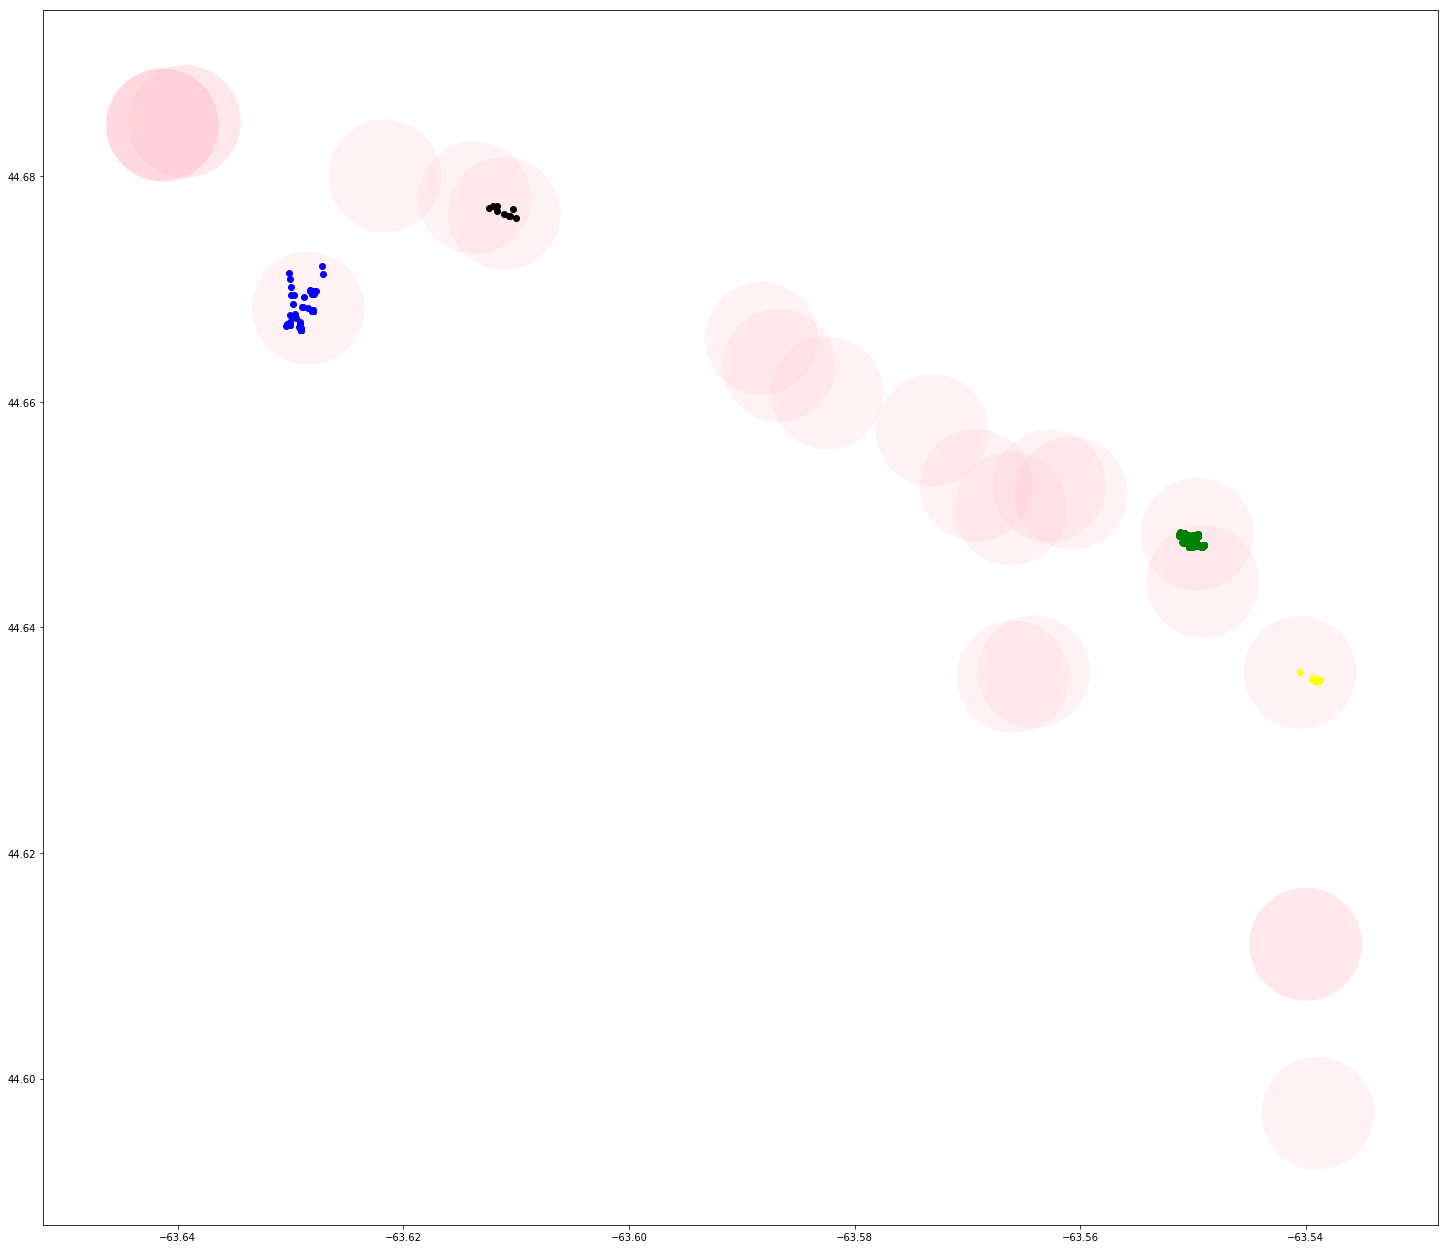

In [53]:
joinres=gpd.sjoin(gdf12,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_12_q2.png')

13th interval

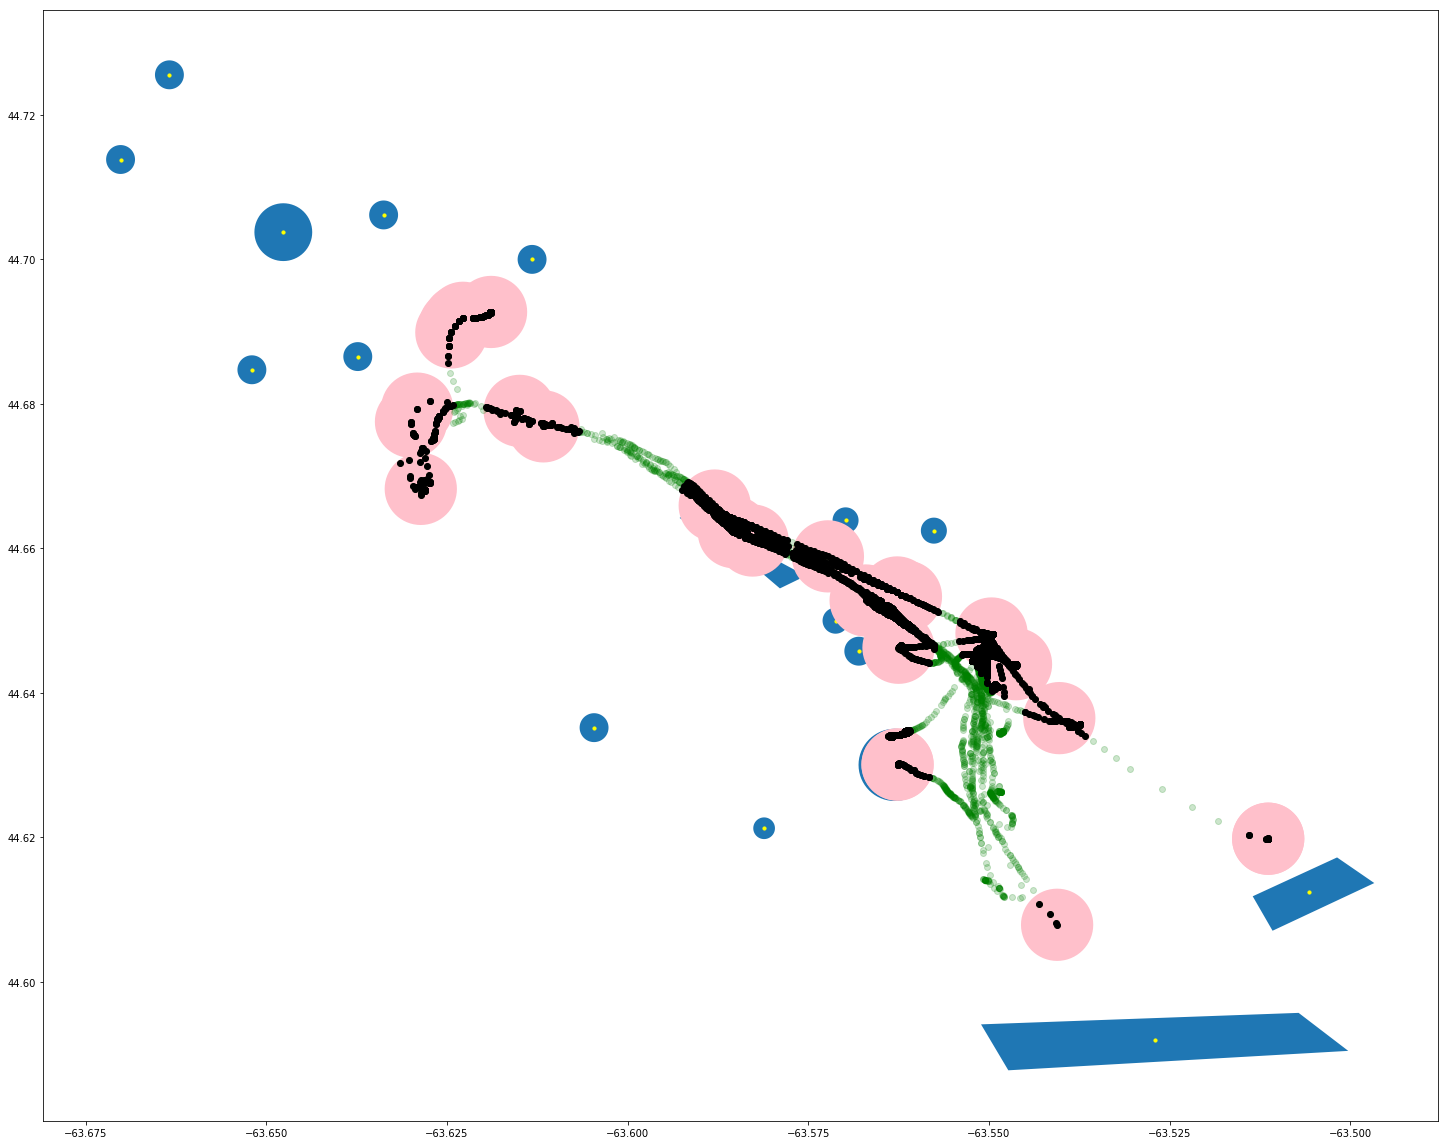

In [54]:
gdf13 = gpd.GeoDataFrame(d['df_h13'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h13']['location.coordinates.0'], d['df_h13']['location.coordinates.1'])])

p1=gdf13.loc[gdf13.distance(d1[0])==gdf13.distance(d1[0]).min(),:]
p2=gdf13.loc[gdf13.distance(d2[0])==gdf13.distance(d2[0]).min(),:]
p3=gdf13.loc[gdf13.distance(d3[0])==gdf13.distance(d3[0]).min(),:]
p4=gdf13.loc[gdf13.distance(d4[0])==gdf13.distance(d4[0]).min(),:]
p5=gdf13.loc[gdf13.distance(d5[0])==gdf13.distance(d5[0]).min(),:]
p6=gdf13.loc[gdf13.distance(d6[0])==gdf13.distance(d6[0]).min(),:]
p7=gdf13.loc[gdf13.distance(d7[0])==gdf13.distance(d7[0]).min(),:]
p8=gdf13.loc[gdf13.distance(d8[0])==gdf13.distance(d8[0]).min(),:]
p9=gdf13.loc[gdf13.distance(d9[0])==gdf13.distance(d9[0]).min(),:]
p10=gdf13.loc[gdf13.distance(d10[0])==gdf13.distance(d10[0]).min(),:]
p11=gdf13.loc[gdf13.distance(d11[0])==gdf13.distance(d11[0]).min(),:]
p12=gdf13.loc[gdf13.distance(d12[0])==gdf13.distance(d12[0]).min(),:]
p13=gdf13.loc[gdf13.distance(d13[0])==gdf13.distance(d13[0]).min(),:]
p14=gdf13.loc[gdf13.distance(d14[0])==gdf13.distance(d14[0]).min(),:]
p15=gdf13.loc[gdf13.distance(d15[0])==gdf13.distance(d15[0]).min(),:]
p16=gdf13.loc[gdf13.distance(d16[0])==gdf13.distance(d16[0]).min(),:]
p17=gdf13.loc[gdf13.distance(d17[0])==gdf13.distance(d17[0]).min(),:]
p18=gdf13.loc[gdf13.distance(d18[0])==gdf13.distance(d18[0]).min(),:]
p19=gdf13.loc[gdf13.distance(d19[0])==gdf13.distance(d19[0]).min(),:]
p20=gdf13.loc[gdf13.distance(d20[0])==gdf13.distance(d20[0]).min(),:]
p21=gdf13.loc[gdf13.distance(d21[0])==gdf13.distance(d21[0]).min(),:]
p22=gdf13.loc[gdf13.distance(d22[0])==gdf13.distance(d22[0]).min(),:]
p23=gdf13.loc[gdf13.distance(d23[0])==gdf13.distance(d23[0]).min(),:]
p24=gdf13.loc[gdf13.distance(d24[0])==gdf13.distance(d24[0]).min(),:]
p25=gdf13.loc[gdf13.distance(d25[0])==gdf13.distance(d25[0]).min(),:]
p26=gdf13.loc[gdf13.distance(d26[0])==gdf13.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf13.plot(ax=ax,color='g',alpha=0.2)
gdf13.loc[gdf13.within(p1),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p2),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p3),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p4),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p5),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p6),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p7),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p8),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p9),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p10),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p11),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p12),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p13),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p14),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p15),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p16),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p17),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p18),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p19),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p20),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p21),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p22),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p23),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p24),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p25),:].plot(ax=ax,color='k')
gdf13.loc[gdf13.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_13_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


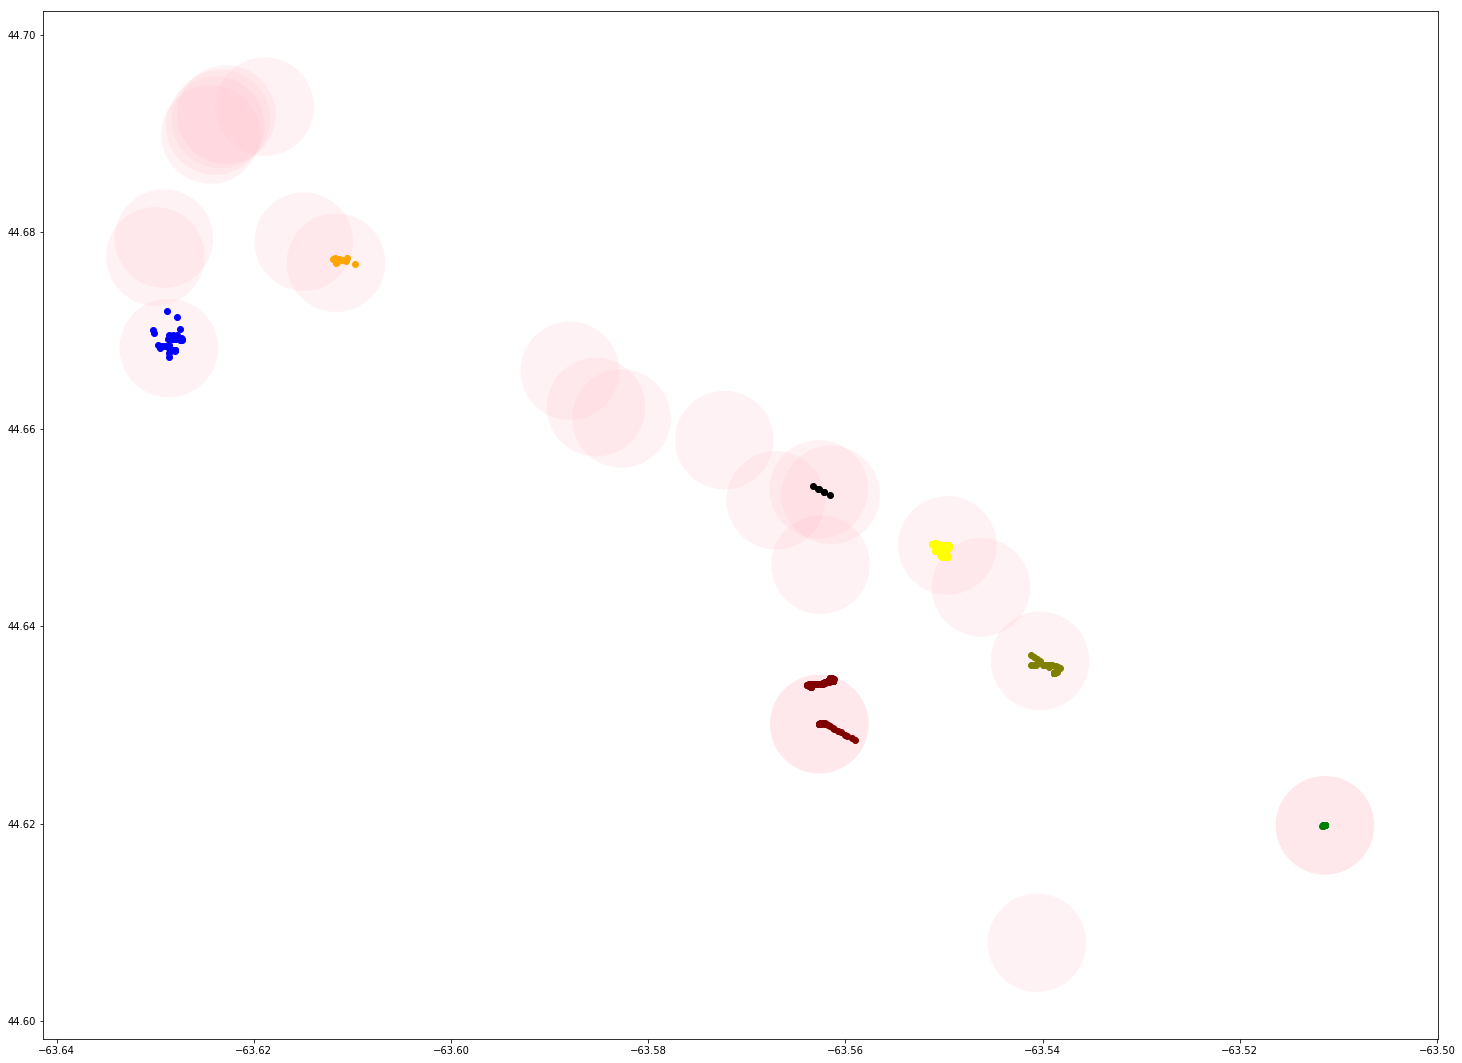

In [55]:
joinres=gpd.sjoin(gdf13,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_13_q2.png')

14th interval

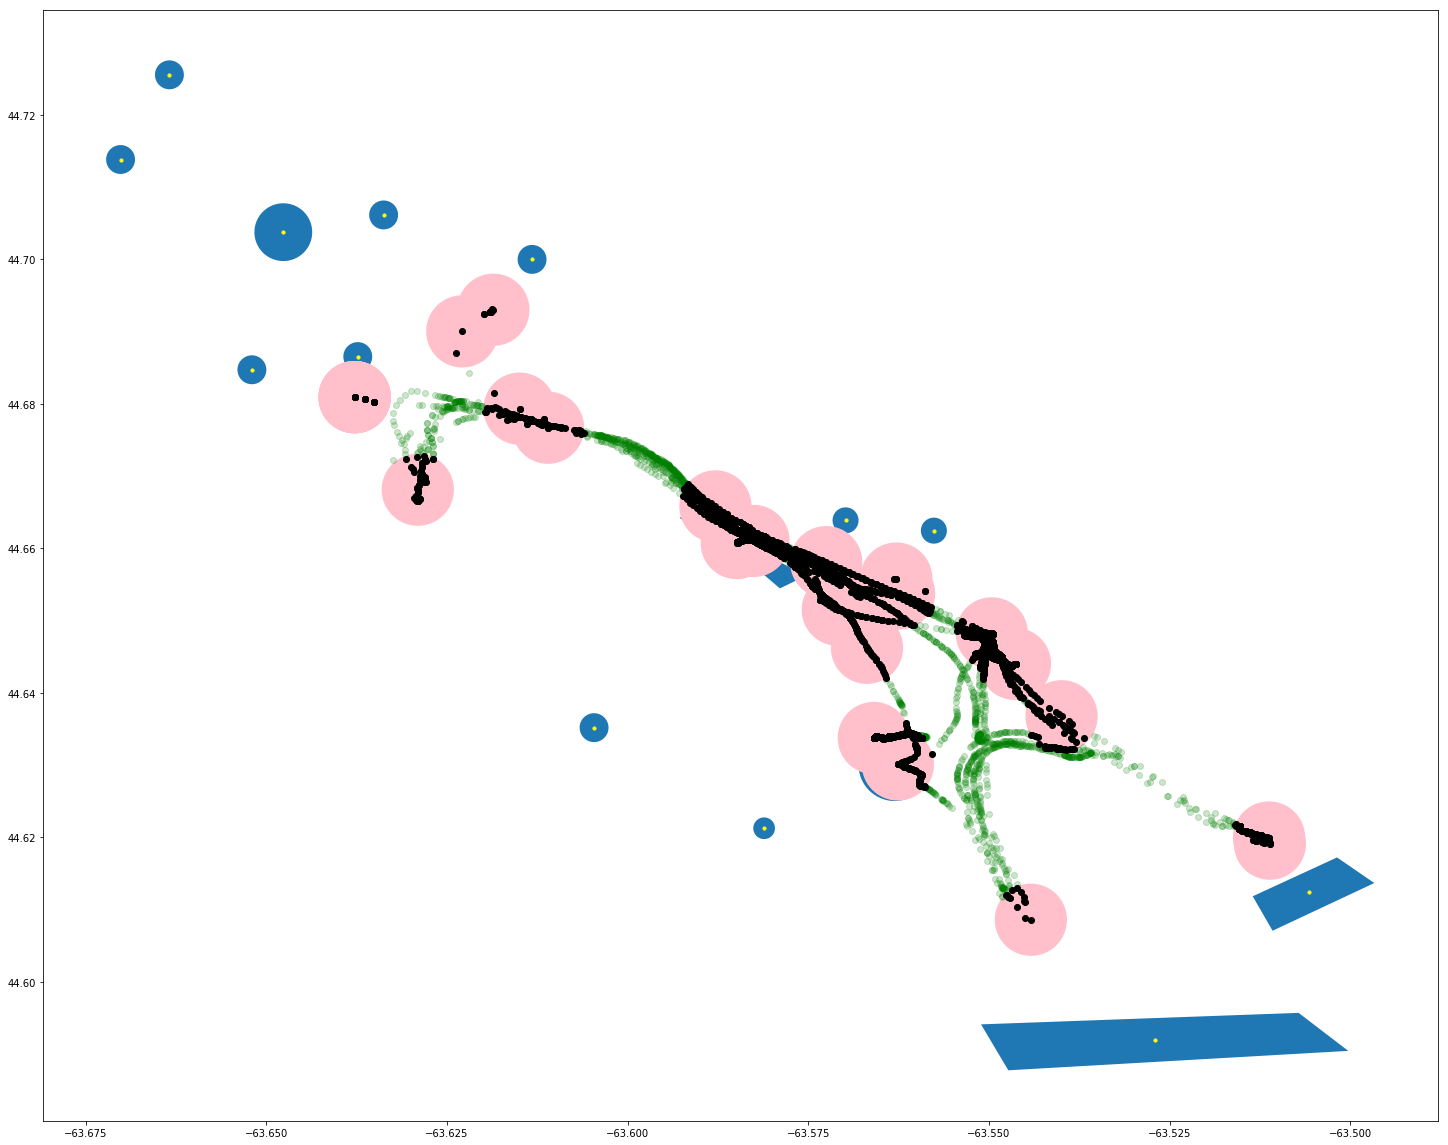

In [56]:
gdf14 = gpd.GeoDataFrame(d['df_h14'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h14']['location.coordinates.0'], d['df_h14']['location.coordinates.1'])])

p1=gdf14.loc[gdf14.distance(d1[0])==gdf14.distance(d1[0]).min(),:]
p2=gdf14.loc[gdf14.distance(d2[0])==gdf14.distance(d2[0]).min(),:]
p3=gdf14.loc[gdf14.distance(d3[0])==gdf14.distance(d3[0]).min(),:]
p4=gdf14.loc[gdf14.distance(d4[0])==gdf14.distance(d4[0]).min(),:]
p5=gdf14.loc[gdf14.distance(d5[0])==gdf14.distance(d5[0]).min(),:]
p6=gdf14.loc[gdf14.distance(d6[0])==gdf14.distance(d6[0]).min(),:]
p7=gdf14.loc[gdf14.distance(d7[0])==gdf14.distance(d7[0]).min(),:]
p8=gdf14.loc[gdf14.distance(d8[0])==gdf14.distance(d8[0]).min(),:]
p9=gdf14.loc[gdf14.distance(d9[0])==gdf14.distance(d9[0]).min(),:]
p10=gdf14.loc[gdf14.distance(d10[0])==gdf14.distance(d10[0]).min(),:]
p11=gdf14.loc[gdf14.distance(d11[0])==gdf14.distance(d11[0]).min(),:]
p12=gdf14.loc[gdf14.distance(d12[0])==gdf14.distance(d12[0]).min(),:]
p13=gdf14.loc[gdf14.distance(d13[0])==gdf14.distance(d13[0]).min(),:]
p14=gdf14.loc[gdf14.distance(d14[0])==gdf14.distance(d14[0]).min(),:]
p15=gdf14.loc[gdf14.distance(d15[0])==gdf14.distance(d15[0]).min(),:]
p16=gdf14.loc[gdf14.distance(d16[0])==gdf14.distance(d16[0]).min(),:]
p17=gdf14.loc[gdf14.distance(d17[0])==gdf14.distance(d17[0]).min(),:]
p18=gdf14.loc[gdf14.distance(d18[0])==gdf14.distance(d18[0]).min(),:]
p19=gdf14.loc[gdf14.distance(d19[0])==gdf14.distance(d19[0]).min(),:]
p20=gdf14.loc[gdf14.distance(d20[0])==gdf14.distance(d20[0]).min(),:]
p21=gdf14.loc[gdf14.distance(d21[0])==gdf14.distance(d21[0]).min(),:]
p22=gdf14.loc[gdf14.distance(d22[0])==gdf14.distance(d22[0]).min(),:]
p23=gdf14.loc[gdf14.distance(d23[0])==gdf14.distance(d23[0]).min(),:]
p24=gdf14.loc[gdf14.distance(d24[0])==gdf14.distance(d24[0]).min(),:]
p25=gdf14.loc[gdf14.distance(d25[0])==gdf14.distance(d25[0]).min(),:]
p26=gdf14.loc[gdf14.distance(d26[0])==gdf14.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf14.plot(ax=ax,color='g',alpha=0.2)
gdf14.loc[gdf14.within(p1),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p2),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p3),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p4),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p5),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p6),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p7),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p8),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p9),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p10),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p11),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p12),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p13),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p14),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p15),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p16),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p17),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p18),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p19),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p20),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p21),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p22),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p23),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p24),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p25),:].plot(ax=ax,color='k')
gdf14.loc[gdf14.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_14_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


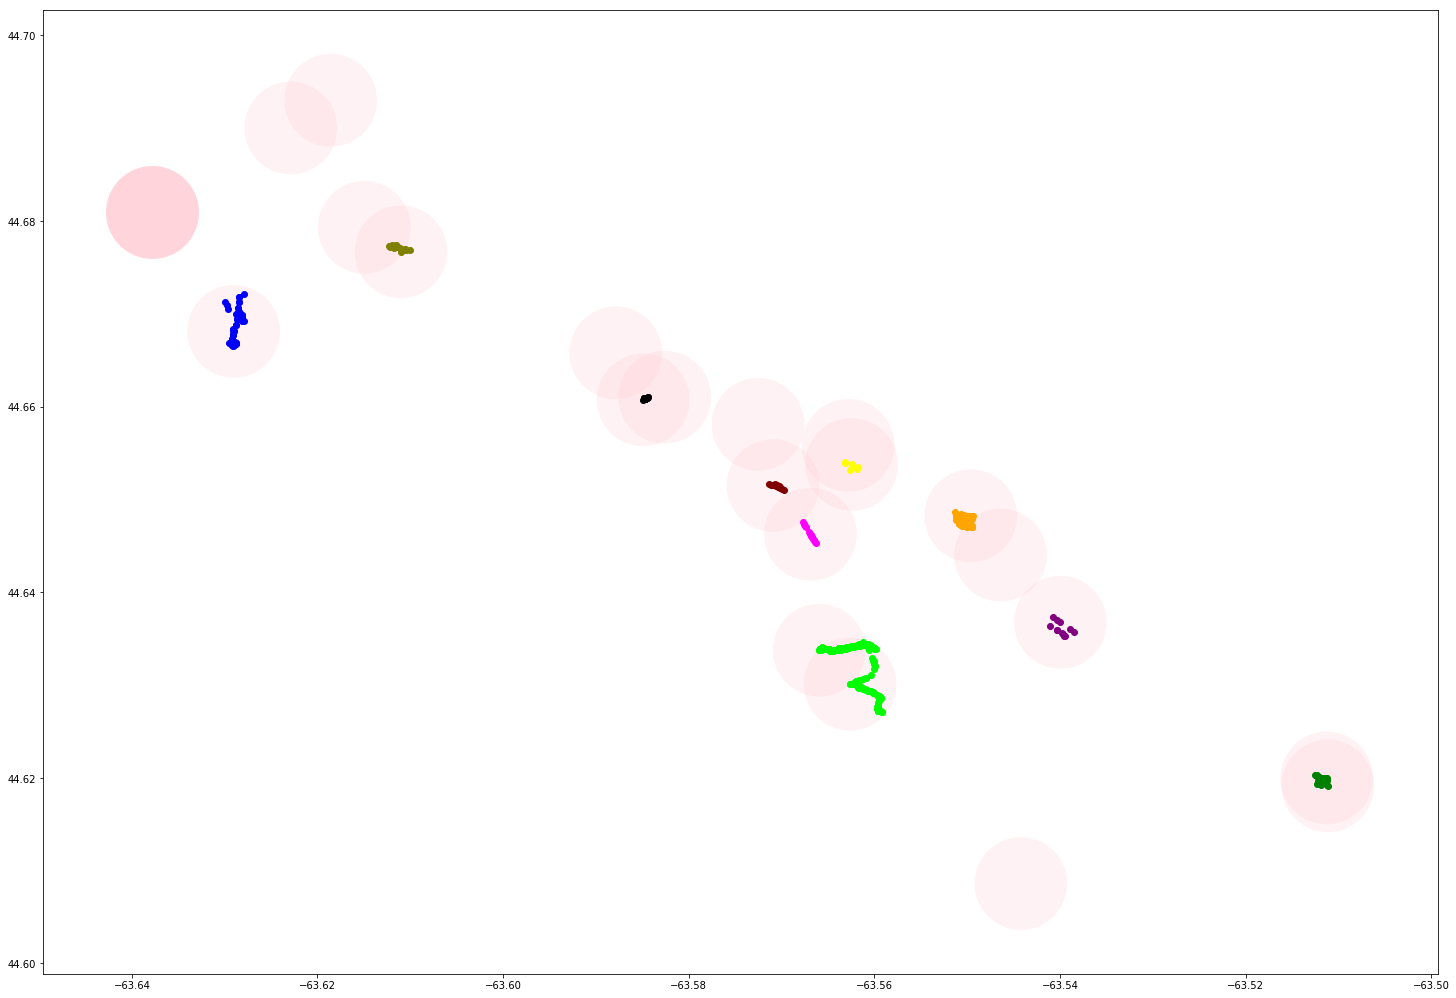

In [57]:
joinres=gpd.sjoin(gdf14,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_14_q2.png')

15th interval

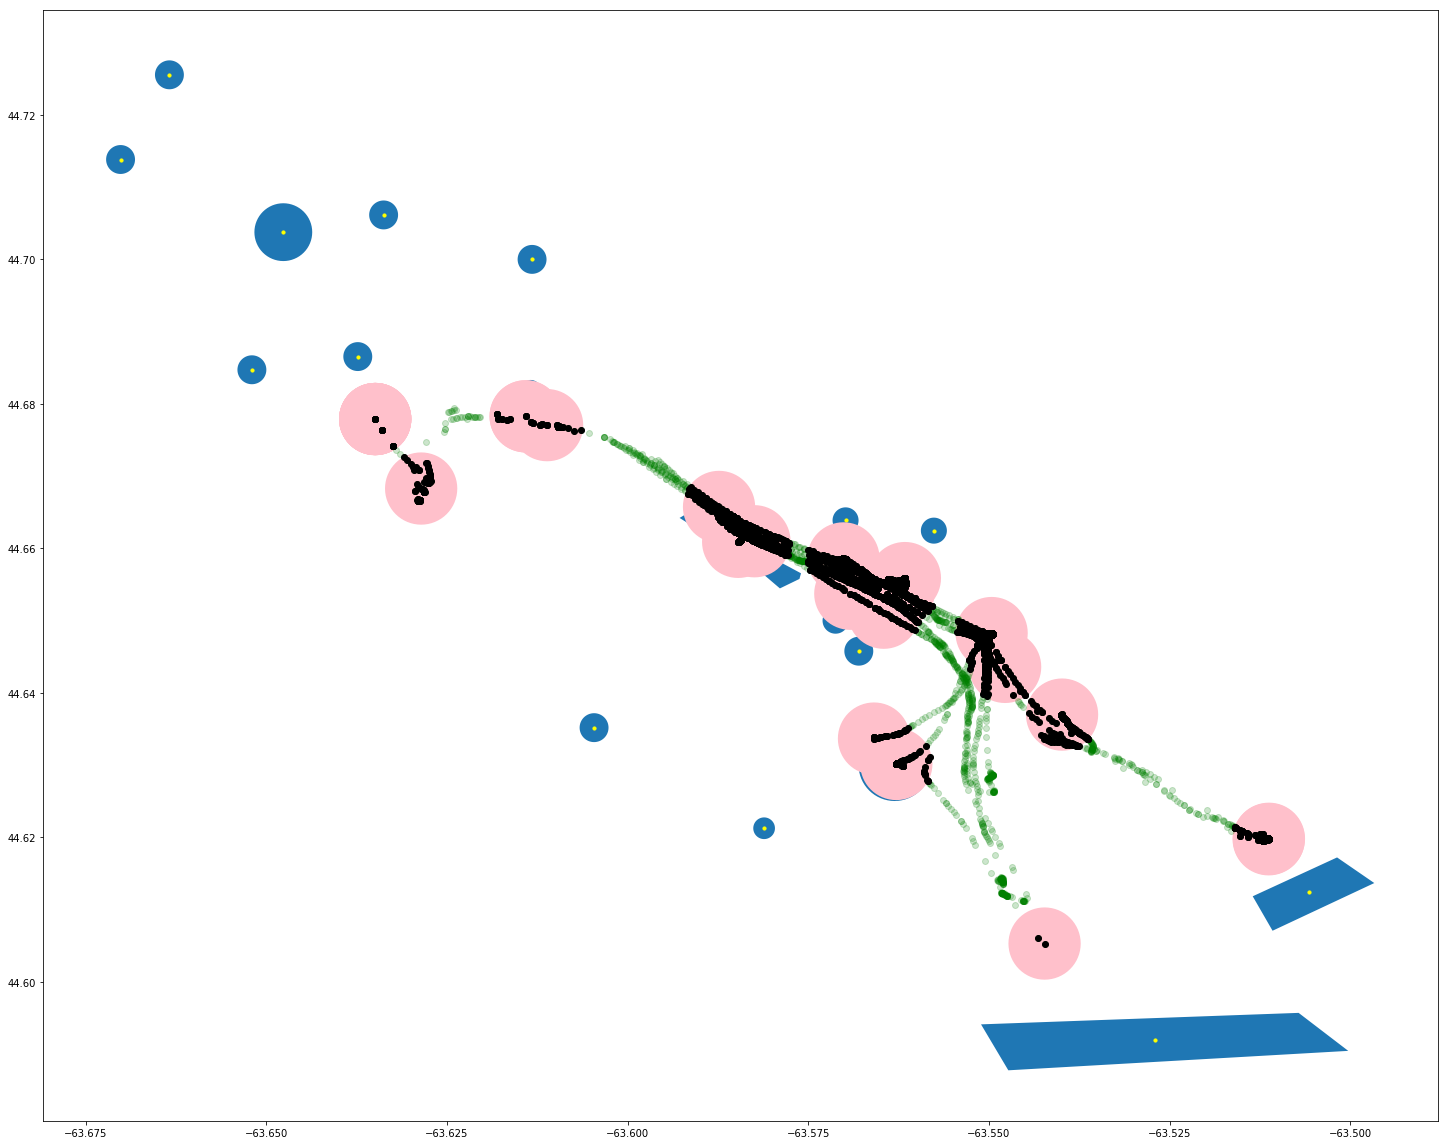

In [59]:
gdf15 = gpd.GeoDataFrame(d['df_h15'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h15']['location.coordinates.0'], d['df_h15']['location.coordinates.1'])])

p1=gdf15.loc[gdf15.distance(d1[0])==gdf15.distance(d1[0]).min(),:]
p2=gdf15.loc[gdf15.distance(d2[0])==gdf15.distance(d2[0]).min(),:]
p3=gdf15.loc[gdf15.distance(d3[0])==gdf15.distance(d3[0]).min(),:]
p4=gdf15.loc[gdf15.distance(d4[0])==gdf15.distance(d4[0]).min(),:]
p5=gdf15.loc[gdf15.distance(d5[0])==gdf15.distance(d5[0]).min(),:]
p6=gdf15.loc[gdf15.distance(d6[0])==gdf15.distance(d6[0]).min(),:]
p7=gdf15.loc[gdf15.distance(d7[0])==gdf15.distance(d7[0]).min(),:]
p8=gdf15.loc[gdf15.distance(d8[0])==gdf15.distance(d8[0]).min(),:]
p9=gdf15.loc[gdf15.distance(d9[0])==gdf15.distance(d9[0]).min(),:]
p10=gdf15.loc[gdf15.distance(d10[0])==gdf15.distance(d10[0]).min(),:]
p11=gdf15.loc[gdf15.distance(d11[0])==gdf15.distance(d11[0]).min(),:]
p12=gdf15.loc[gdf15.distance(d12[0])==gdf15.distance(d12[0]).min(),:]
p13=gdf15.loc[gdf15.distance(d13[0])==gdf15.distance(d13[0]).min(),:]
p14=gdf15.loc[gdf15.distance(d14[0])==gdf15.distance(d14[0]).min(),:]
p15=gdf15.loc[gdf15.distance(d15[0])==gdf15.distance(d15[0]).min(),:]
p16=gdf15.loc[gdf15.distance(d16[0])==gdf15.distance(d16[0]).min(),:]
p17=gdf15.loc[gdf15.distance(d17[0])==gdf15.distance(d17[0]).min(),:]
p18=gdf15.loc[gdf15.distance(d18[0])==gdf15.distance(d18[0]).min(),:]
p19=gdf15.loc[gdf15.distance(d19[0])==gdf15.distance(d19[0]).min(),:]
p20=gdf15.loc[gdf15.distance(d20[0])==gdf15.distance(d20[0]).min(),:]
p21=gdf15.loc[gdf15.distance(d21[0])==gdf15.distance(d21[0]).min(),:]
p22=gdf15.loc[gdf15.distance(d22[0])==gdf15.distance(d22[0]).min(),:]
p23=gdf15.loc[gdf15.distance(d23[0])==gdf15.distance(d23[0]).min(),:]
p24=gdf15.loc[gdf15.distance(d24[0])==gdf15.distance(d24[0]).min(),:]
p25=gdf15.loc[gdf15.distance(d25[0])==gdf15.distance(d25[0]).min(),:]
p26=gdf15.loc[gdf15.distance(d26[0])==gdf15.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf15.plot(ax=ax,color='g',alpha=0.2)
gdf15.loc[gdf15.within(p1),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p2),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p3),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p4),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p5),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p6),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p7),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p8),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p9),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p10),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p11),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p12),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p13),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p14),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p15),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p16),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p17),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p18),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p19),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p20),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p21),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p22),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p23),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p24),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p25),:].plot(ax=ax,color='k')
gdf15.loc[gdf15.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_15_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


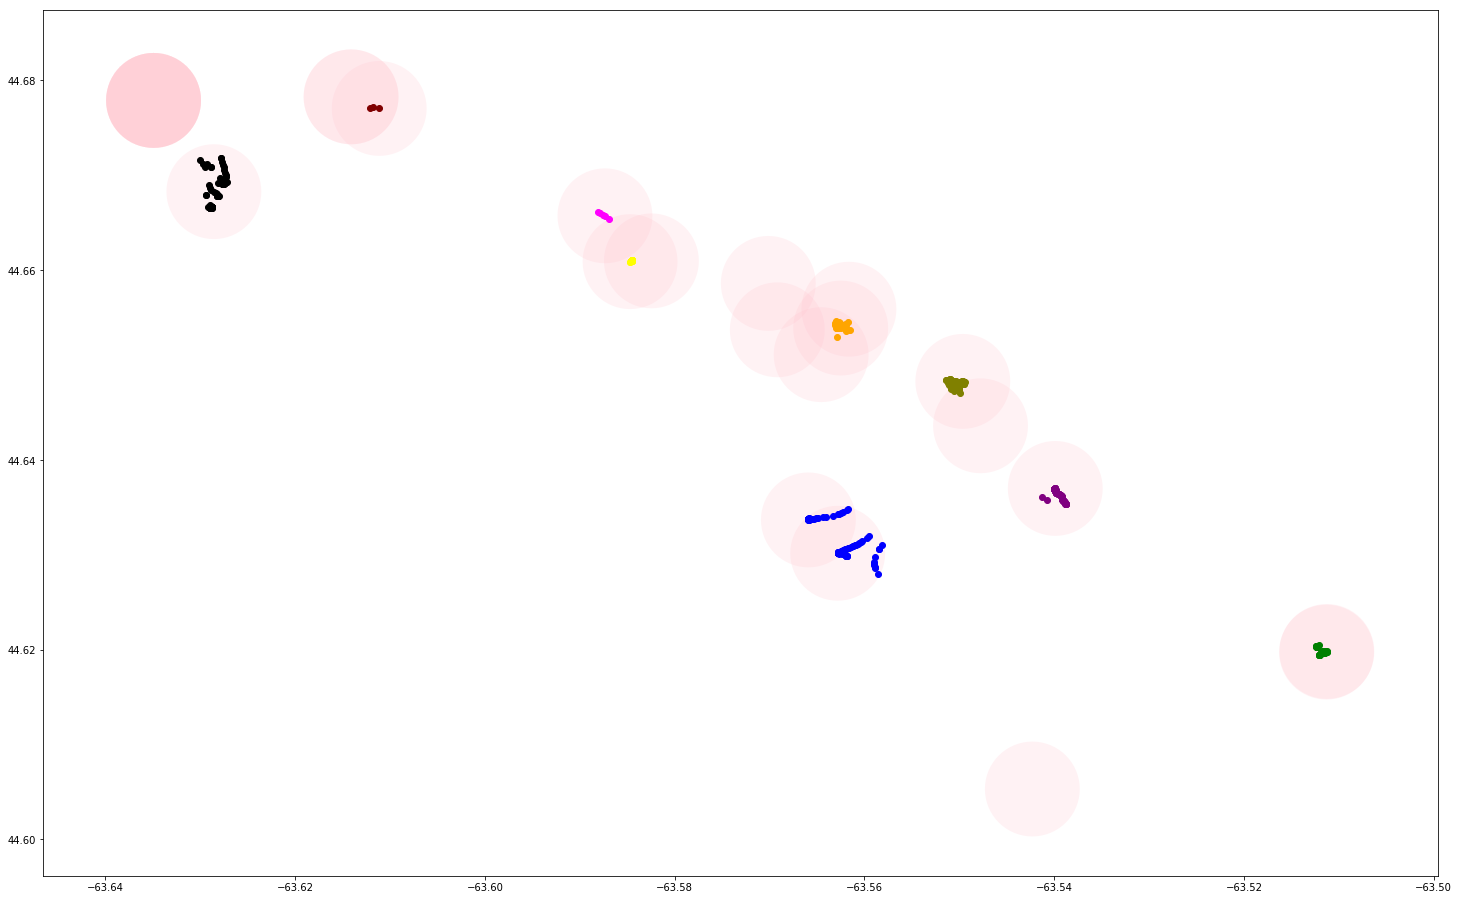

In [60]:
joinres=gpd.sjoin(gdf15,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_15_q2.png')

16th interval

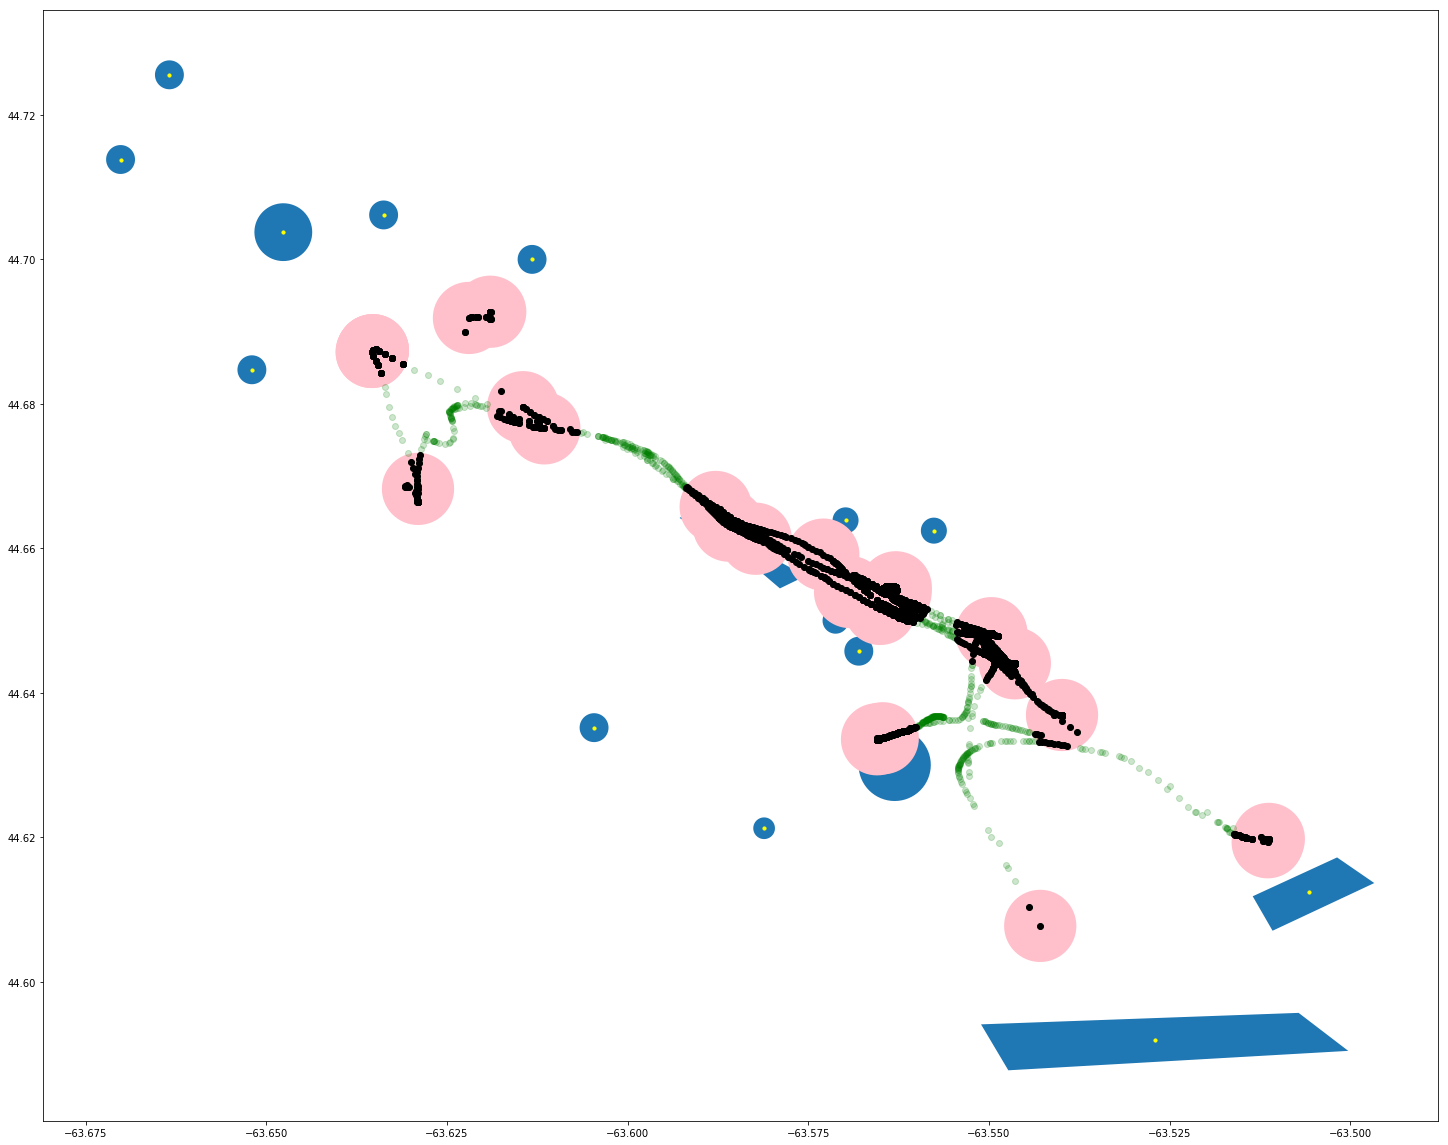

In [61]:
gdf16 = gpd.GeoDataFrame(d['df_h16'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h16']['location.coordinates.0'], d['df_h16']['location.coordinates.1'])])

p1=gdf16.loc[gdf16.distance(d1[0])==gdf16.distance(d1[0]).min(),:]
p2=gdf16.loc[gdf16.distance(d2[0])==gdf16.distance(d2[0]).min(),:]
p3=gdf16.loc[gdf16.distance(d3[0])==gdf16.distance(d3[0]).min(),:]
p4=gdf16.loc[gdf16.distance(d4[0])==gdf16.distance(d4[0]).min(),:]
p5=gdf16.loc[gdf16.distance(d5[0])==gdf16.distance(d5[0]).min(),:]
p6=gdf16.loc[gdf16.distance(d6[0])==gdf16.distance(d6[0]).min(),:]
p7=gdf16.loc[gdf16.distance(d7[0])==gdf16.distance(d7[0]).min(),:]
p8=gdf16.loc[gdf16.distance(d8[0])==gdf16.distance(d8[0]).min(),:]
p9=gdf16.loc[gdf16.distance(d9[0])==gdf16.distance(d9[0]).min(),:]
p10=gdf16.loc[gdf16.distance(d10[0])==gdf16.distance(d10[0]).min(),:]
p11=gdf16.loc[gdf16.distance(d11[0])==gdf16.distance(d11[0]).min(),:]
p12=gdf16.loc[gdf16.distance(d12[0])==gdf16.distance(d12[0]).min(),:]
p13=gdf16.loc[gdf16.distance(d13[0])==gdf16.distance(d13[0]).min(),:]
p14=gdf16.loc[gdf16.distance(d14[0])==gdf16.distance(d14[0]).min(),:]
p15=gdf16.loc[gdf16.distance(d15[0])==gdf16.distance(d15[0]).min(),:]
p16=gdf16.loc[gdf16.distance(d16[0])==gdf16.distance(d16[0]).min(),:]
p17=gdf16.loc[gdf16.distance(d17[0])==gdf16.distance(d17[0]).min(),:]
p18=gdf16.loc[gdf16.distance(d18[0])==gdf16.distance(d18[0]).min(),:]
p19=gdf16.loc[gdf16.distance(d19[0])==gdf16.distance(d19[0]).min(),:]
p20=gdf16.loc[gdf16.distance(d20[0])==gdf16.distance(d20[0]).min(),:]
p21=gdf16.loc[gdf16.distance(d21[0])==gdf16.distance(d21[0]).min(),:]
p22=gdf16.loc[gdf16.distance(d22[0])==gdf16.distance(d22[0]).min(),:]
p23=gdf16.loc[gdf16.distance(d23[0])==gdf16.distance(d23[0]).min(),:]
p24=gdf16.loc[gdf16.distance(d24[0])==gdf16.distance(d24[0]).min(),:]
p25=gdf16.loc[gdf16.distance(d25[0])==gdf16.distance(d25[0]).min(),:]
p26=gdf16.loc[gdf16.distance(d26[0])==gdf16.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf16.plot(ax=ax,color='g',alpha=0.2)
gdf16.loc[gdf16.within(p1),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p2),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p3),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p4),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p5),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p6),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p7),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p8),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p9),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p10),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p11),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p12),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p13),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p14),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p15),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p16),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p17),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p18),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p19),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p20),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p21),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p22),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p23),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p24),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p25),:].plot(ax=ax,color='k')
gdf16.loc[gdf16.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_16_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


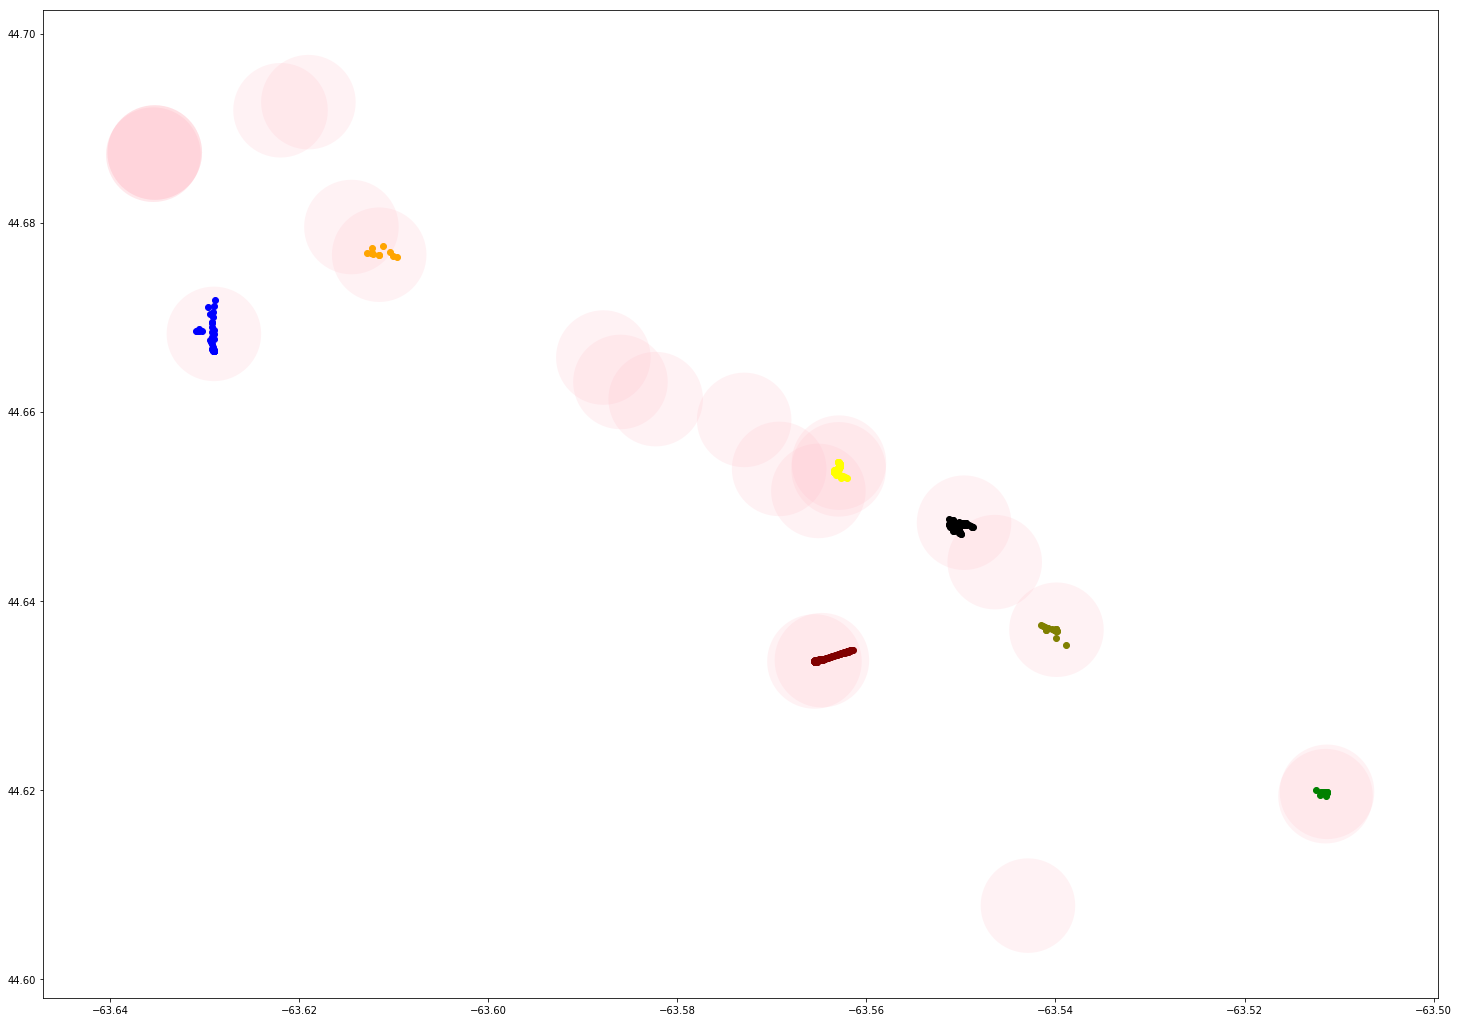

In [62]:
joinres=gpd.sjoin(gdf16,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_16_q2.png')

17th interval

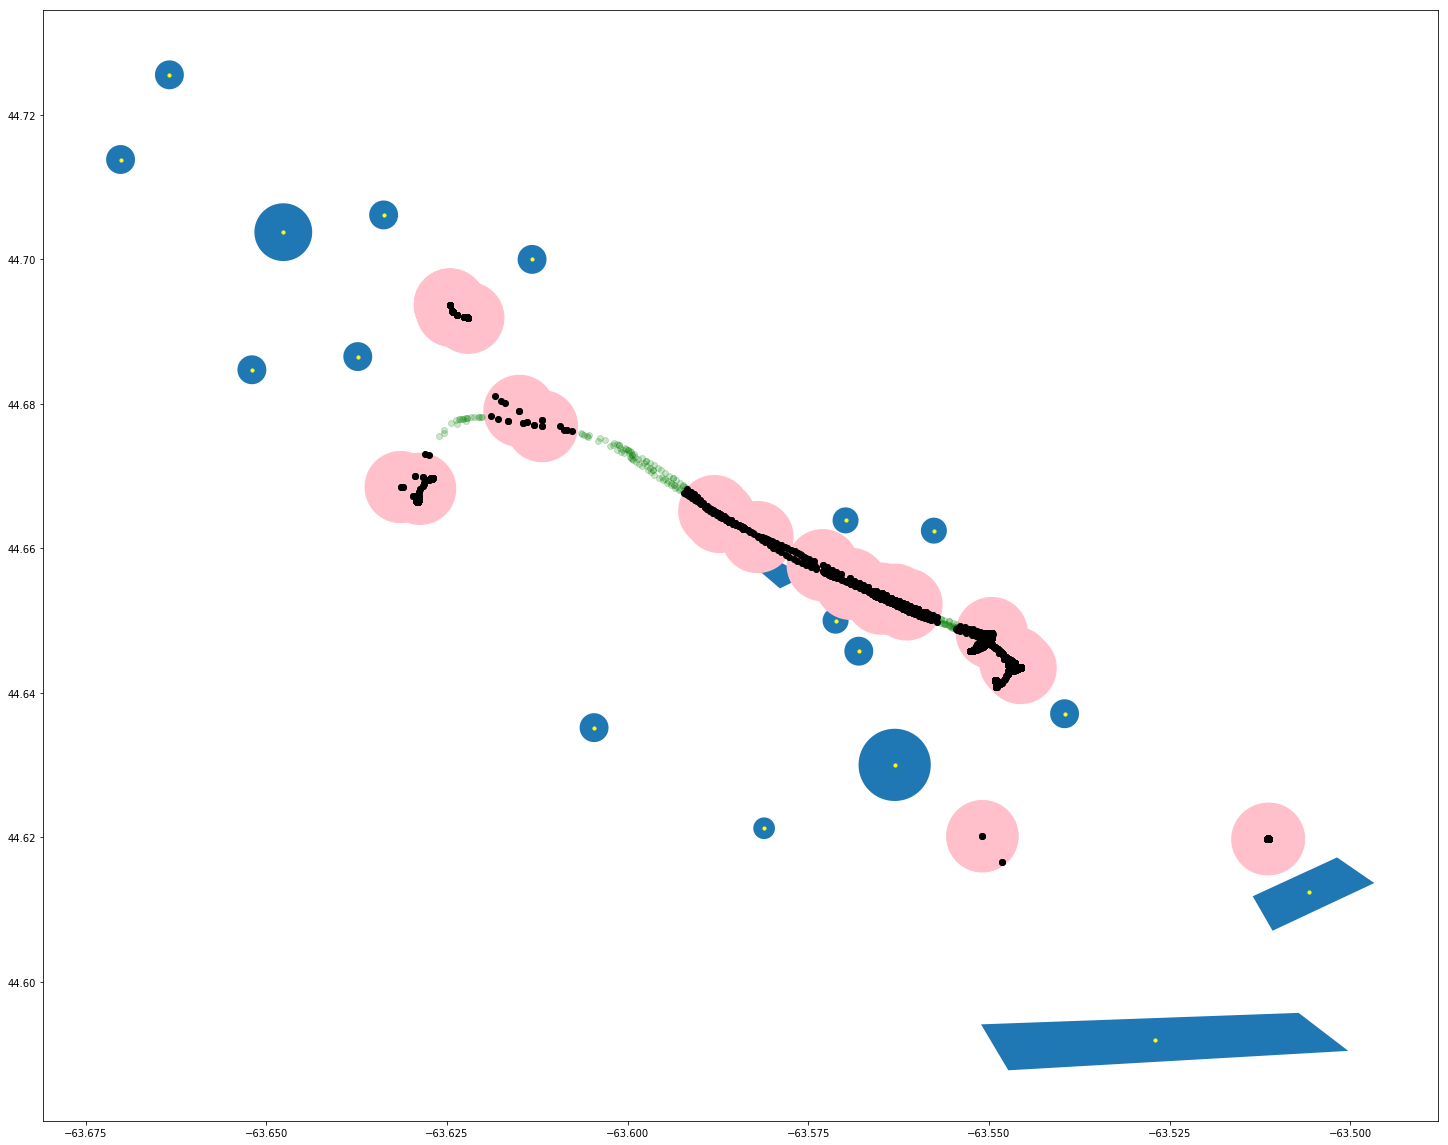

In [63]:
gdf17 = gpd.GeoDataFrame(d['df_h17'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h17']['location.coordinates.0'], d['df_h17']['location.coordinates.1'])])

p1=gdf17.loc[gdf17.distance(d1[0])==gdf17.distance(d1[0]).min(),:]
p2=gdf17.loc[gdf17.distance(d2[0])==gdf17.distance(d2[0]).min(),:]
p3=gdf17.loc[gdf17.distance(d3[0])==gdf17.distance(d3[0]).min(),:]
p4=gdf17.loc[gdf17.distance(d4[0])==gdf17.distance(d4[0]).min(),:]
p5=gdf17.loc[gdf17.distance(d5[0])==gdf17.distance(d5[0]).min(),:]
p6=gdf17.loc[gdf17.distance(d6[0])==gdf17.distance(d6[0]).min(),:]
p7=gdf17.loc[gdf17.distance(d7[0])==gdf17.distance(d7[0]).min(),:]
p8=gdf17.loc[gdf17.distance(d8[0])==gdf17.distance(d8[0]).min(),:]
p9=gdf17.loc[gdf17.distance(d9[0])==gdf17.distance(d9[0]).min(),:]
p10=gdf17.loc[gdf17.distance(d10[0])==gdf17.distance(d10[0]).min(),:]
p11=gdf17.loc[gdf17.distance(d11[0])==gdf17.distance(d11[0]).min(),:]
p12=gdf17.loc[gdf17.distance(d12[0])==gdf17.distance(d12[0]).min(),:]
p13=gdf17.loc[gdf17.distance(d13[0])==gdf17.distance(d13[0]).min(),:]
p14=gdf17.loc[gdf17.distance(d14[0])==gdf17.distance(d14[0]).min(),:]
p15=gdf17.loc[gdf17.distance(d15[0])==gdf17.distance(d15[0]).min(),:]
p16=gdf17.loc[gdf17.distance(d16[0])==gdf17.distance(d16[0]).min(),:]
p17=gdf17.loc[gdf17.distance(d17[0])==gdf17.distance(d17[0]).min(),:]
p18=gdf17.loc[gdf17.distance(d18[0])==gdf17.distance(d18[0]).min(),:]
p19=gdf17.loc[gdf17.distance(d19[0])==gdf17.distance(d19[0]).min(),:]
p20=gdf17.loc[gdf17.distance(d20[0])==gdf17.distance(d20[0]).min(),:]
p21=gdf17.loc[gdf17.distance(d21[0])==gdf17.distance(d21[0]).min(),:]
p22=gdf17.loc[gdf17.distance(d22[0])==gdf17.distance(d22[0]).min(),:]
p23=gdf17.loc[gdf17.distance(d23[0])==gdf17.distance(d23[0]).min(),:]
p24=gdf17.loc[gdf17.distance(d24[0])==gdf17.distance(d24[0]).min(),:]
p25=gdf17.loc[gdf17.distance(d25[0])==gdf17.distance(d25[0]).min(),:]
p26=gdf17.loc[gdf17.distance(d26[0])==gdf17.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf17.plot(ax=ax,color='g',alpha=0.2)
gdf17.loc[gdf17.within(p1),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p2),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p3),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p4),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p5),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p6),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p7),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p8),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p9),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p10),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p11),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p12),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p13),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p14),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p15),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p16),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p17),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p18),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p19),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p20),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p21),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p22),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p23),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p24),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p25),:].plot(ax=ax,color='k')
gdf17.loc[gdf17.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_17_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


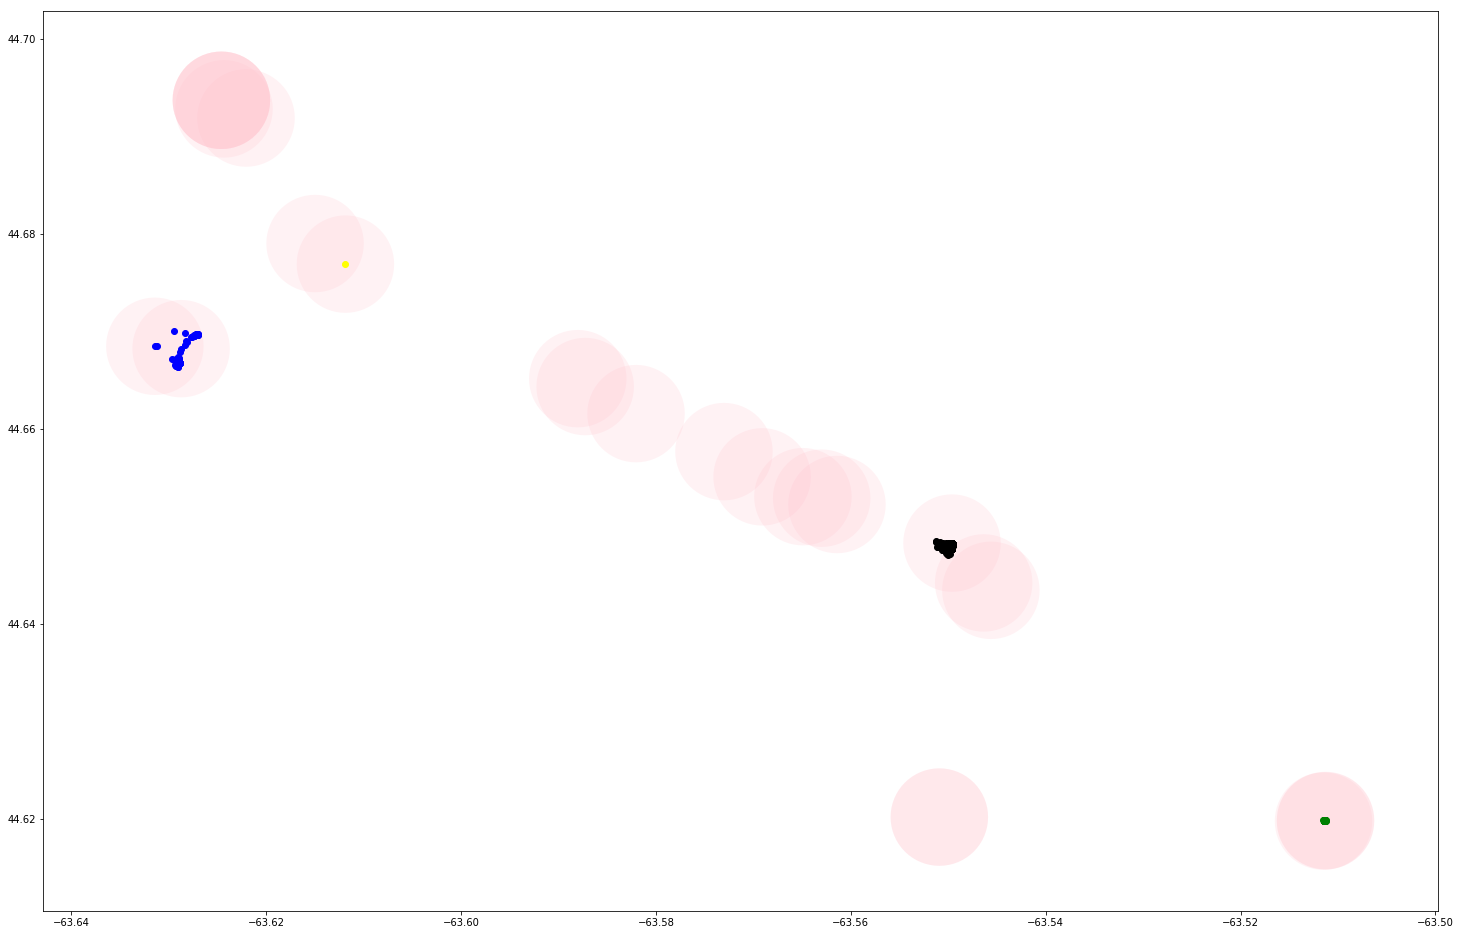

In [64]:
joinres=gpd.sjoin(gdf17,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_17_q2.png')

18th interval

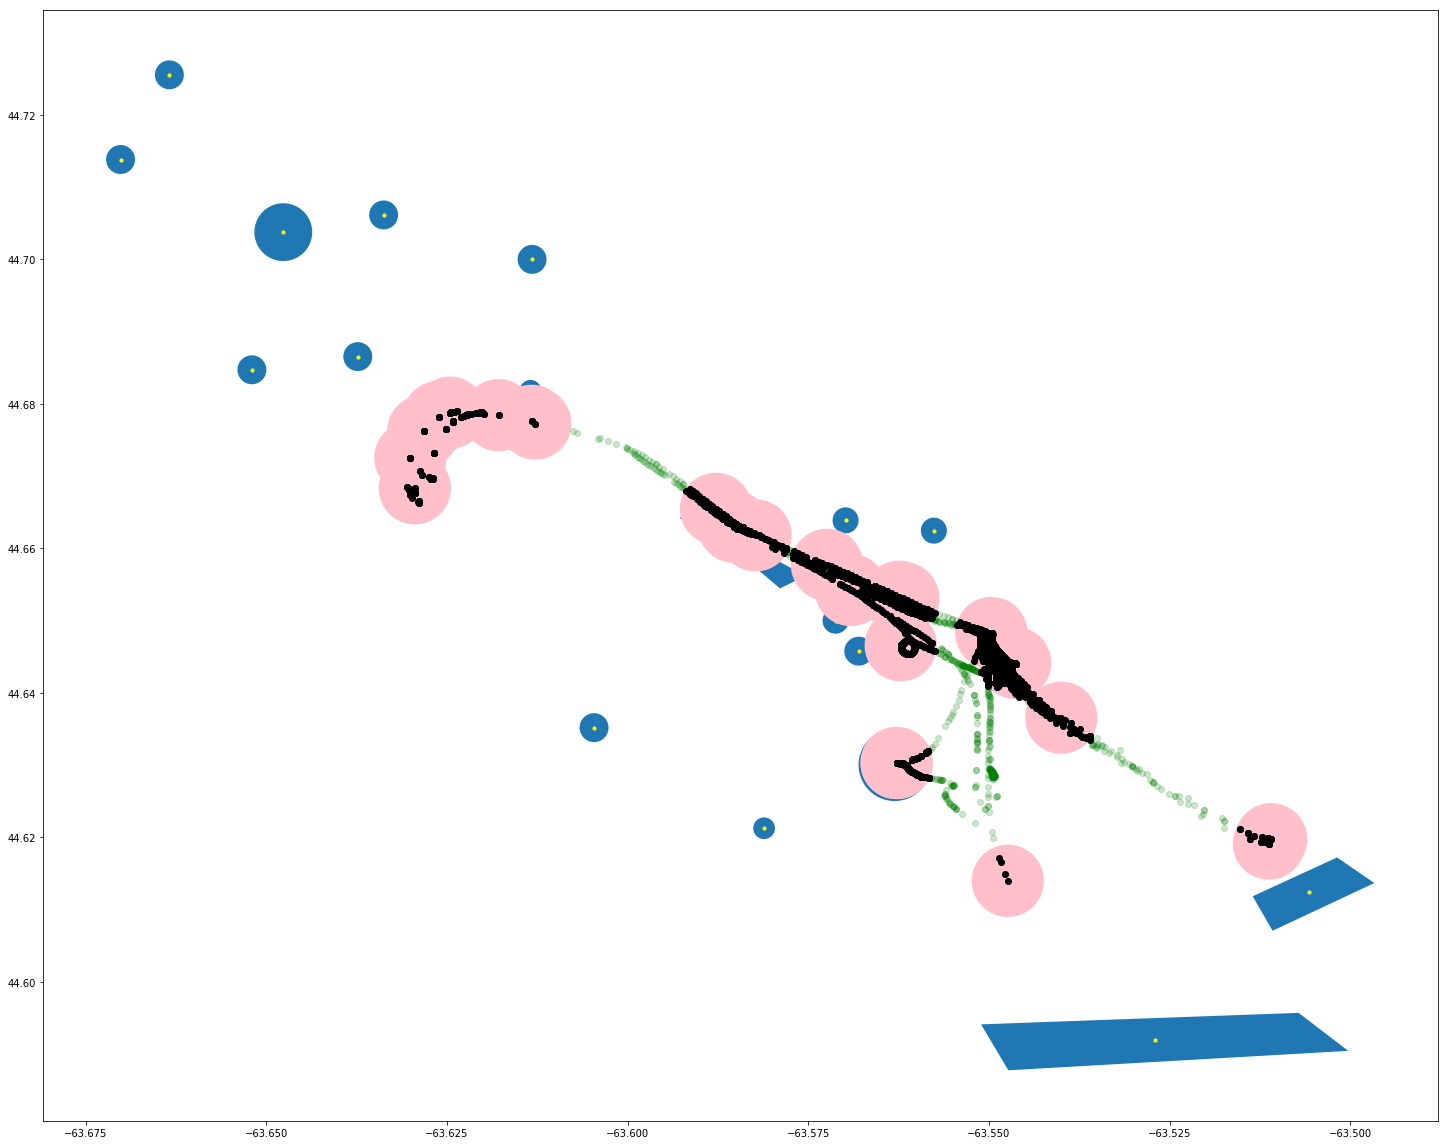

In [65]:
gdf18 = gpd.GeoDataFrame(d['df_h18'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h18']['location.coordinates.0'], d['df_h18']['location.coordinates.1'])])

p1=gdf18.loc[gdf18.distance(d1[0])==gdf18.distance(d1[0]).min(),:]
p2=gdf18.loc[gdf18.distance(d2[0])==gdf18.distance(d2[0]).min(),:]
p3=gdf18.loc[gdf18.distance(d3[0])==gdf18.distance(d3[0]).min(),:]
p4=gdf18.loc[gdf18.distance(d4[0])==gdf18.distance(d4[0]).min(),:]
p5=gdf18.loc[gdf18.distance(d5[0])==gdf18.distance(d5[0]).min(),:]
p6=gdf18.loc[gdf18.distance(d6[0])==gdf18.distance(d6[0]).min(),:]
p7=gdf18.loc[gdf18.distance(d7[0])==gdf18.distance(d7[0]).min(),:]
p8=gdf18.loc[gdf18.distance(d8[0])==gdf18.distance(d8[0]).min(),:]
p9=gdf18.loc[gdf18.distance(d9[0])==gdf18.distance(d9[0]).min(),:]
p10=gdf18.loc[gdf18.distance(d10[0])==gdf18.distance(d10[0]).min(),:]
p11=gdf18.loc[gdf18.distance(d11[0])==gdf18.distance(d11[0]).min(),:]
p12=gdf18.loc[gdf18.distance(d12[0])==gdf18.distance(d12[0]).min(),:]
p13=gdf18.loc[gdf18.distance(d13[0])==gdf18.distance(d13[0]).min(),:]
p14=gdf18.loc[gdf18.distance(d14[0])==gdf18.distance(d14[0]).min(),:]
p15=gdf18.loc[gdf18.distance(d15[0])==gdf18.distance(d15[0]).min(),:]
p16=gdf18.loc[gdf18.distance(d16[0])==gdf18.distance(d16[0]).min(),:]
p17=gdf18.loc[gdf18.distance(d17[0])==gdf18.distance(d17[0]).min(),:]
p18=gdf18.loc[gdf18.distance(d18[0])==gdf18.distance(d18[0]).min(),:]
p19=gdf18.loc[gdf18.distance(d19[0])==gdf18.distance(d19[0]).min(),:]
p20=gdf18.loc[gdf18.distance(d20[0])==gdf18.distance(d20[0]).min(),:]
p21=gdf18.loc[gdf18.distance(d21[0])==gdf18.distance(d21[0]).min(),:]
p22=gdf18.loc[gdf18.distance(d22[0])==gdf18.distance(d22[0]).min(),:]
p23=gdf18.loc[gdf18.distance(d23[0])==gdf18.distance(d23[0]).min(),:]
p24=gdf18.loc[gdf18.distance(d24[0])==gdf18.distance(d24[0]).min(),:]
p25=gdf18.loc[gdf18.distance(d25[0])==gdf18.distance(d25[0]).min(),:]
p26=gdf18.loc[gdf18.distance(d26[0])==gdf18.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf18.plot(ax=ax,color='g',alpha=0.2)
gdf18.loc[gdf18.within(p1),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p2),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p3),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p4),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p5),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p6),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p7),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p8),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p9),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p10),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p11),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p12),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p13),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p14),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p15),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p16),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p17),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p18),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p19),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p20),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p21),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p22),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p23),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p24),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p25),:].plot(ax=ax,color='k')
gdf18.loc[gdf18.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_18_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


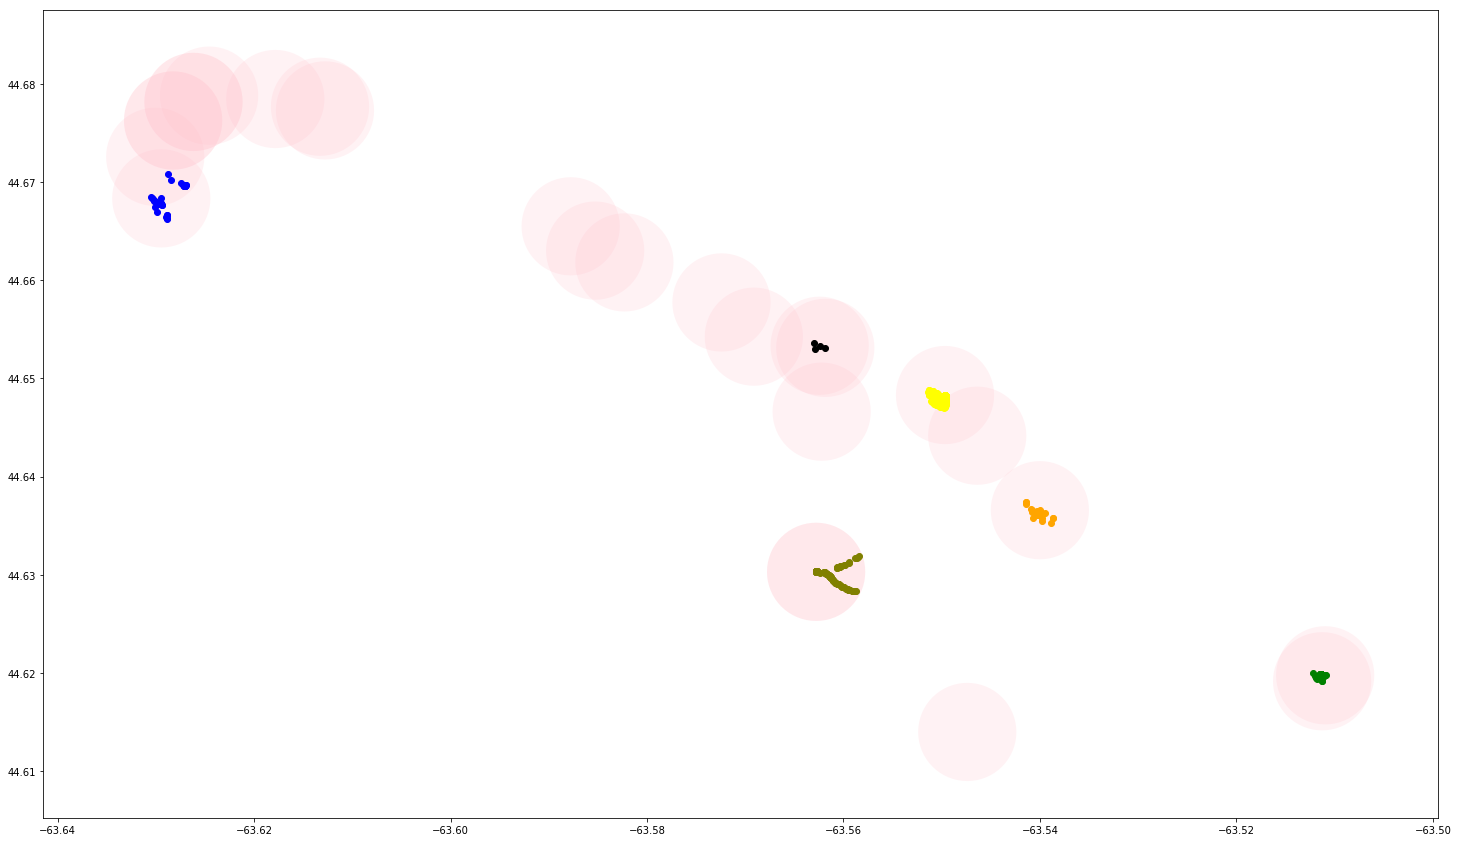

In [66]:
joinres=gpd.sjoin(gdf18,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_18_q2.png')

19th interval

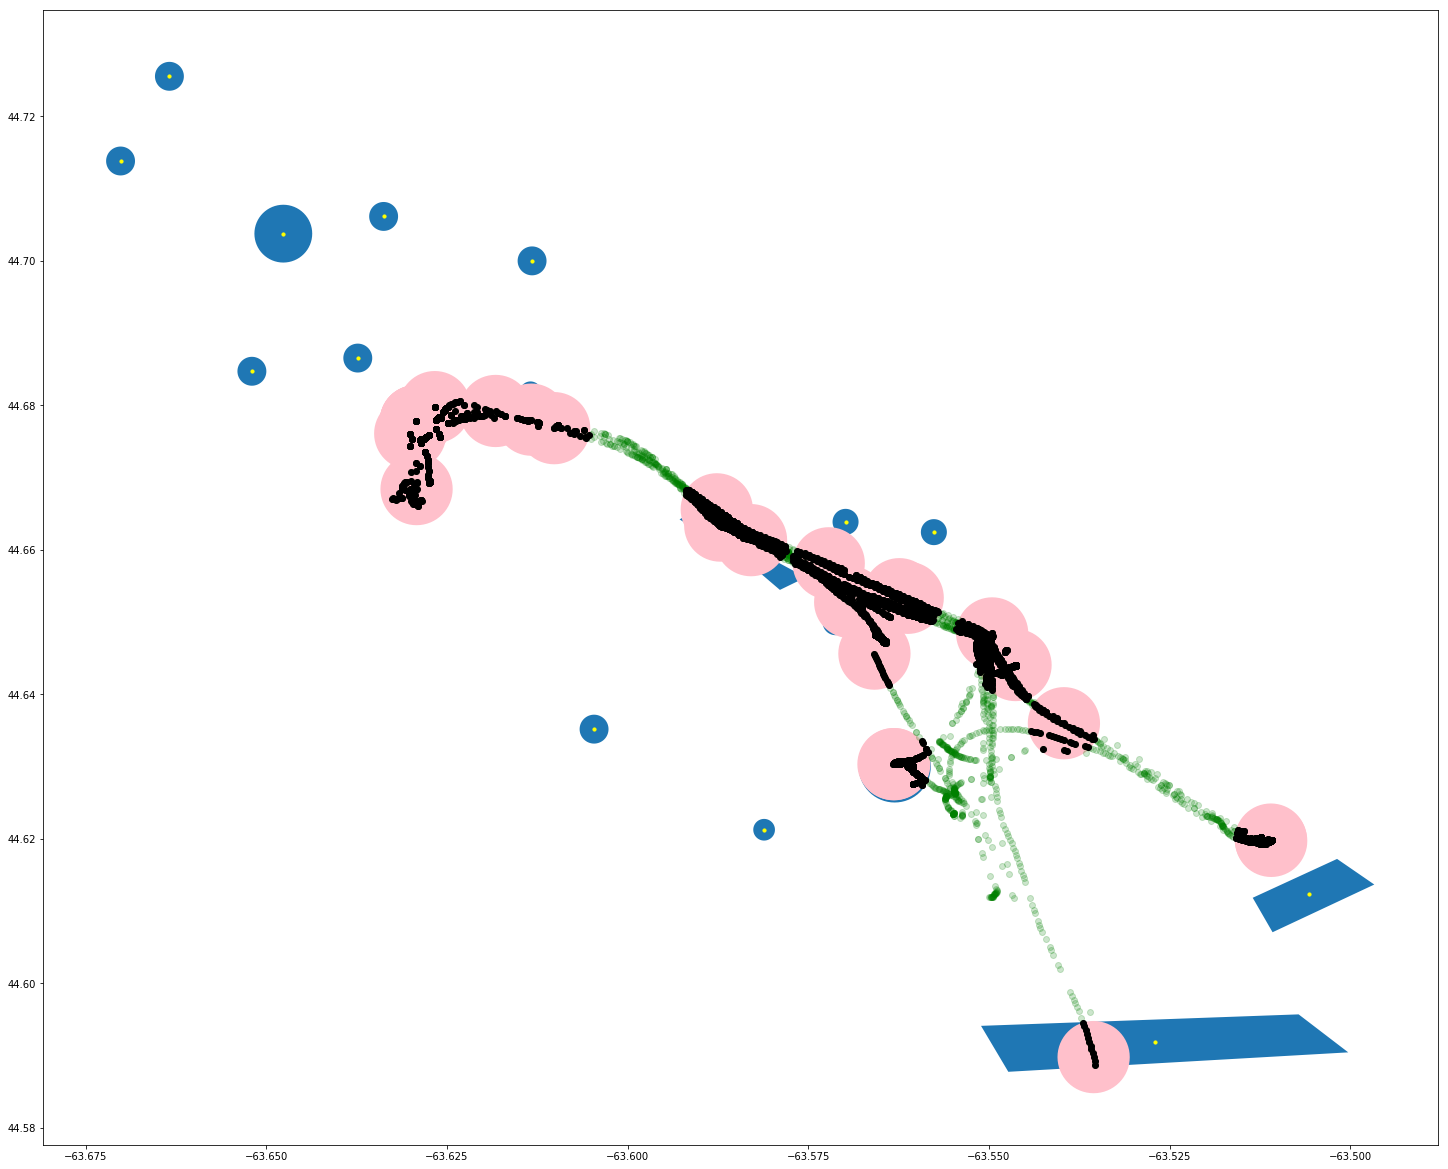

In [67]:
gdf19 = gpd.GeoDataFrame(d['df_h19'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h19']['location.coordinates.0'], d['df_h19']['location.coordinates.1'])])

p1=gdf19.loc[gdf19.distance(d1[0])==gdf19.distance(d1[0]).min(),:]
p2=gdf19.loc[gdf19.distance(d2[0])==gdf19.distance(d2[0]).min(),:]
p3=gdf19.loc[gdf19.distance(d3[0])==gdf19.distance(d3[0]).min(),:]
p4=gdf19.loc[gdf19.distance(d4[0])==gdf19.distance(d4[0]).min(),:]
p5=gdf19.loc[gdf19.distance(d5[0])==gdf19.distance(d5[0]).min(),:]
p6=gdf19.loc[gdf19.distance(d6[0])==gdf19.distance(d6[0]).min(),:]
p7=gdf19.loc[gdf19.distance(d7[0])==gdf19.distance(d7[0]).min(),:]
p8=gdf19.loc[gdf19.distance(d8[0])==gdf19.distance(d8[0]).min(),:]
p9=gdf19.loc[gdf19.distance(d9[0])==gdf19.distance(d9[0]).min(),:]
p10=gdf19.loc[gdf19.distance(d10[0])==gdf19.distance(d10[0]).min(),:]
p11=gdf19.loc[gdf19.distance(d11[0])==gdf19.distance(d11[0]).min(),:]
p12=gdf19.loc[gdf19.distance(d12[0])==gdf19.distance(d12[0]).min(),:]
p13=gdf19.loc[gdf19.distance(d13[0])==gdf19.distance(d13[0]).min(),:]
p14=gdf19.loc[gdf19.distance(d14[0])==gdf19.distance(d14[0]).min(),:]
p15=gdf19.loc[gdf19.distance(d15[0])==gdf19.distance(d15[0]).min(),:]
p16=gdf19.loc[gdf19.distance(d16[0])==gdf19.distance(d16[0]).min(),:]
p17=gdf19.loc[gdf19.distance(d17[0])==gdf19.distance(d17[0]).min(),:]
p18=gdf19.loc[gdf19.distance(d18[0])==gdf19.distance(d18[0]).min(),:]
p19=gdf19.loc[gdf19.distance(d19[0])==gdf19.distance(d19[0]).min(),:]
p20=gdf19.loc[gdf19.distance(d20[0])==gdf19.distance(d20[0]).min(),:]
p21=gdf19.loc[gdf19.distance(d21[0])==gdf19.distance(d21[0]).min(),:]
p22=gdf19.loc[gdf19.distance(d22[0])==gdf19.distance(d22[0]).min(),:]
p23=gdf19.loc[gdf19.distance(d23[0])==gdf19.distance(d23[0]).min(),:]
p24=gdf19.loc[gdf19.distance(d24[0])==gdf19.distance(d24[0]).min(),:]
p25=gdf19.loc[gdf19.distance(d25[0])==gdf19.distance(d25[0]).min(),:]
p26=gdf19.loc[gdf19.distance(d26[0])==gdf19.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf19.plot(ax=ax,color='g',alpha=0.2)
gdf19.loc[gdf19.within(p1),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p2),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p3),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p4),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p5),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p6),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p7),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p8),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p9),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p10),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p11),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p12),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p13),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p14),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p15),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p16),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p17),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p18),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p19),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p20),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p21),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p22),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p23),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p24),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p25),:].plot(ax=ax,color='k')
gdf19.loc[gdf19.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_19_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


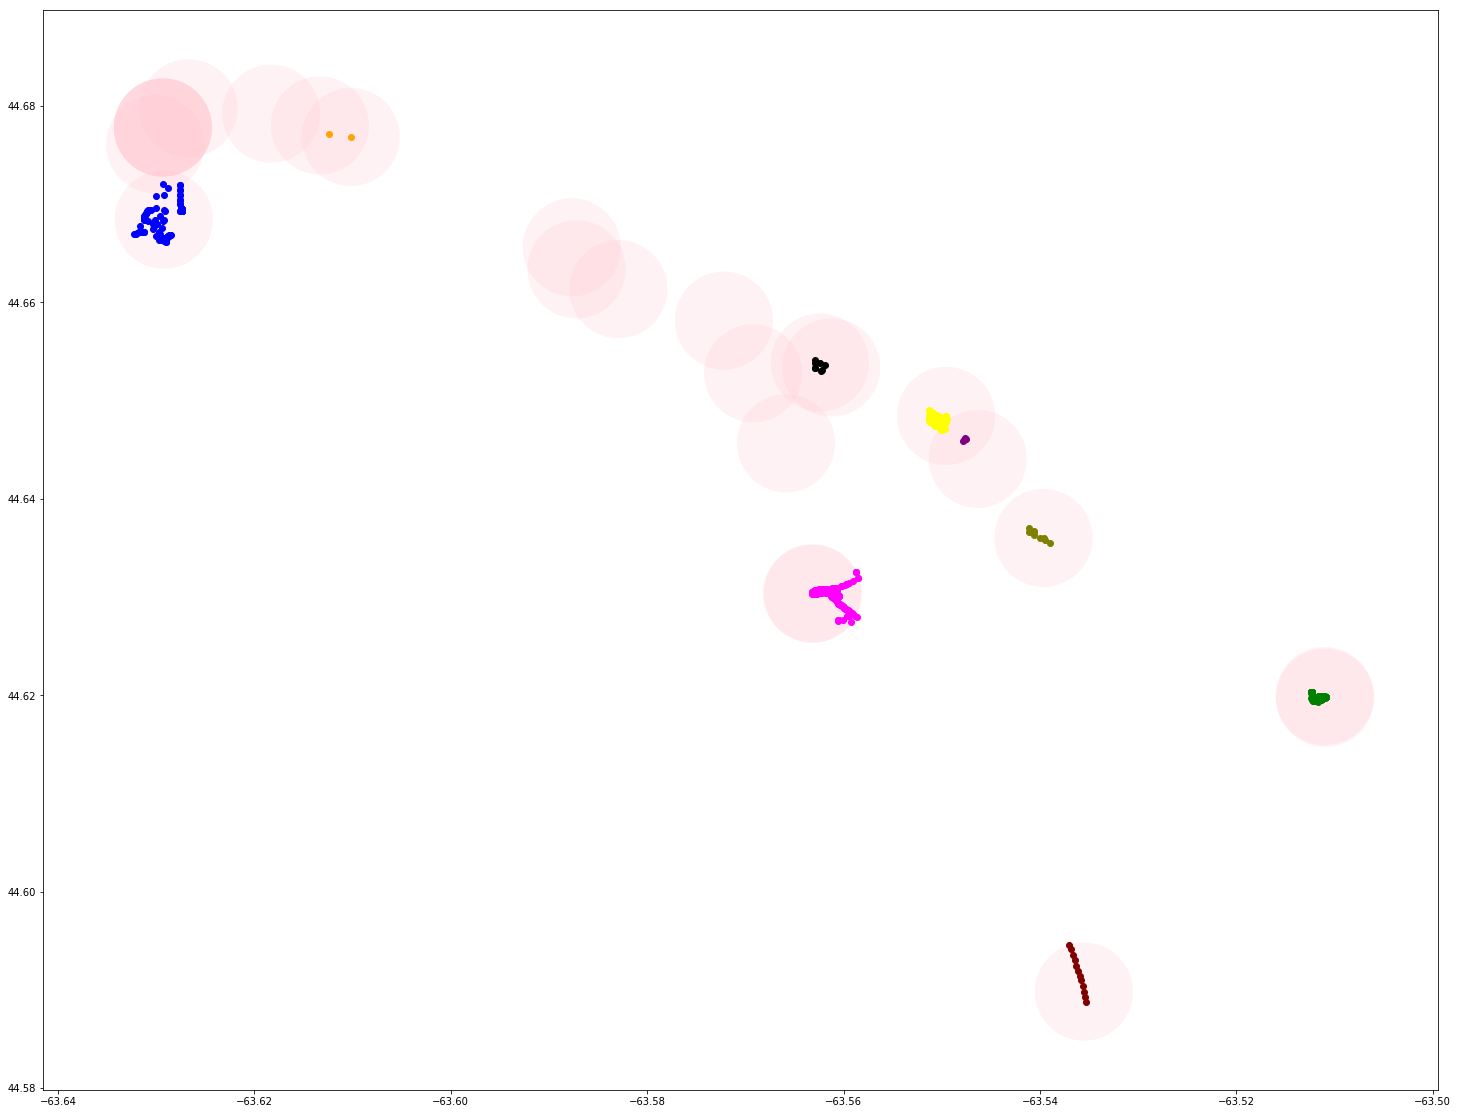

In [68]:
joinres=gpd.sjoin(gdf19,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_19_q2.png')

20th interval

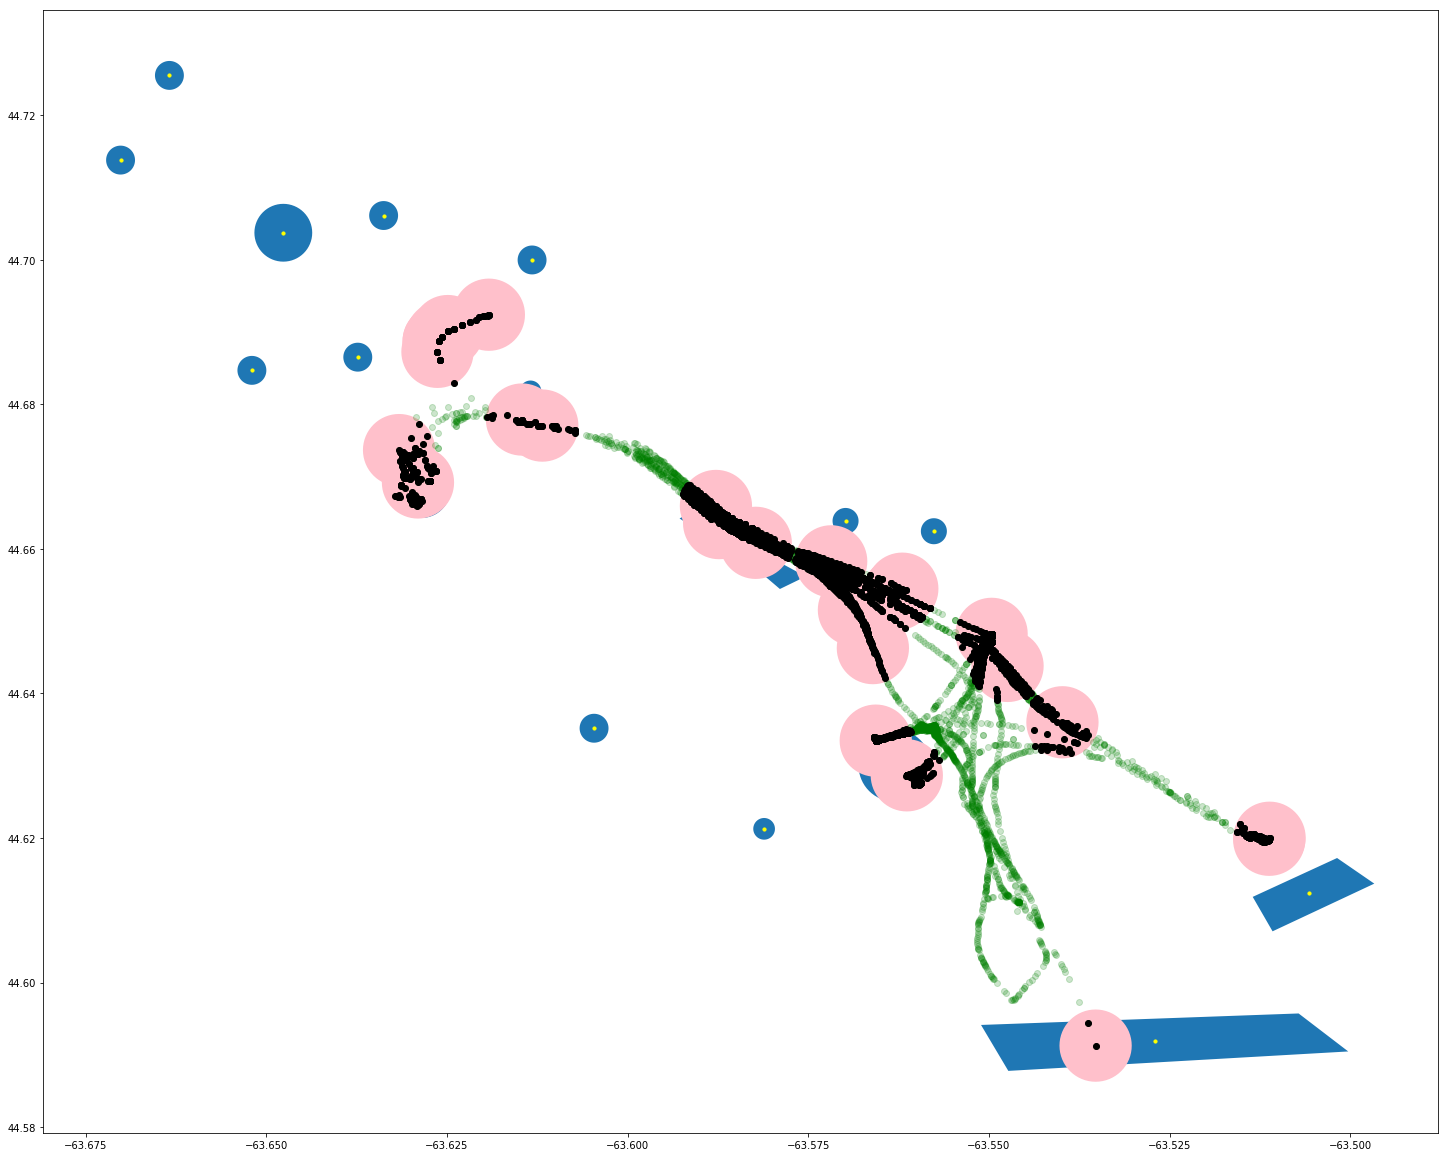

In [69]:
gdf20 = gpd.GeoDataFrame(d['df_h20'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h20']['location.coordinates.0'], d['df_h20']['location.coordinates.1'])])

p1=gdf20.loc[gdf20.distance(d1[0])==gdf20.distance(d1[0]).min(),:]
p2=gdf20.loc[gdf20.distance(d2[0])==gdf20.distance(d2[0]).min(),:]
p3=gdf20.loc[gdf20.distance(d3[0])==gdf20.distance(d3[0]).min(),:]
p4=gdf20.loc[gdf20.distance(d4[0])==gdf20.distance(d4[0]).min(),:]
p5=gdf20.loc[gdf20.distance(d5[0])==gdf20.distance(d5[0]).min(),:]
p6=gdf20.loc[gdf20.distance(d6[0])==gdf20.distance(d6[0]).min(),:]
p7=gdf20.loc[gdf20.distance(d7[0])==gdf20.distance(d7[0]).min(),:]
p8=gdf20.loc[gdf20.distance(d8[0])==gdf20.distance(d8[0]).min(),:]
p9=gdf20.loc[gdf20.distance(d9[0])==gdf20.distance(d9[0]).min(),:]
p10=gdf20.loc[gdf20.distance(d10[0])==gdf20.distance(d10[0]).min(),:]
p11=gdf20.loc[gdf20.distance(d11[0])==gdf20.distance(d11[0]).min(),:]
p12=gdf20.loc[gdf20.distance(d12[0])==gdf20.distance(d12[0]).min(),:]
p13=gdf20.loc[gdf20.distance(d13[0])==gdf20.distance(d13[0]).min(),:]
p14=gdf20.loc[gdf20.distance(d14[0])==gdf20.distance(d14[0]).min(),:]
p15=gdf20.loc[gdf20.distance(d15[0])==gdf20.distance(d15[0]).min(),:]
p16=gdf20.loc[gdf20.distance(d16[0])==gdf20.distance(d16[0]).min(),:]
p17=gdf20.loc[gdf20.distance(d17[0])==gdf20.distance(d17[0]).min(),:]
p18=gdf20.loc[gdf20.distance(d18[0])==gdf20.distance(d18[0]).min(),:]
p19=gdf20.loc[gdf20.distance(d19[0])==gdf20.distance(d19[0]).min(),:]
p20=gdf20.loc[gdf20.distance(d20[0])==gdf20.distance(d20[0]).min(),:]
p21=gdf20.loc[gdf20.distance(d21[0])==gdf20.distance(d21[0]).min(),:]
p22=gdf20.loc[gdf20.distance(d22[0])==gdf20.distance(d22[0]).min(),:]
p23=gdf20.loc[gdf20.distance(d23[0])==gdf20.distance(d23[0]).min(),:]
p24=gdf20.loc[gdf20.distance(d24[0])==gdf20.distance(d24[0]).min(),:]
p25=gdf20.loc[gdf20.distance(d25[0])==gdf20.distance(d25[0]).min(),:]
p26=gdf20.loc[gdf20.distance(d26[0])==gdf20.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf20.plot(ax=ax,color='g',alpha=0.2)
gdf20.loc[gdf20.within(p1),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p2),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p3),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p4),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p5),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p6),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p7),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p8),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p9),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p10),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p11),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p12),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p13),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p14),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p15),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p16),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p17),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p18),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p19),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p20),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p21),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p22),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p23),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p24),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p25),:].plot(ax=ax,color='k')
gdf20.loc[gdf20.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_20_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


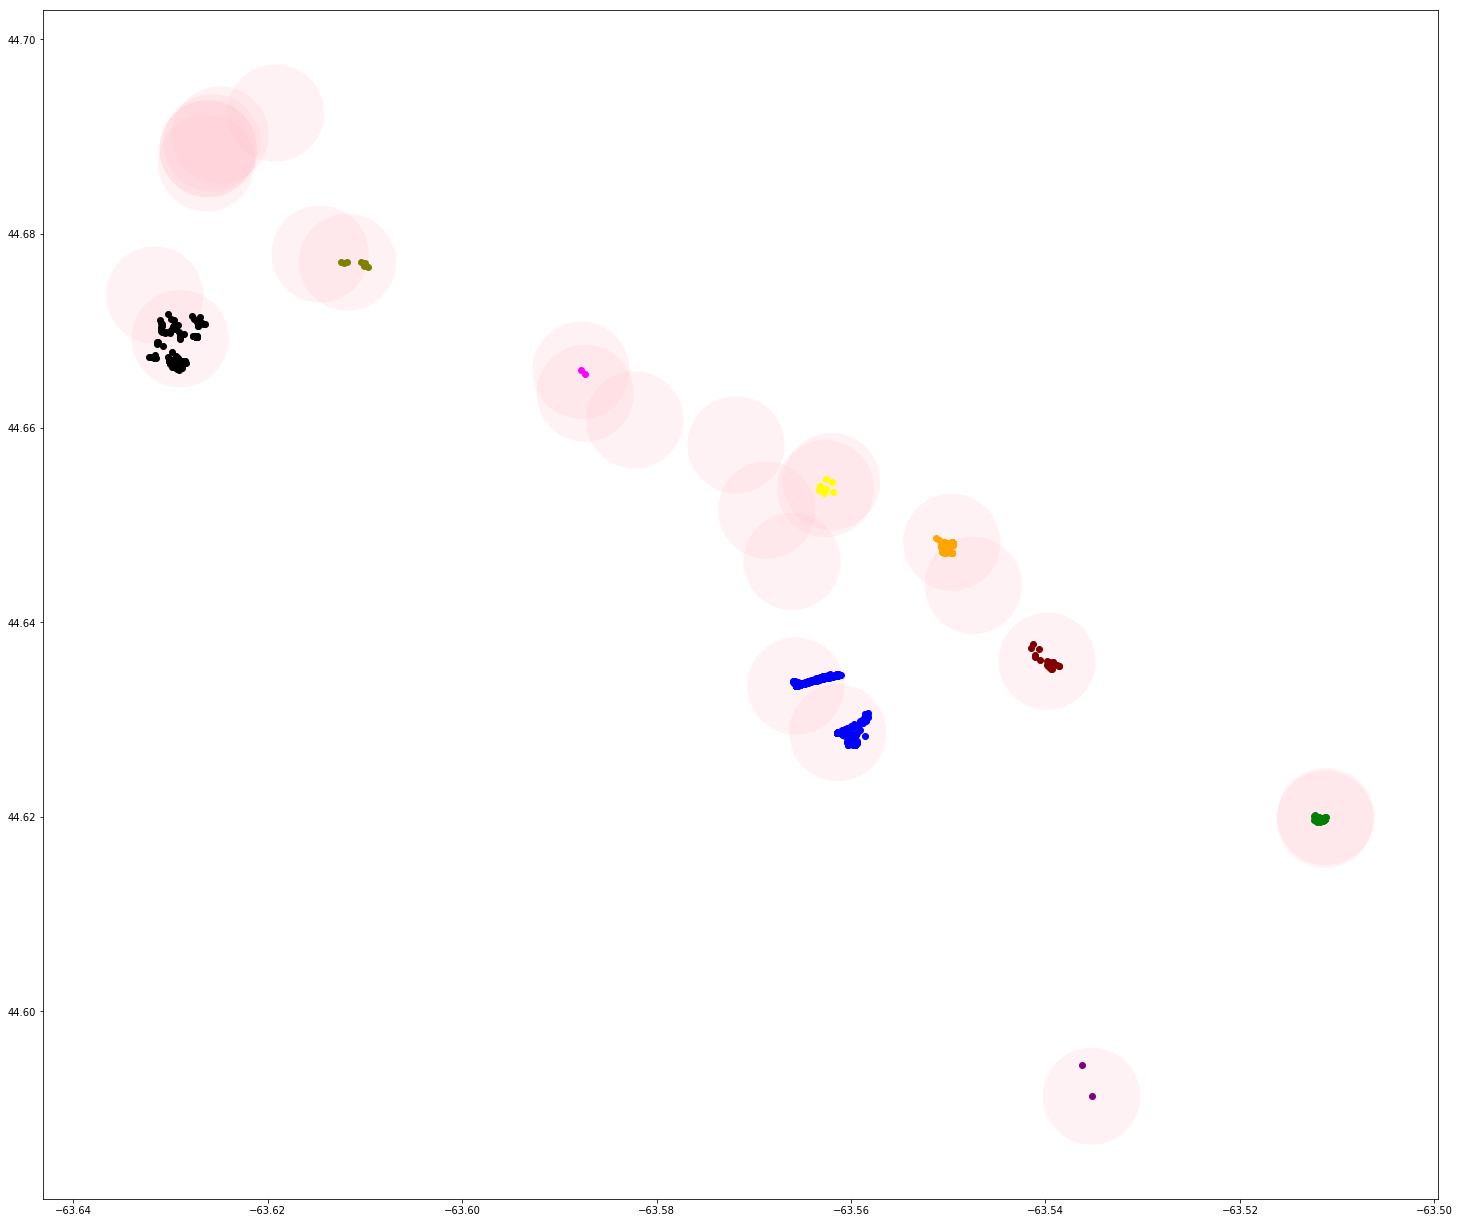

In [70]:
joinres=gpd.sjoin(gdf20,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_20_q2.png')

21st interval

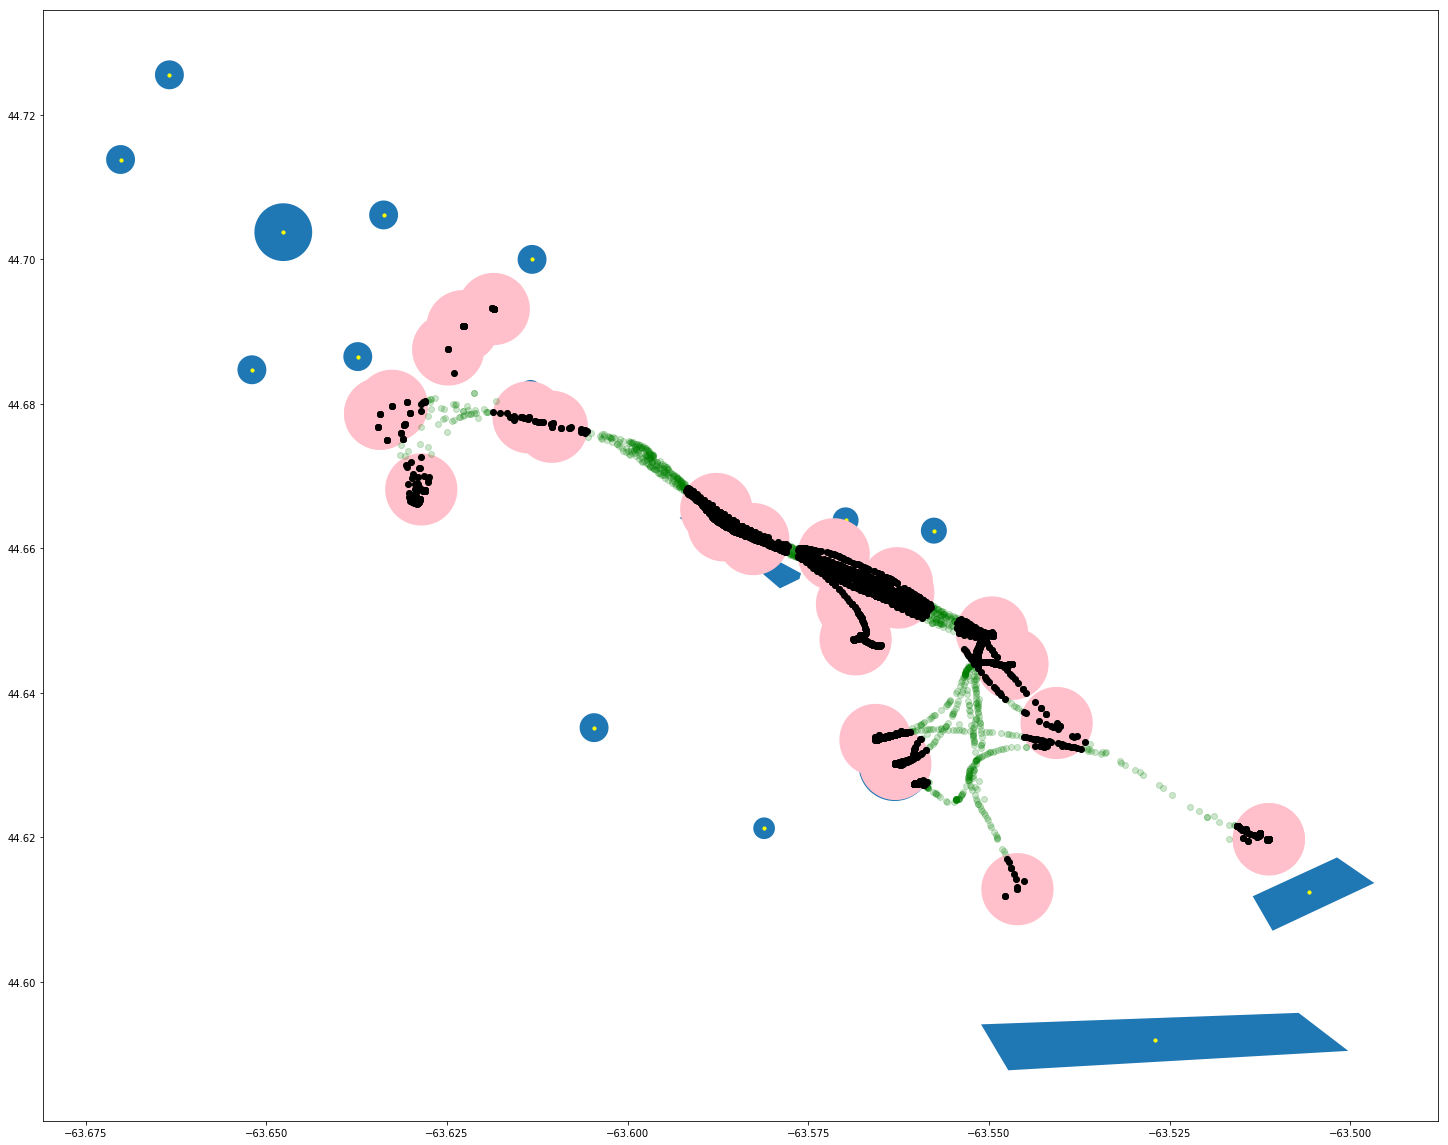

In [71]:
gdf21 = gpd.GeoDataFrame(d['df_h21'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h21']['location.coordinates.0'], d['df_h21']['location.coordinates.1'])])

p1=gdf21.loc[gdf21.distance(d1[0])==gdf21.distance(d1[0]).min(),:]
p2=gdf21.loc[gdf21.distance(d2[0])==gdf21.distance(d2[0]).min(),:]
p3=gdf21.loc[gdf21.distance(d3[0])==gdf21.distance(d3[0]).min(),:]
p4=gdf21.loc[gdf21.distance(d4[0])==gdf21.distance(d4[0]).min(),:]
p5=gdf21.loc[gdf21.distance(d5[0])==gdf21.distance(d5[0]).min(),:]
p6=gdf21.loc[gdf21.distance(d6[0])==gdf21.distance(d6[0]).min(),:]
p7=gdf21.loc[gdf21.distance(d7[0])==gdf21.distance(d7[0]).min(),:]
p8=gdf21.loc[gdf21.distance(d8[0])==gdf21.distance(d8[0]).min(),:]
p9=gdf21.loc[gdf21.distance(d9[0])==gdf21.distance(d9[0]).min(),:]
p10=gdf21.loc[gdf21.distance(d10[0])==gdf21.distance(d10[0]).min(),:]
p11=gdf21.loc[gdf21.distance(d11[0])==gdf21.distance(d11[0]).min(),:]
p12=gdf21.loc[gdf21.distance(d12[0])==gdf21.distance(d12[0]).min(),:]
p13=gdf21.loc[gdf21.distance(d13[0])==gdf21.distance(d13[0]).min(),:]
p14=gdf21.loc[gdf21.distance(d14[0])==gdf21.distance(d14[0]).min(),:]
p15=gdf21.loc[gdf21.distance(d15[0])==gdf21.distance(d15[0]).min(),:]
p16=gdf21.loc[gdf21.distance(d16[0])==gdf21.distance(d16[0]).min(),:]
p17=gdf21.loc[gdf21.distance(d17[0])==gdf21.distance(d17[0]).min(),:]
p18=gdf21.loc[gdf21.distance(d18[0])==gdf21.distance(d18[0]).min(),:]
p19=gdf21.loc[gdf21.distance(d19[0])==gdf21.distance(d19[0]).min(),:]
p20=gdf21.loc[gdf21.distance(d20[0])==gdf21.distance(d20[0]).min(),:]
p21=gdf21.loc[gdf21.distance(d21[0])==gdf21.distance(d21[0]).min(),:]
p22=gdf21.loc[gdf21.distance(d22[0])==gdf21.distance(d22[0]).min(),:]
p23=gdf21.loc[gdf21.distance(d23[0])==gdf21.distance(d23[0]).min(),:]
p24=gdf21.loc[gdf21.distance(d24[0])==gdf21.distance(d24[0]).min(),:]
p25=gdf21.loc[gdf21.distance(d25[0])==gdf21.distance(d25[0]).min(),:]
p26=gdf21.loc[gdf21.distance(d26[0])==gdf21.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf21.plot(ax=ax,color='g',alpha=0.2)
gdf21.loc[gdf21.within(p1),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p2),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p3),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p4),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p5),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p6),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p7),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p8),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p9),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p10),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p11),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p12),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p13),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p14),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p15),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p16),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p17),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p18),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p19),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p20),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p21),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p22),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p23),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p24),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p25),:].plot(ax=ax,color='k')
gdf21.loc[gdf21.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_21_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


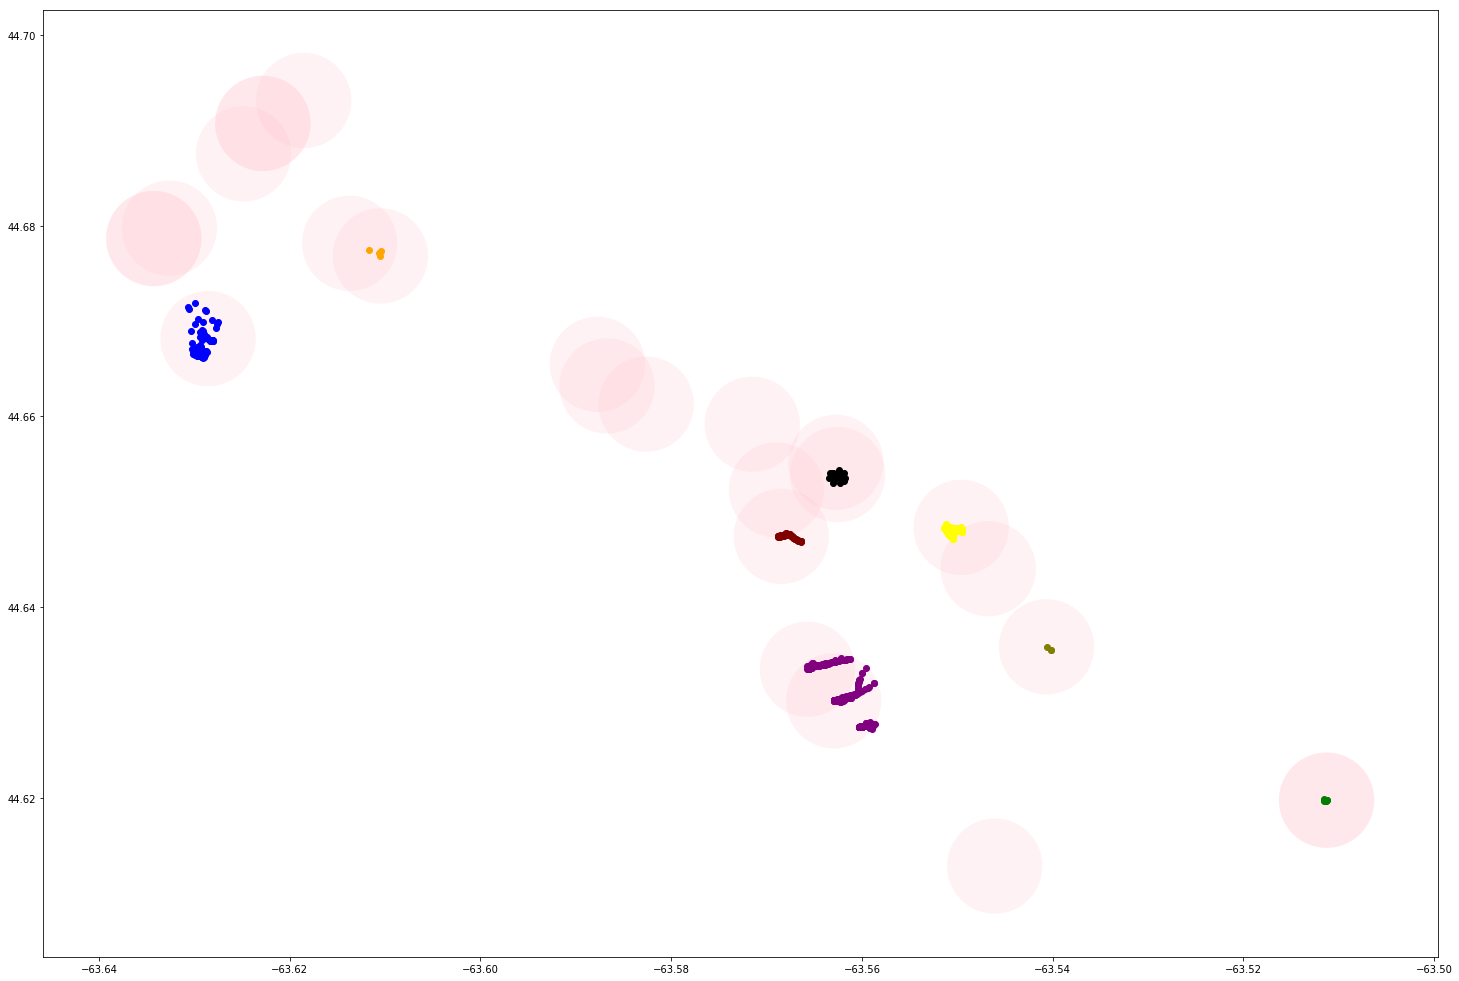

In [72]:
joinres=gpd.sjoin(gdf21,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_21_q2.png')

22nd interval

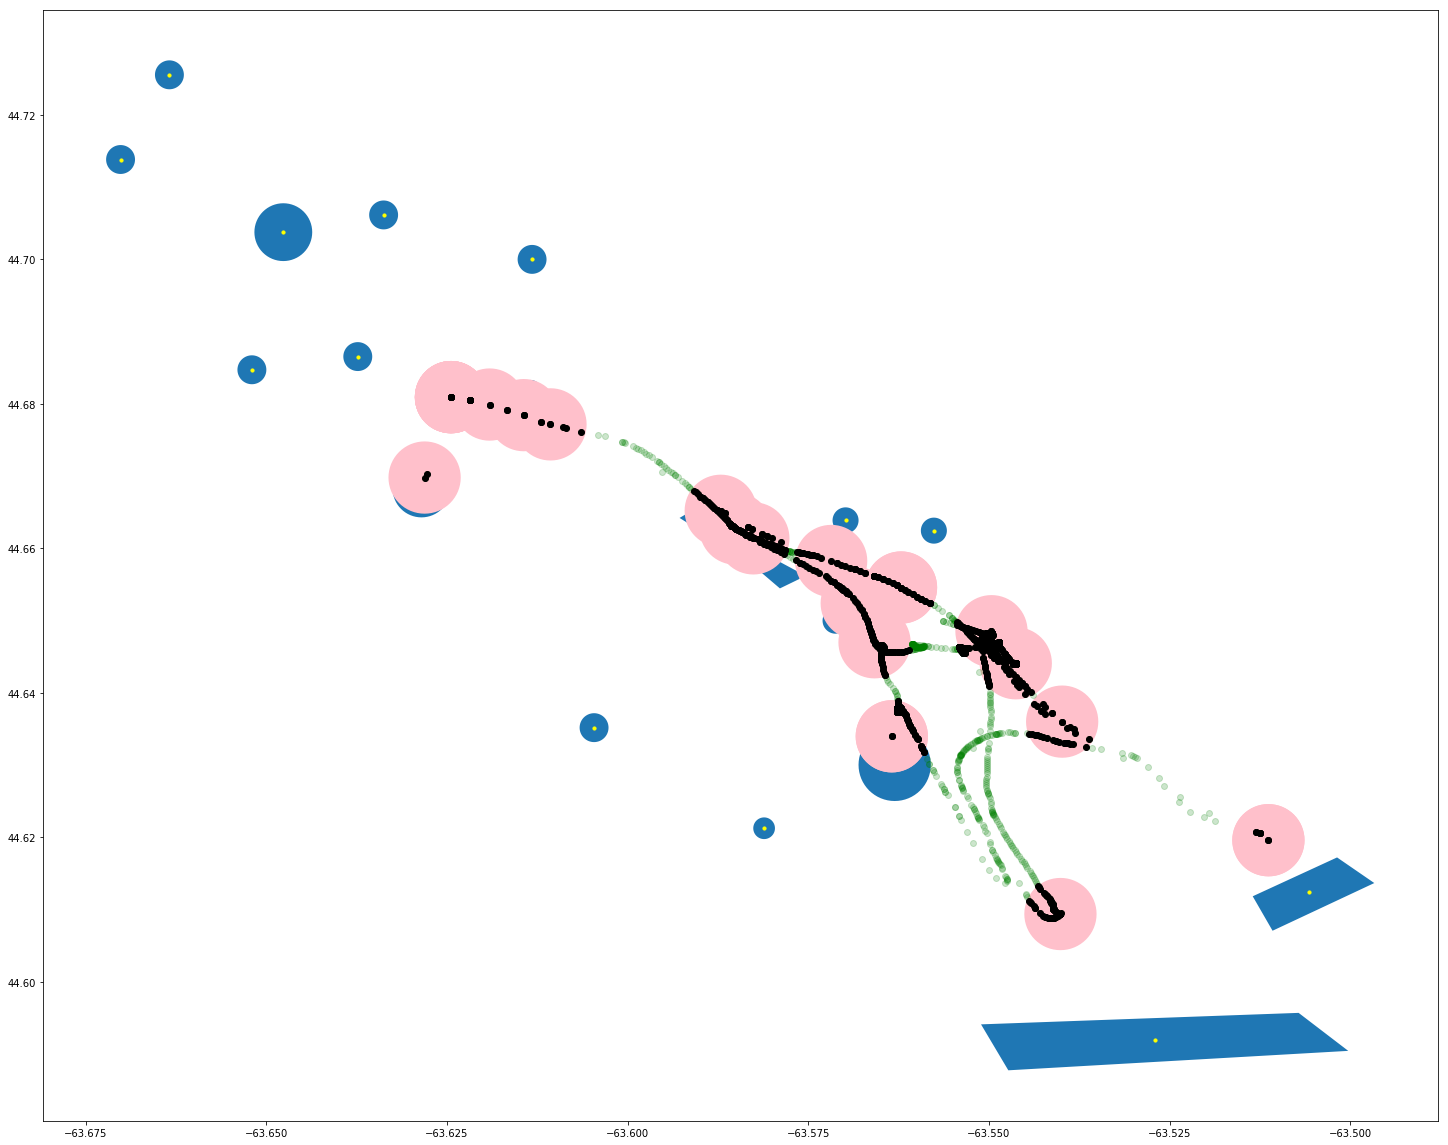

In [73]:
gdf22 = gpd.GeoDataFrame(d['df_h22'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h22']['location.coordinates.0'], d['df_h22']['location.coordinates.1'])])

p1=gdf22.loc[gdf22.distance(d1[0])==gdf22.distance(d1[0]).min(),:]
p2=gdf22.loc[gdf22.distance(d2[0])==gdf22.distance(d2[0]).min(),:]
p3=gdf22.loc[gdf22.distance(d3[0])==gdf22.distance(d3[0]).min(),:]
p4=gdf22.loc[gdf22.distance(d4[0])==gdf22.distance(d4[0]).min(),:]
p5=gdf22.loc[gdf22.distance(d5[0])==gdf22.distance(d5[0]).min(),:]
p6=gdf22.loc[gdf22.distance(d6[0])==gdf22.distance(d6[0]).min(),:]
p7=gdf22.loc[gdf22.distance(d7[0])==gdf22.distance(d7[0]).min(),:]
p8=gdf22.loc[gdf22.distance(d8[0])==gdf22.distance(d8[0]).min(),:]
p9=gdf22.loc[gdf22.distance(d9[0])==gdf22.distance(d9[0]).min(),:]
p10=gdf22.loc[gdf22.distance(d10[0])==gdf22.distance(d10[0]).min(),:]
p11=gdf22.loc[gdf22.distance(d11[0])==gdf22.distance(d11[0]).min(),:]
p12=gdf22.loc[gdf22.distance(d12[0])==gdf22.distance(d12[0]).min(),:]
p13=gdf22.loc[gdf22.distance(d13[0])==gdf22.distance(d13[0]).min(),:]
p14=gdf22.loc[gdf22.distance(d14[0])==gdf22.distance(d14[0]).min(),:]
p15=gdf22.loc[gdf22.distance(d15[0])==gdf22.distance(d15[0]).min(),:]
p16=gdf22.loc[gdf22.distance(d16[0])==gdf22.distance(d16[0]).min(),:]
p17=gdf22.loc[gdf22.distance(d17[0])==gdf22.distance(d17[0]).min(),:]
p18=gdf22.loc[gdf22.distance(d18[0])==gdf22.distance(d18[0]).min(),:]
p19=gdf22.loc[gdf22.distance(d19[0])==gdf22.distance(d19[0]).min(),:]
p20=gdf22.loc[gdf22.distance(d20[0])==gdf22.distance(d20[0]).min(),:]
p21=gdf22.loc[gdf22.distance(d21[0])==gdf22.distance(d21[0]).min(),:]
p22=gdf22.loc[gdf22.distance(d22[0])==gdf22.distance(d22[0]).min(),:]
p23=gdf22.loc[gdf22.distance(d23[0])==gdf22.distance(d23[0]).min(),:]
p24=gdf22.loc[gdf22.distance(d24[0])==gdf22.distance(d24[0]).min(),:]
p25=gdf22.loc[gdf22.distance(d25[0])==gdf22.distance(d25[0]).min(),:]
p26=gdf22.loc[gdf22.distance(d26[0])==gdf22.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf22.plot(ax=ax,color='g',alpha=0.2)
gdf22.loc[gdf22.within(p1),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p2),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p3),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p4),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p5),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p6),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p7),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p8),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p9),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p10),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p11),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p12),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p13),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p14),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p15),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p16),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p17),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p18),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p19),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p20),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p21),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p22),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p23),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p24),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p25),:].plot(ax=ax,color='k')
gdf22.loc[gdf22.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_22_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


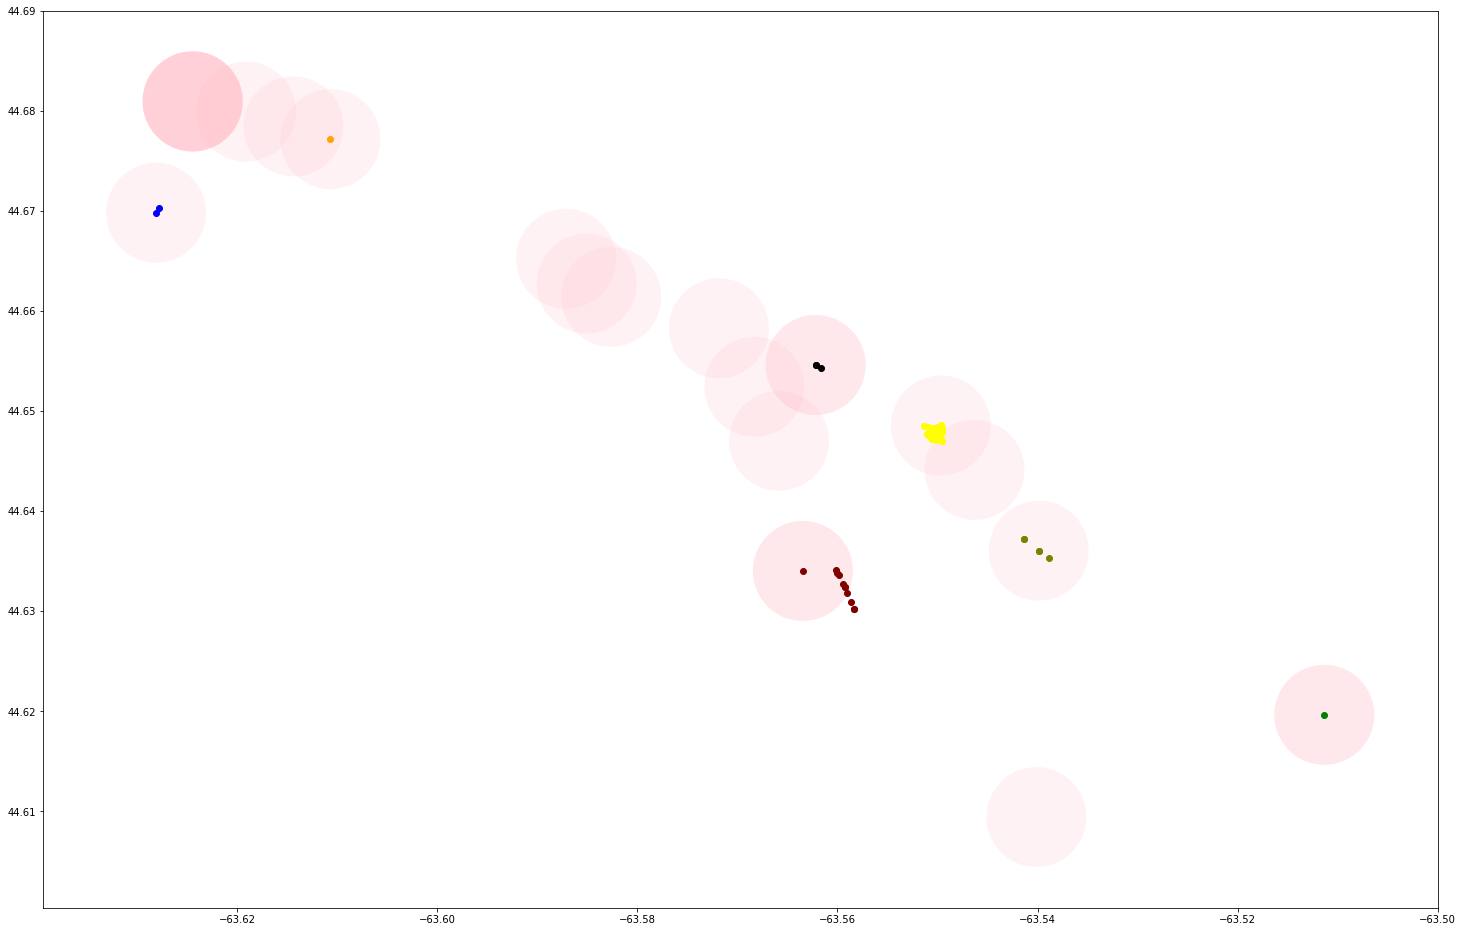

In [74]:
joinres=gpd.sjoin(gdf22,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_22_q2.png')

23rd interval

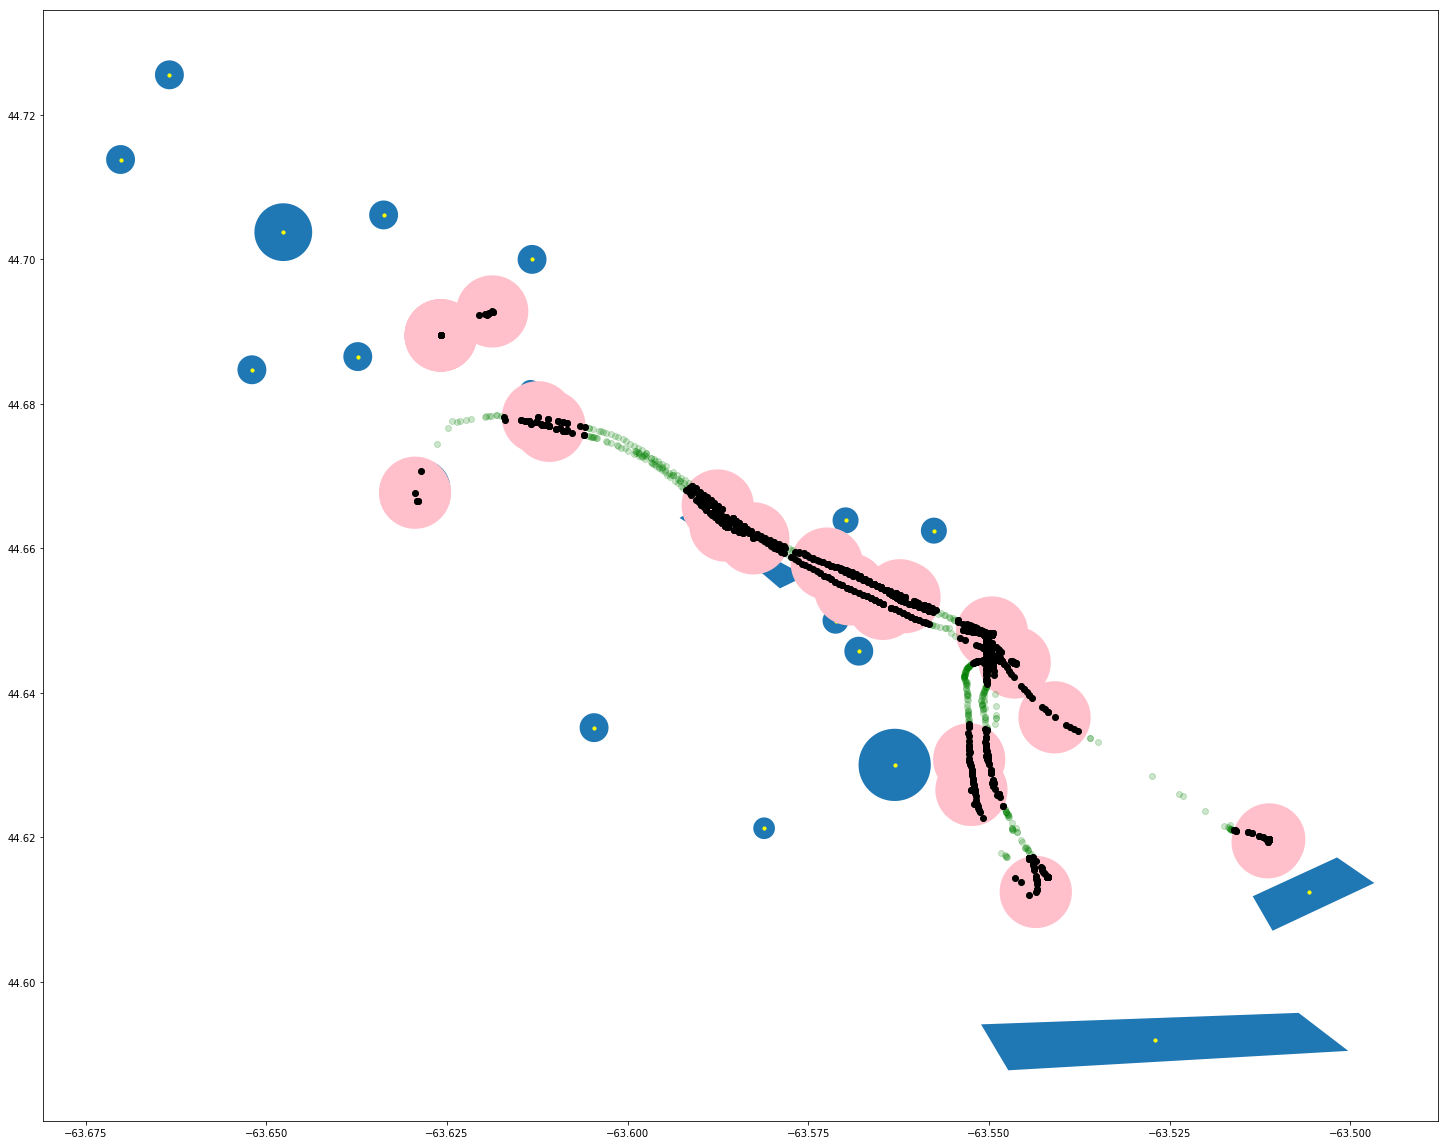

In [75]:
gdf23 = gpd.GeoDataFrame(d['df_h23'].drop(['location.coordinates.0', 'location.coordinates.1'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(d['df_h23']['location.coordinates.0'], d['df_h23']['location.coordinates.1'])])

p1=gdf23.loc[gdf23.distance(d1[0])==gdf23.distance(d1[0]).min(),:]
p2=gdf23.loc[gdf23.distance(d2[0])==gdf23.distance(d2[0]).min(),:]
p3=gdf23.loc[gdf23.distance(d3[0])==gdf23.distance(d3[0]).min(),:]
p4=gdf23.loc[gdf23.distance(d4[0])==gdf23.distance(d4[0]).min(),:]
p5=gdf23.loc[gdf23.distance(d5[0])==gdf23.distance(d5[0]).min(),:]
p6=gdf23.loc[gdf23.distance(d6[0])==gdf23.distance(d6[0]).min(),:]
p7=gdf23.loc[gdf23.distance(d7[0])==gdf23.distance(d7[0]).min(),:]
p8=gdf23.loc[gdf23.distance(d8[0])==gdf23.distance(d8[0]).min(),:]
p9=gdf23.loc[gdf23.distance(d9[0])==gdf23.distance(d9[0]).min(),:]
p10=gdf23.loc[gdf23.distance(d10[0])==gdf23.distance(d10[0]).min(),:]
p11=gdf23.loc[gdf23.distance(d11[0])==gdf23.distance(d11[0]).min(),:]
p12=gdf23.loc[gdf23.distance(d12[0])==gdf23.distance(d12[0]).min(),:]
p13=gdf23.loc[gdf23.distance(d13[0])==gdf23.distance(d13[0]).min(),:]
p14=gdf23.loc[gdf23.distance(d14[0])==gdf23.distance(d14[0]).min(),:]
p15=gdf23.loc[gdf23.distance(d15[0])==gdf23.distance(d15[0]).min(),:]
p16=gdf23.loc[gdf23.distance(d16[0])==gdf23.distance(d16[0]).min(),:]
p17=gdf23.loc[gdf23.distance(d17[0])==gdf23.distance(d17[0]).min(),:]
p18=gdf23.loc[gdf23.distance(d18[0])==gdf23.distance(d18[0]).min(),:]
p19=gdf23.loc[gdf23.distance(d19[0])==gdf23.distance(d19[0]).min(),:]
p20=gdf23.loc[gdf23.distance(d20[0])==gdf23.distance(d20[0]).min(),:]
p21=gdf23.loc[gdf23.distance(d21[0])==gdf23.distance(d21[0]).min(),:]
p22=gdf23.loc[gdf23.distance(d22[0])==gdf23.distance(d22[0]).min(),:]
p23=gdf23.loc[gdf23.distance(d23[0])==gdf23.distance(d23[0]).min(),:]
p24=gdf23.loc[gdf23.distance(d24[0])==gdf23.distance(d24[0]).min(),:]
p25=gdf23.loc[gdf23.distance(d25[0])==gdf23.distance(d25[0]).min(),:]
p26=gdf23.loc[gdf23.distance(d26[0])==gdf23.distance(d26[0]).min(),:]


# creating buffer on the buffer with 5km radius
ax=bylaw.loc[['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7','south_enterance', 'auto_port', 
              'southend container terminal','NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove','armament',
              'waterfront h', 'northarm', 'plll', 'pp', 'po001','po002', 'oulier_maybecday', 'p003', 'enter2',
              'p009', 'p010'],:].plot(figsize=(25,25))
gpd.GeoSeries([d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0],
               d16[0],d17[0],d18[0],d19[0],d20[0],d21[0],d22[0],d23[0],d24[0],d25[0],
               d26[0]]).plot(ax=ax,color='yellow',markersize=10)

p1=p1.iloc[0,:].geometry.buffer(0.005) 
p2=p2.iloc[0,:].geometry.buffer(0.005)
p3=p3.iloc[0,:].geometry.buffer(0.005) 
p4=p4.iloc[0,:].geometry.buffer(0.005)
p5=p5.iloc[0,:].geometry.buffer(0.005) # getting the buffer with 5km radius for the port p5
p6=p6.iloc[0,:].geometry.buffer(0.005)
p7=p7.iloc[0,:].geometry.buffer(0.005) 
p8=p8.iloc[0,:].geometry.buffer(0.005)
p9=p9.iloc[0,:].geometry.buffer(0.005) 
p10=p10.iloc[0,:].geometry.buffer(0.005)
p11=p11.iloc[0,:].geometry.buffer(0.005) 
p12=p12.iloc[0,:].geometry.buffer(0.005)
p13=p13.iloc[0,:].geometry.buffer(0.005) 
p14=p14.iloc[0,:].geometry.buffer(0.005)
p15=p15.iloc[0,:].geometry.buffer(0.005) 
p16=p16.iloc[0,:].geometry.buffer(0.005)
p17=p17.iloc[0,:].geometry.buffer(0.005) 
p18=p18.iloc[0,:].geometry.buffer(0.005)
p19=p19.iloc[0,:].geometry.buffer(0.005) 
p20=p20.iloc[0,:].geometry.buffer(0.005)
p21=p21.iloc[0,:].geometry.buffer(0.005) 
p22=p22.iloc[0,:].geometry.buffer(0.005)
p23=p23.iloc[0,:].geometry.buffer(0.005) 
p24=p24.iloc[0,:].geometry.buffer(0.005)
p25=p25.iloc[0,:].geometry.buffer(0.005) 
p26=p26.iloc[0,:].geometry.buffer(0.005)

# plotting the buffer radius near ports

gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(ax=ax,color='pink',markersize=400)
gdf23.plot(ax=ax,color='g',alpha=0.2)
gdf23.loc[gdf23.within(p1),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p2),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p3),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p4),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p5),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p6),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p7),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p8),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p9),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p10),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p11),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p12),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p13),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p14),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p15),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p16),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p17),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p18),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p19),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p20),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p21),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p22),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p23),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p24),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p25),:].plot(ax=ax,color='k')
gdf23.loc[gdf23.within(p26),:].plot(ax=ax,color='k')
plt.savefig('Q3 images/interval_23_q1.png')

C:\Users\lanch\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


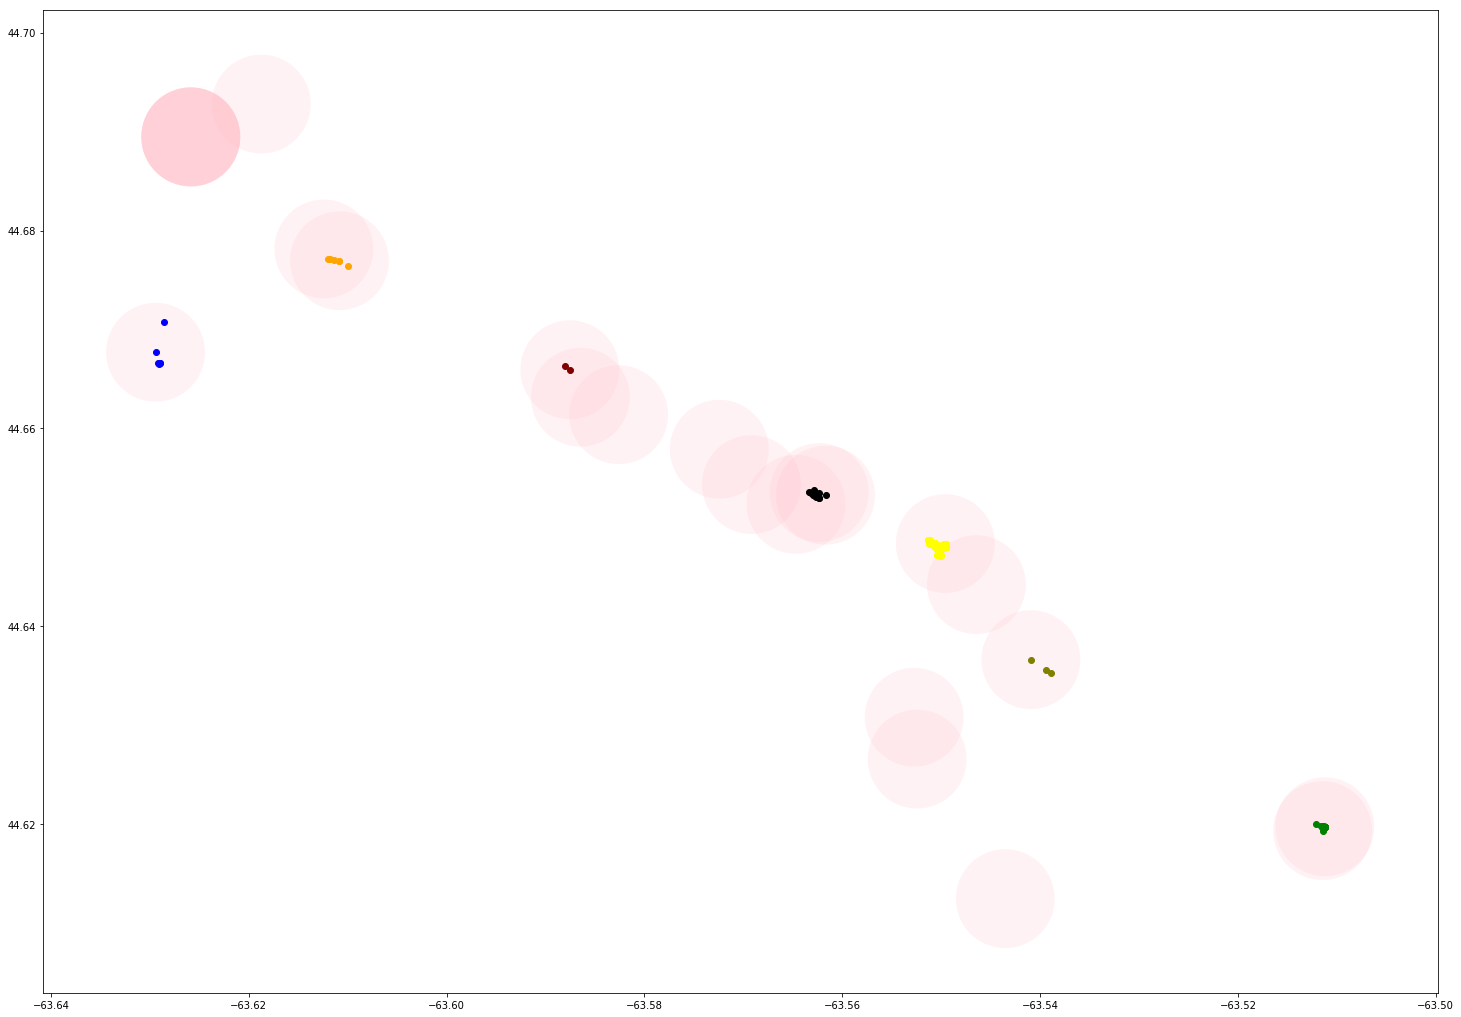

In [76]:
joinres=gpd.sjoin(gdf23,bylaw,op='within',how='left')
col=['r','b','g','k','yellow','orange','Olive','Maroon','Purple','Fuchsia','Lime','Navy','Aqua','Teal','Grey','Black','Crimson','']
i=0
ax=gpd.GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
plt.savefig('Q3 images/interval_23_q2.png')

### <font color=blue> 4. Select any port you like. Create a temporal chart for the density of messages in that port. Your x is the time and each snapshot of the time has the density of port at a specific hour. (​20 points​) 
 

In [78]:
df=pd.read_csv('AISData.csv')
df = df.rename(columns={"location.coordinates.0": "x", "location.coordinates.1": "y"})
# change the crs of geodataframe for join
gdf_test = gpd.GeoDataFrame(df.drop(['x', 'y'], axis=1),
crs={'proj': 'longlat', 'a': 255000, 'b': 255000, 'no_defs': True},
geometry=[shapely.geometry.Point(xy) for xy in zip(df.x, df.y)])
location=gpd.read_file('assignment3shapefile.shp')
byname=location.set_index(['port_name'])
joinres=gpd.sjoin(gdf_test,byname,op='within',how='left')


In [105]:
port_name = location['port_name'].unique()

In [79]:
joinres.head()

Unnamed: 0                event_time  position_accuracy       mmsi  sog  \
0           0  2019-04-11T09:47:30.153Z                0.0  316013808  3.0   
1           1  2019-04-11T09:47:27.273Z                0.0  316013808  3.0   
2           2  2019-04-11T09:47:34.340Z                0.0  316013808  2.9   
3           3  2019-04-11T09:47:37.087Z                0.0  316013808  3.0   
4           4  2019-04-19T09:52:19.358Z                0.0  316013808  3.2   

          cog                                      geometry index_right  \
0  319.500000          POINT (-63.55608166666666 44.624835)         NaN   
1  320.700012  POINT (-63.55605333333333 44.62481666666667)         NaN   
2  319.500000  POINT (-63.55613833333334 44.62486833333333)         NaN   
3  319.799988  POINT (-63.55618666666667 44.62489833333333)         NaN   
4  337.200012  POINT (-63.55599833333334 44.62488333333334)         NaN   

   field_1  size  
0      NaN   NaN  
1      NaN   NaN  
2      NaN   NaN  
3      NaN   NaN  
4      NaN   NaN

In [80]:
tmp=joinres.loc[joinres['index_right']=='auto_port',:]

In [83]:
from datetime import datetime

In [84]:
# change time string to datetime data type
joinres['event_time']=joinres['event_time'].apply(pd.to_datetime)

In [85]:
selected_ports = joinres.loc[joinres['index_right']=='auto_port',:]

In [86]:
selected_ports.head(3)

Unnamed: 0                        event_time  position_accuracy  \
3124        3124  2019-06-28 09:54:52.526000+00:00                0.0   
3125        3125  2019-06-28 09:54:52.526000+00:00                0.0   
3126        3126  2019-05-18 10:18:55.155000+00:00                0.0   

           mmsi  sog        cog                                      geometry  \
3124  316013808  0.1  59.700001  POINT (-63.51242666666667 44.62054166666667)   
3125  316013808  0.1  59.700001  POINT (-63.51242666666667 44.62054166666667)   
3126  316013808  0.0  24.299999  POINT (-63.51236166666666 44.62050166666667)   

     index_right  field_1    size  
3124   auto_port      8.0  0.0015  
3125   auto_port      8.0  0.0015  
3126   auto_port      8.0  0.0015

In [87]:
min_time=np.min(selected_ports['event_time'])

In [88]:
max_time = np.max(selected_ports['event_time'])

In [89]:
selected_ports.sort_values(['event_time'])

Unnamed: 0                        event_time  position_accuracy  \
3242        3242  2019-03-12 09:32:30.406000+00:00                NaN   
3251        3251  2019-03-12 09:32:49.073000+00:00                NaN   
3252        3252  2019-03-12 09:32:55.579000+00:00                NaN   
3246        3246  2019-03-12 09:33:16.086000+00:00                NaN   
5102        5102  2019-03-12 09:33:20.486000+00:00                NaN   
5101        5101  2019-03-12 09:33:30.450000+00:00                NaN   
5100        5100  2019-03-12 09:33:32.353000+00:00                NaN   
5099        5099  2019-03-12 09:33:35.446000+00:00                NaN   
5098        5098  2019-03-12 09:33:40.406000+00:00                NaN   
5092        5092  2019-03-12 09:33:42.219000+00:00                NaN   
5097        5097  2019-03-12 09:33:46.166000+00:00                NaN   
5093        5093  2019-03-12 09:33:49.073000+00:00                NaN   
5094        5094  2019-03-12 09:33:52.379000+00:00                NaN   
5095        5095  2019-03-12 09:33:55.286000+00:00                NaN   
5096        5096  2019-03-12 09:33:59.499000+00:00                NaN   
5091        5091  2019-03-12 09:34:03.793000+00:00                NaN   
5090        5090  2019-03-12 09:34:05.793000+00:00                NaN   
5085        5085  2019-03-12 09:34:09.846000+00:00                NaN   
5084        5084  2019-03-12 09:34:12.753000+00:00                NaN   
5087        5087  2019-03-12 09:34:16.833000+00:00                NaN   
5089        5089  2019-03-12 09:34:20.486000+00:00                NaN   
5088        5088  2019-03-12 09:34:23.020000+00:00                NaN   
5083        5083  2019-03-12 09:34:40.406000+00:00                NaN   
5059        5059  2019-03-12 09:35:30.406000+00:00                NaN   
5065        5065  2019-03-12 09:36:09.846000+00:00                NaN   
5064        5064  2019-03-12 09:36:20.486000+00:00                NaN   
5063        5063  2019-03-12 09:36:29.686000+00:00                NaN   
5062        5062  2019-03-12 09:36:40.406000+00:00                NaN   
5061        5061  2019-03-12 09:36:48.905000+00:00                NaN   
5054        5054  2019-03-12 09:36:59.500000+00:00                NaN   
...          ...                               ...                ...   
4705        4705  2019-07-08 20:21:23.504000+00:00                0.0   
4779        4779  2019-07-08 20:21:41.070000+00:00                0.0   
4786        4786  2019-07-08 20:22:22.711000+00:00                0.0   
4785        4785  2019-07-08 20:22:24.429000+00:00                0.0   
4789        4789  2019-07-08 20:22:26.318000+00:00                0.0   
4787        4787  2019-07-08 20:22:27.982000+00:00                0.0   
4691        4691  2019-07-08 20:22:36.064000+00:00                0.0   
4685        4685  2019-07-08 20:22:55.664000+00:00                0.0   
4874        4874  2019-07-08 20:23:06.064000+00:00                0.0   
4875        4875  2019-07-08 20:23:26.411000+00:00                0.0   
4876        4876  2019-07-08 20:23:29.488000+00:00                0.0   
4886        4886  2019-07-08 20:23:36.064000+00:00                0.0   
4887        4887  2019-07-08 20:23:47.078000+00:00                0.0   
4890        4890  2019-07-08 20:23:55.664000+00:00                0.0   
4868        4868  2019-07-08 20:24:06.478000+00:00                0.0   
4877        4877  2019-07-08 20:24:30.539000+00:00                0.0   
4909        4909  2019-07-08 20:25:17.191000+00:00                0.0   
4894        4894  2019-07-08 20:25:32.434000+00:00                0.0   
4891        4891  2019-07-08 20:25:36.557000+00:00                0.0   
4966        4966  2019-07-08 20:25:57.024000+00:00                0.0   
4862        4862  2019-07-08 20:26:16.411000+00:00                0.0   
4863        4863  2019-07-08 20:26:32.302000+00:00                0.0   
4914        4914  2019-07-08 20:26:36.544000+00:00              

In [90]:
selected_ports['hour'] = selected_ports['event_time'].dt.hour 

C:\Users\lanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
selected_ports.head(3)

Unnamed: 0                        event_time  position_accuracy  \
3124        3124  2019-06-28 09:54:52.526000+00:00                0.0   
3125        3125  2019-06-28 09:54:52.526000+00:00                0.0   
3126        3126  2019-05-18 10:18:55.155000+00:00                0.0   

           mmsi  sog        cog                                      geometry  \
3124  316013808  0.1  59.700001  POINT (-63.51242666666667 44.62054166666667)   
3125  316013808  0.1  59.700001  POINT (-63.51242666666667 44.62054166666667)   
3126  316013808  0.0  24.299999  POINT (-63.51236166666666 44.62050166666667)   

     index_right  field_1    size  hour  
3124   auto_port      8.0  0.0015     9  
3125   auto_port      8.0  0.0015     9  
3126   auto_port      8.0  0.0015    10

In [92]:
hour=selected_ports.groupby('hour').count()

In [93]:
hour

Unnamed: 0  event_time  position_accuracy  mmsi  sog  cog  geometry  \
hour                                                                        
0            192         192                  0   192    0    0       192   
1              5           5                  0     5    0    0         5   
9            209         209                 75   209   75   75       209   
10           226         226                138   226  138  138       226   
13            18          18                 18    18   18   18        18   
14           142         142                142   142  142  142       142   
15            80          80                 80    80   80   80        80   
16            28          28                 28    28   28   28        28   
17           120         120                120   120  120  120       120   
18           125         125                125   125  125  125       125   
19           569         569                367   569  367  367       569   
20           295         295                295   295  295  295       295   
21            36          36                 36    36   36   36        36   
22             1           1                  0     1    0    0         1   
23            22          22                 22    22   22   22        22   

      index_right  field_1  size  
hour                              
0             192      192   192  
1               5        5     5  
9             209      209   209  
10            226      226   226  
13             18       18    18  
14            142      142   142  
15             80       80    80  
16             28       28    28  
17            120      120   120  
18            125      125   125  
19            569      569   569  
20            295      295   295  
21             36       36    36  
22              1        1     1  
23             22       22    22

In [94]:
hour_density=hour['event_time']

In [95]:
hour_index=hour_density.index

In [96]:
hour_density_24 = []
for i in np.arange(24):
    d = 0
    if i in hour_index:
        d= hour_density[i]
    hour_density_24.append(d)
    

In [97]:
hour_density_24

[192,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 209,
 226,
 0,
 0,
 18,
 142,
 80,
 28,
 120,
 125,
 569,
 295,
 36,
 1,
 22]

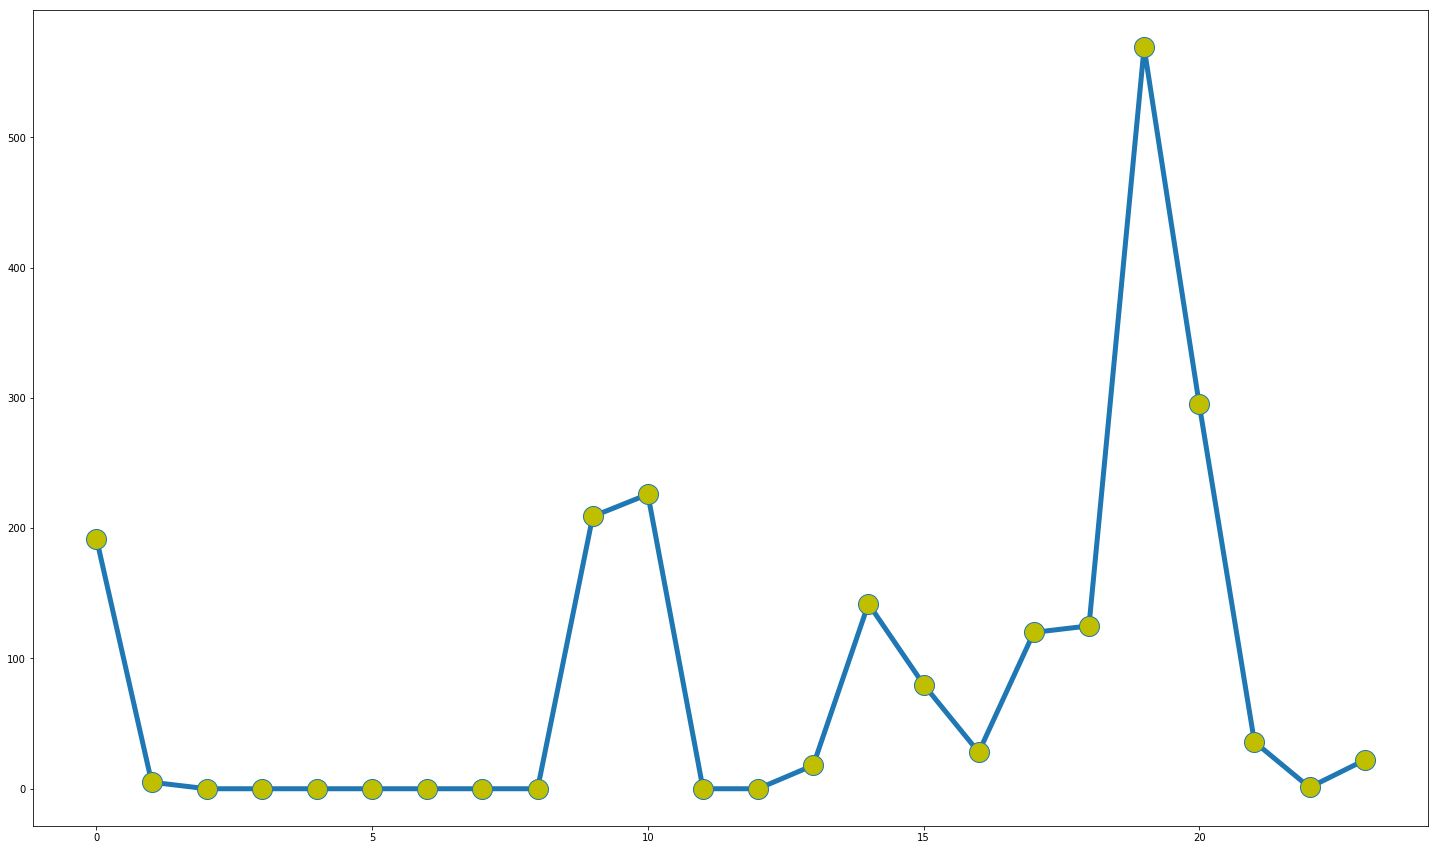

In [98]:
fig,axes = plt.subplots(figsize=(25,15))
axes.plot(hour_density_24,marker='o',markersize=20,lw=5,markerfacecolor='y')

### <font color=blue> 5. Use concept drift methods on step 4 and find out if there is any drift in the data that can be detected. Try to play with the input parameters and justify the one you chose. Explain why the drift was detected, what characteristics changed? (​25 points​) 

In [99]:
#https://scikit-multiflow.github.io/scikit-multiflow/skmultiflow.drift_detection.html
from skmultiflow.drift_detection import PageHinkley
ph = PageHinkley(min_instances=6, delta=0.0005, threshold=5, alpha=0.9999)
j=0
for i in hour_density_24:
    ph.add_element(i)
    if ph.detected_change():
        print('Change has been detected in data: ' + str(i) + ' - of index: ' + str(j))

        j=j+1   

Change has been detected in data: 209 - of index: 9
Change has been detected in data: 142 - of index: 14
Change has been detected in data: 569 - of index: 19


###  <font color=#008000> Explanation:
 * <font color=#008000> The drift was detected at 9,14,19 o'clock.
1. The drift detected at 9 o'clock, because the port is opening at 9, so the density will increase.
2. The drift detected at 14 o'clock, it might because it's the beginning of the second half of a day, people take the vessel to the destination.
3. The drift detected at 19 o'clock, it might because it's the end of the work, school, people take the vessel to go home or somewhere else.


### <font color=blue> 6. Cluster the ports based on their message density using DBSCAN and categorize the ports based on traffic (message density).  (​25 points​) 

In [100]:
joinres.head(3)

Unnamed: 0                        event_time  position_accuracy       mmsi  \
0           0  2019-04-11 09:47:30.153000+00:00                0.0  316013808   
1           1  2019-04-11 09:47:27.273000+00:00                0.0  316013808   
2           2  2019-04-11 09:47:34.340000+00:00                0.0  316013808   

   sog         cog                                      geometry index_right  \
0  3.0  319.500000          POINT (-63.55608166666666 44.624835)         NaN   
1  3.0  320.700012  POINT (-63.55605333333333 44.62481666666667)         NaN   
2  2.9  319.500000  POINT (-63.55613833333334 44.62486833333333)         NaN   

   field_1  size  
0      NaN   NaN  
1      NaN   NaN  
2      NaN   NaN

In [101]:
m_desity=joinres.groupby('index_right').count()['event_time']

In [103]:
m_desity.index

Index(['Fairview cove', 'armament', 'auto_port', 'ind', 'oulier_maybecday',
       'p010', 'po001', 'pointpolygon', 'port1', 'port2', 'port7',
       'south_enterance', 'southend container terminal', 'waterfront h'],
      dtype='object', name='index_right')

In [106]:
message_density = pd.DataFrame(np.zeros(len(port_name)),columns=['density'],index=port_name)

In [107]:
message_density

density
pointpolygon                     0.0
port1                            0.0
port2                            0.0
ind                              0.0
port5                            0.0
port6                            0.0
port7                            0.0
south_enterance                  0.0
auto_port                        0.0
southend container terminal      0.0
NN Jetty                         0.0
Bills island                     0.0
mid bedford                      0.0
Fairview cove                    0.0
armament                         0.0
waterfront h                     0.0
northarm                         0.0
plll                             0.0
pp                               0.0
po001                            0.0
po002                            0.0
oulier_maybecday                 0.0
p003                             0.0
enter2                           0.0
p009                             0.0
p010                             0.0

In [108]:
for port in port_name:
    if port in m_desity.index:
        message_density['density'][port] = m_desity[port]

In [109]:
message_density

density
pointpolygon                    153.0
port1                            13.0
port2                           119.0
ind                               5.0
port5                             0.0
port6                             0.0
port7                        703250.0
south_enterance                  39.0
auto_port                      2068.0
southend container terminal    7544.0
NN Jetty                          0.0
Bills island                      0.0
mid bedford                       0.0
Fairview cove                  1481.0
armament                         14.0
waterfront h                    229.0
northarm                          0.0
plll                              0.0
pp                                0.0
po001                          1445.0
po002                             0.0
oulier_maybecday                255.0
p003                              0.0
enter2                            0.0
p009                              0.0
p010                              6.0

In [110]:
message_density['density']=message_density['density'].apply(int)

In [111]:
X = []
for i in message_density['density']:
    a = np.array([i])
    X.append(a)

In [112]:
X

[array([153]),
 array([13]),
 array([119]),
 array([5]),
 array([0]),
 array([0]),
 array([703250]),
 array([39]),
 array([2068]),
 array([7544]),
 array([0]),
 array([0]),
 array([0]),
 array([1481]),
 array([14]),
 array([229]),
 array([0]),
 array([0]),
 array([0]),
 array([1445]),
 array([0]),
 array([255]),
 array([0]),
 array([0]),
 array([0]),
 array([6])]

In [114]:
# applying DBSCAN in the message density data
# refer to https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

In [115]:
clustering.labels_

array([-1,  0, -1,  1,  2,  2, -1, -1, -1, -1,  2,  2,  2, -1,  0, -1,  2,
        2,  2, -1,  2, -1,  2,  2,  2,  1], dtype=int64)

In [116]:
message_density['class']=clustering.labels_

In [117]:
message_density.sort_values('class')

density  class
pointpolygon                     153     -1
port2                            119     -1
oulier_maybecday                 255     -1
po001                           1445     -1
waterfront h                     229     -1
port7                         703250     -1
south_enterance                   39     -1
auto_port                       2068     -1
southend container terminal     7544     -1
Fairview cove                   1481     -1
port1                             13      0
armament                          14      0
p010                               6      1
ind                                5      1
Bills island                       0      2
NN Jetty                           0      2
port6                              0      2
northarm                           0      2
plll                               0      2
pp                                 0      2
port5                              0      2
po002                              0      2
p003                               0      2
enter2                             0      2
p009                               0      2
mid bedford                        0      2

In [132]:
for index, row in message_density.iterrows():
    if row['class']==-1:
        message_density.loc[index]['class'] = 'High'
    if row['class']==0:
        message_density.loc[index]['class'] = 'Medium'
    if row['class']==1:
        message_density.loc[index]['class'] = 'Low'
    if row['class']==2:
        message_density.loc[index]['class'] = 'None'
    

In [124]:
message_density

density  class
pointpolygon                     153     -1
port1                             13      0
port2                            119     -1
ind                                5      1
port5                              0      2
port6                              0      2
port7                         703250     -1
south_enterance                   39     -1
auto_port                       2068     -1
southend container terminal     7544     -1
NN Jetty                           0      2
Bills island                       0      2
mid bedford                        0      2
Fairview cove                   1481     -1
armament                          14      0
waterfront h                     229     -1
northarm                           0      2
plll                               0      2
pp                                 0      2
po001                           1445     -1
po002                              0      2
oulier_maybecday                 255     -1
p003                               0      2
enter2                             0      2
p009                               0      2
p010                               6      1

In [126]:
def replace_class(className):
    if className == -1:
        return 'High'
    if className == 0:
        return 'Medium'
    if className == 1:
        return 'Low'
    if className == 2:
        return 'None'


In [128]:
message_density['class']=message_density['class'].apply(replace_class)

In [131]:
message_density.sort_values('class')

density   class
pointpolygon                     153    High
oulier_maybecday                 255    High
port2                            119    High
po001                           1445    High
waterfront h                     229    High
Fairview cove                   1481    High
port7                         703250    High
south_enterance                   39    High
auto_port                       2068    High
southend container terminal     7544    High
p010                               6     Low
ind                                5     Low
armament                          14  Medium
port1                             13  Medium
Bills island                       0    None
p009                               0    None
port6                              0    None
port5                              0    None
northarm                           0    None
plll                               0    None
pp                                 0    None
po002                              0    None
p003                               0    None
enter2                             0    None
NN Jetty                           0    None
mid bedford                        0    None

 * <font color=#008000>After clustering, we categorized the ports into 4 classes, they represent different levels of travelling density.
1. High travelling density: pointpolygon, oulier_maybecday, port2, po001, waterfront h, Fairview cove, port7, south_enterance, auto_port, southend container terminal	
2. Medium travelling density: armament, port1
3. Low travelling density: p010, ind
4. None travelling density: Bills island, p009, port6,	port5, northarm, plll, pp, po002, p003, enter2, NN Jetty, mid bedford

### References 
1. Medium. (2019). GeoPandas 101: Plot any data with a latitude and longitude on a map. [online] Available at: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972 [Accessed 5 Aug. 2019].
2. GeoPandas?, C. (2019). Changing colours in GeoPandas?. [online] Geographic Information Systems Stack Exchange. Available at: https://gis.stackexchange.com/questions/152920/changing-colours-in-geopandas [Accessed 5 Aug. 2019].
3. Darribas.org. (2019). lab_03. [online] Available at: http://darribas.org/gds15/content/labs/lab_03.html [Accessed 5 Aug. 2019].
4. Referred the lab tutorials of the Data Science course
5. Scikit-multiflow.github.io. (2019). skmultiflow.drift_detection package — scikit-multiflow 0.1.4 documentation. [online] Available at: https://scikit-multiflow.github.io/scikit-multiflow/skmultiflow.drift_detection.html [Accessed 5 Aug. 2019].

